In [12]:
import os
import sys
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import pickle
import torch
from torch import nn
import pytorch_lightning as pl
from pytorch_lightning import loggers as pl_loggers
from pytorch_lightning.callbacks import ModelCheckpoint

current_dir = os.path.join(Path().resolve())
# モジュールのあるパスを追加
sys.path.append(str(current_dir) + '/../train')

import model._models as models
import datamodule._datamodules as datamodules
import dataset._datasets as datasets
import route._routes as routes
import mylib.utils as ut
import mylib.config as conf

In [13]:
# ROOT_PATH = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
# # DF_PATH = os.path.join(ROOT_PATH, "data", "df_test.pickle")
# # DF_PATH = os.path.join(ROOT_PATH, "data", "df_5s_avg.pickle")
# OUTPUT_DIR = os.path.join(ROOT_PATH, "out")
# CONFIG_DIR = os.path.join(ROOT_PATH, "config")

ROOT_PATH = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
DF_DIR = os.path.join(ROOT_PATH, "data")
OUTPUT_DIR = os.path.join(ROOT_PATH, "out")
CONFIG_DIR = os.path.join(ROOT_PATH, "config")

In [14]:
log_dir = Path(r"C:\Users\hal\Documents\lab\abci\out\lightning_logs\2024-12-19-11-10-dec_shift4_2ax_route_test")
log_dir = Path(r"C:\Users\hal\Documents\lab\abci\out\lightning_logs\2024-12-20-21-21-dec_2ax_zeros")

# cp_path = os.path.join(log_dir, "cp/last.ckpt")
cp_path = os.path.join(log_dir, "cp/best_loss_fold.ckpt")
config_path = os.path.join(log_dir, "config.yaml")

In [15]:
def plot_route(y, y_hat):
    plt.figure(figsize=(4, 10))
    plt.plot(y[:, 0], y[:, 1], marker="o")
    plt.plot(y_hat[:, 0], y_hat[:, 1], marker="x")
    plt.xlim(0, 3.5)
    plt.ylim(0, 11)
    plt.show()

In [16]:
def plot_route2(x, y, y_hat):
    # 2つのルートをプロット
    fig, ax = plt.subplots(1, 2)
    ax[0].plot(x[0, :, 3], x[0, :, 4], marker="o")
    ax[1].plot(y[0, :, 0], y[0, :, 1], marker="o", label="true")
    ax[1].plot(y_hat[0, :, 0], y_hat[0, :, 1], marker="x", label="pred")
    ax[1].set_xlim(0, 3.5)
    ax[1].set_ylim(0, 11)
    ax[1].legend()
    plt.show()

In [17]:
def get_random_noise(mean, std, shape):
    # ランダムノイズを生成
    random_noise = torch.normal(mean=mean, std=std, size=shape)
    # random_noise = torch.empty(x.shape[0], x.shape[1]).uniform_(-0.5, 0.5)
    return random_noise

In [18]:

ut.fix_seeds(0)

# 設定ファイルの読み込み
config = conf.from_yaml(config_path)

# データフレームの読み込み
df_path = os.path.join(DF_DIR, "df_5s_avg.pickle")
df = pickle.load(open(df_path, "rb"))

# 各種初期化
model = models.get_model_with_checkpoint(config["model"], cp_path)
route_gen = routes.get_route_generator(config["route"])
dataset = datasets.get_dataset(config["dataset"])
dm = datamodules.get_dm(config["dm"])

dataset.set_route(df, route_gen)
dm.setDataset(dataset)

df


x    y         MF       MF_X       MF_Y       MF_Z
0      0    0  47.092824  15.922708 -24.282148 -37.075312
1      1    0  47.006834  15.718135 -25.290383 -36.323777
2      2    0  46.904898  15.512466 -26.195008 -35.626671
3      3    0  46.771071  15.304602 -26.892416 -35.038420
4      4    0  46.589408  15.093445 -27.278996 -34.613452
...   ..  ...        ...        ...        ...        ...
3126  26  100  38.792002   3.686721 -19.262970 -33.319910
3127  27  100  38.170764   2.066179 -19.227704 -32.627471
3128  28  100  37.575150   0.115492 -19.140441 -31.999105
3129  29  100  36.996618  -2.055291 -19.018515 -31.413456
3130  30  100  36.426627  -4.336124 -18.879256 -30.849164

[3131 rows x 6 columns]

Number of test batches: 32
Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 0, Loss: 0.00473796296864748


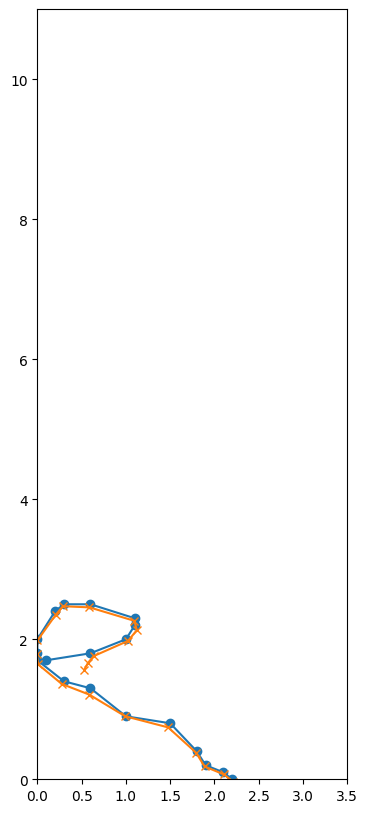

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 1, Loss: 0.004618571139872074


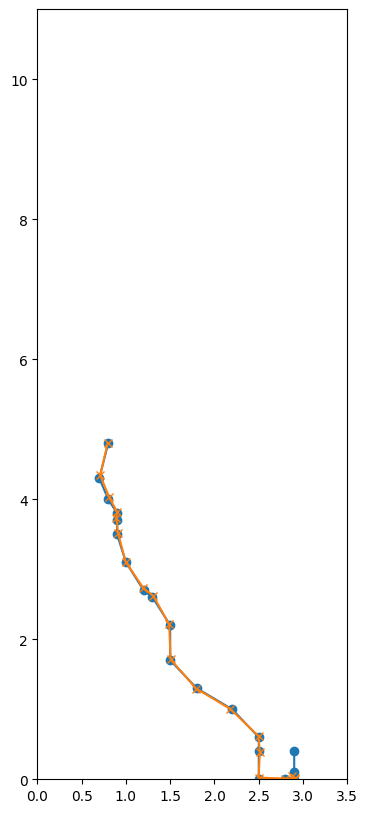

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 2, Loss: 0.005996291991323233


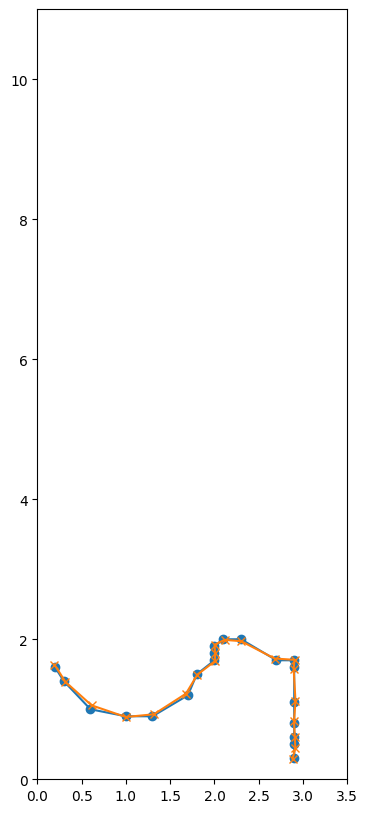

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 3, Loss: 0.005478095728904009


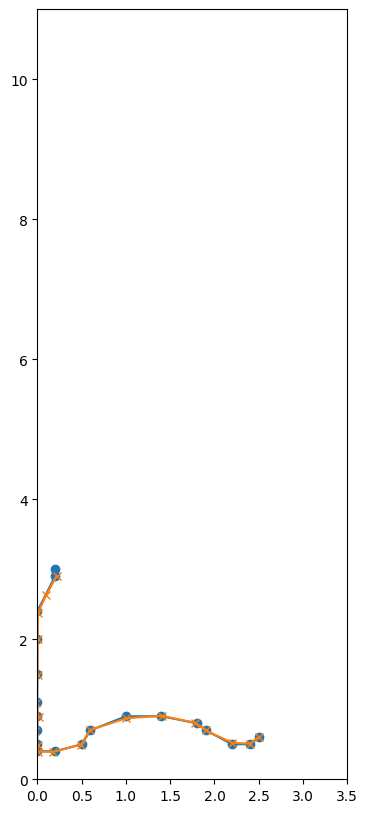

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 4, Loss: 0.004750027786940336


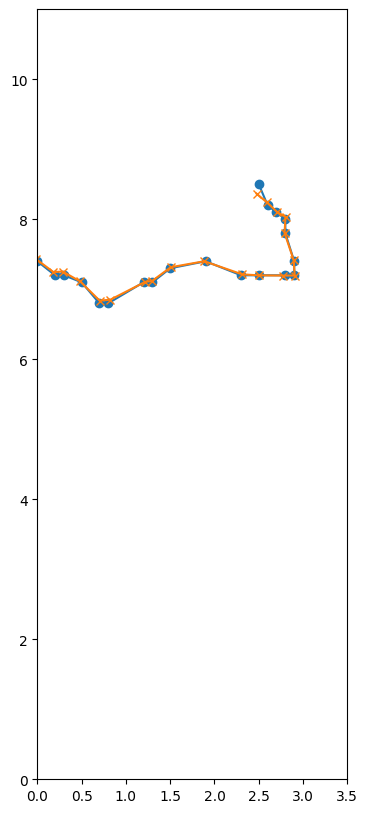

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 5, Loss: 0.005727217998355627


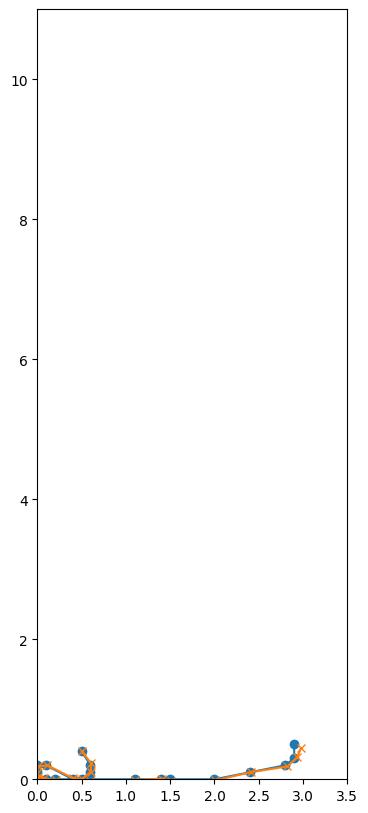

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 6, Loss: 0.0047533633187413216


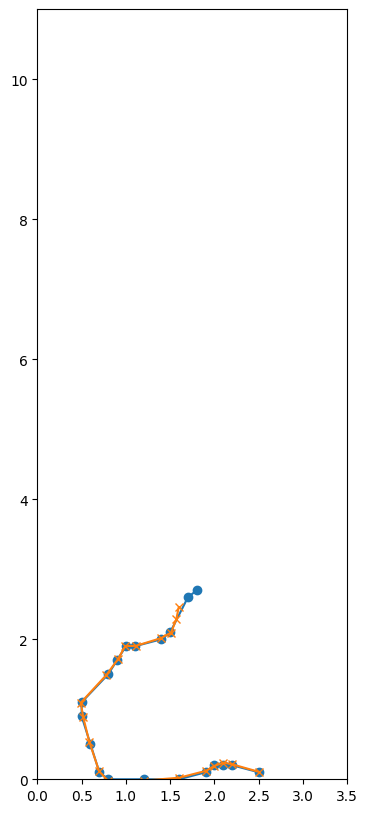

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 7, Loss: 0.004666684661060572


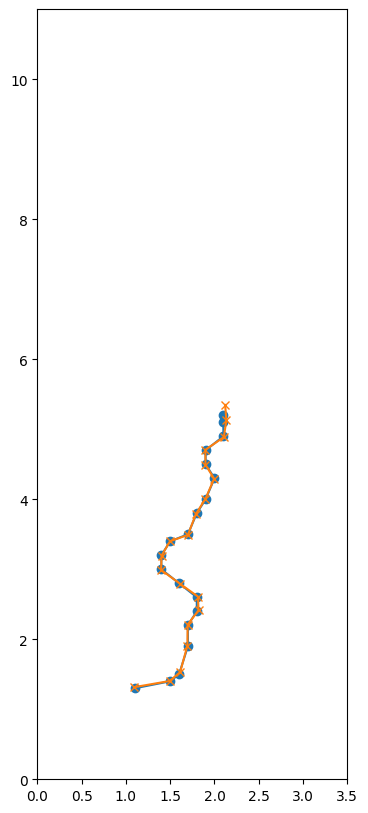

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 8, Loss: 0.005343785509467125


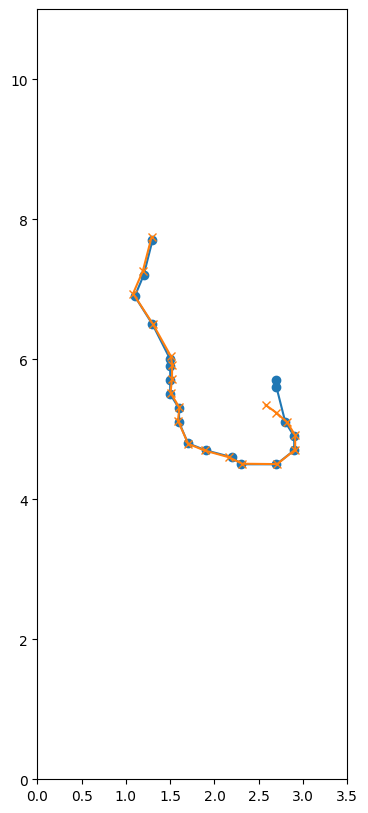

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 9, Loss: 0.006217165384441614


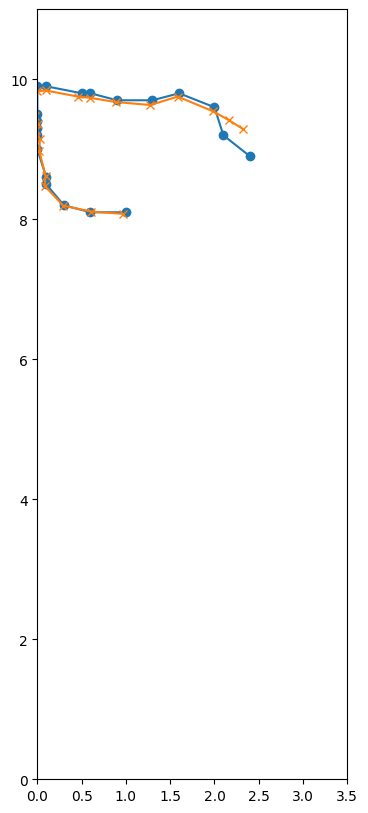

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 10, Loss: 0.005625011865049601


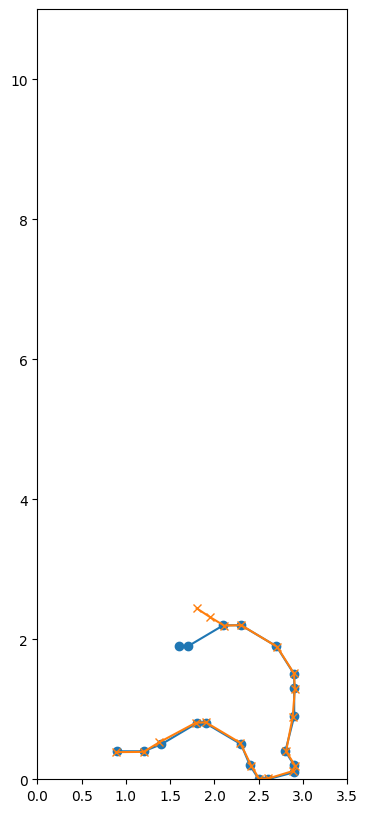

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 11, Loss: 0.005303476937115192


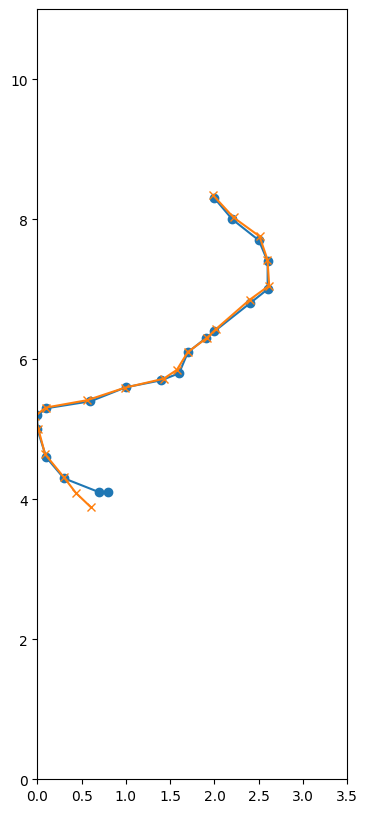

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 12, Loss: 0.004892878234386444


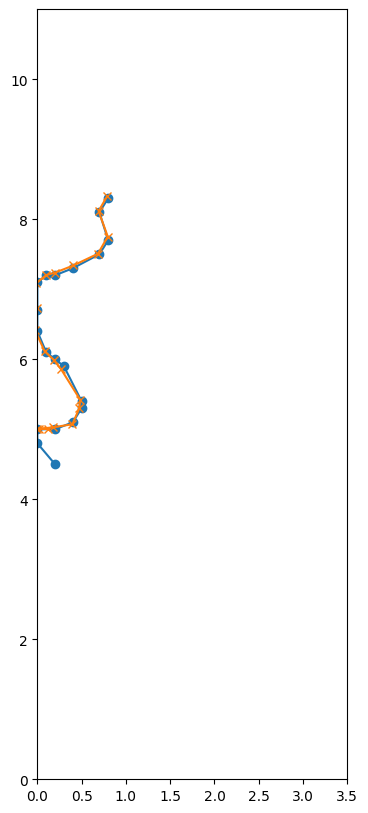

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 13, Loss: 0.00519608473405242


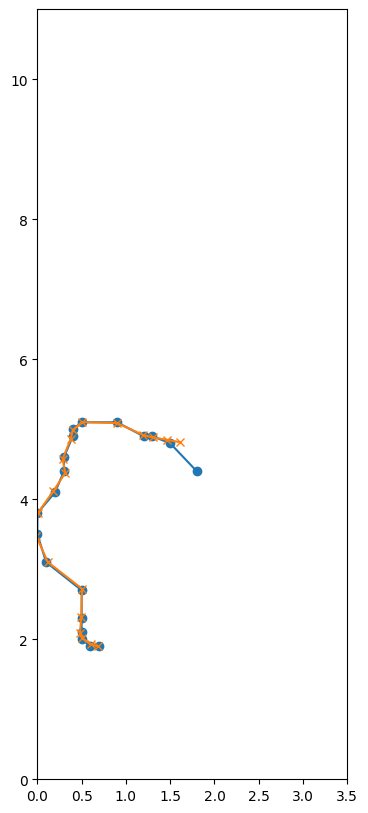

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 14, Loss: 0.005184316076338291


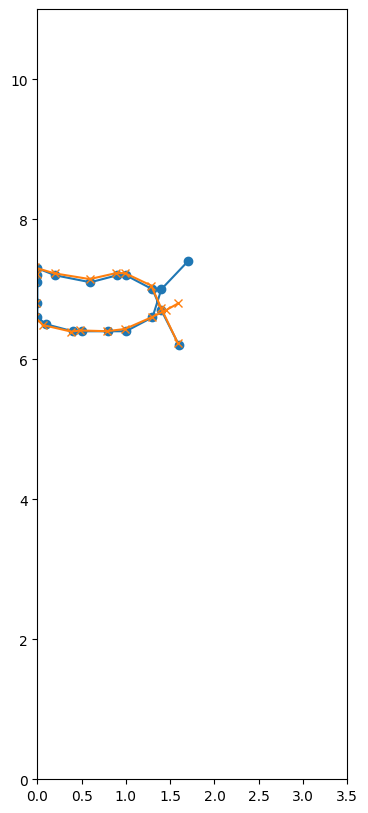

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 15, Loss: 0.005786954890936613


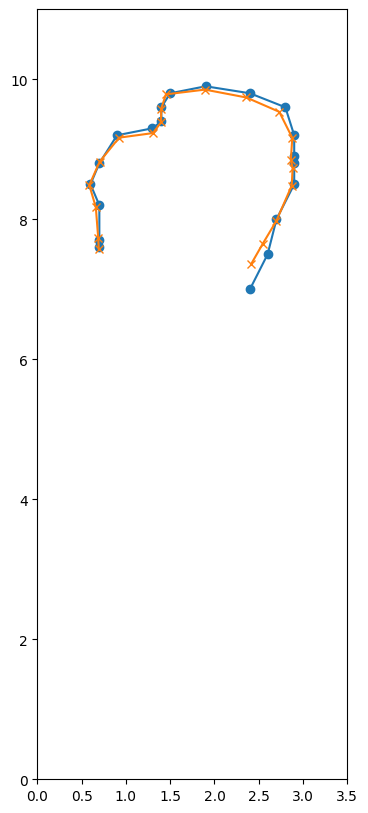

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 16, Loss: 0.004397748038172722


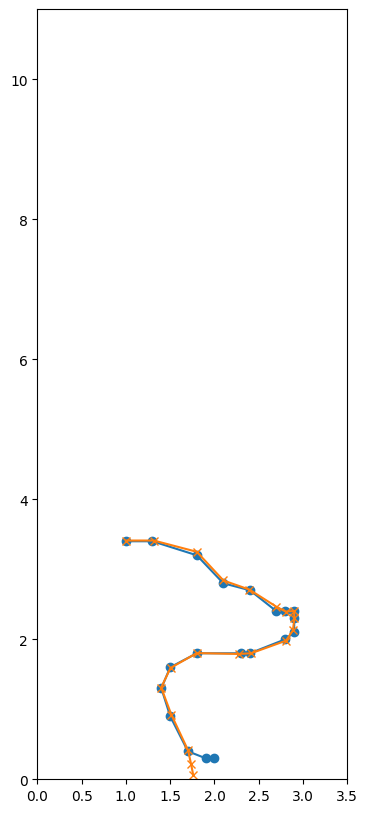

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 17, Loss: 0.004308213014155626


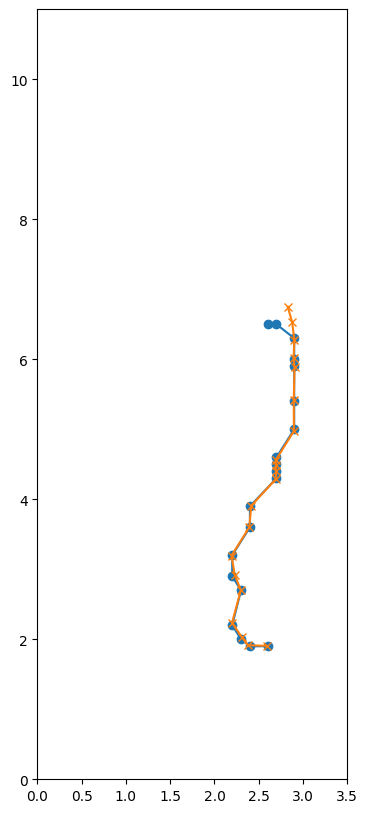

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 18, Loss: 0.005848405417054892


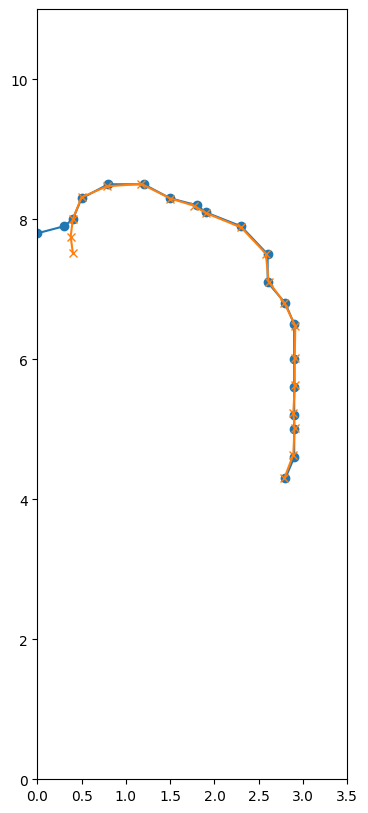

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 19, Loss: 0.004981964360922575


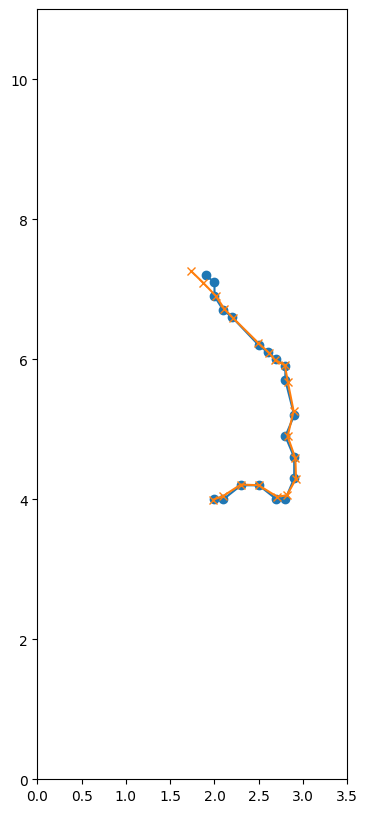

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 20, Loss: 0.005180352833122015


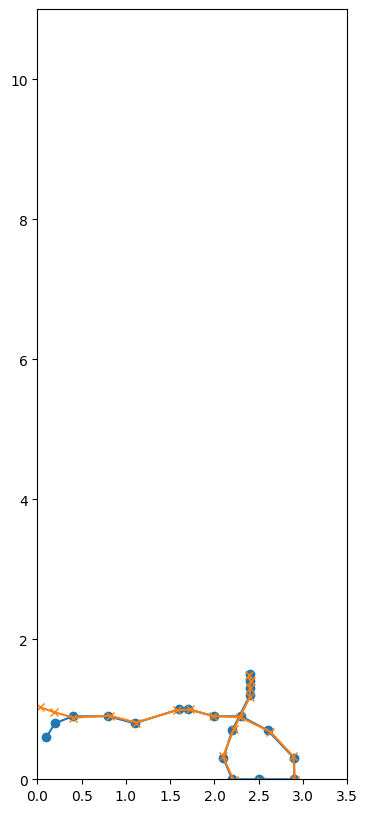

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 21, Loss: 0.0055445111356675625


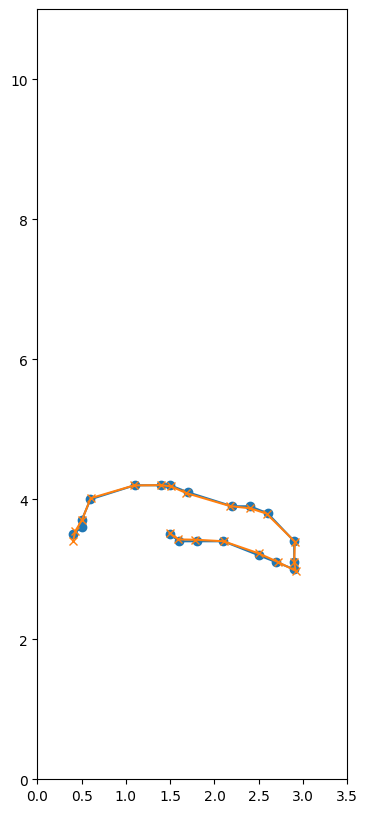

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 22, Loss: 0.0038854924496263266


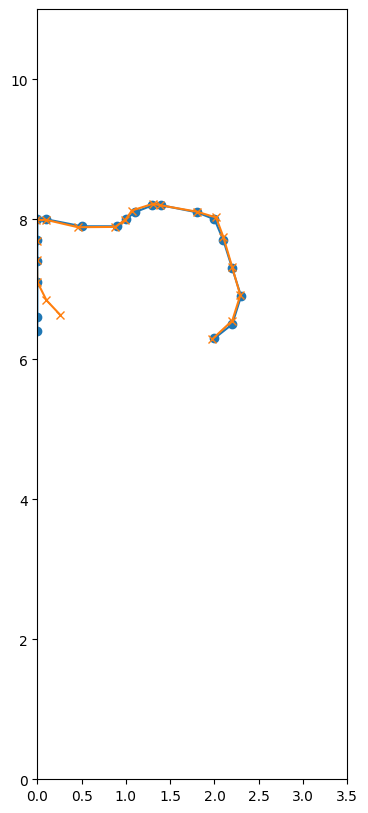

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 23, Loss: 0.00495473388582468


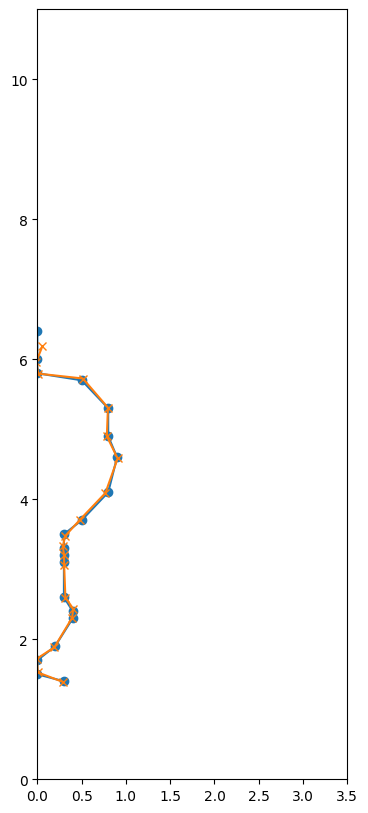

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 24, Loss: 0.005104598589241505


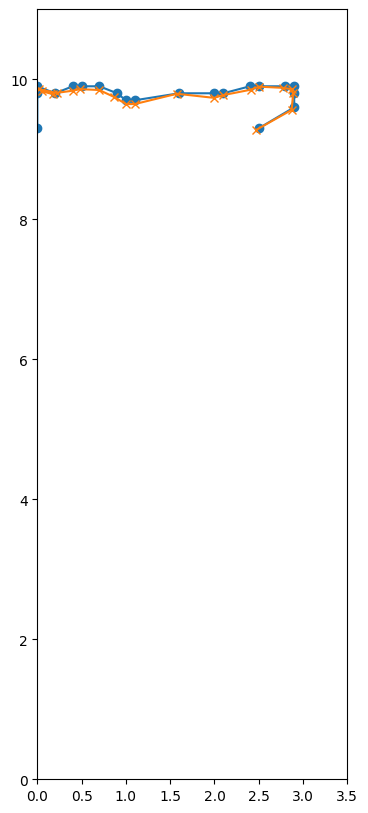

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 25, Loss: 0.00478601036593318


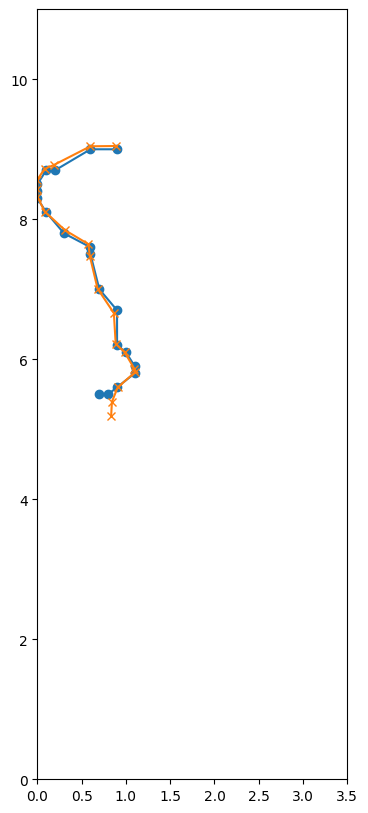

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 26, Loss: 0.006650254130363464


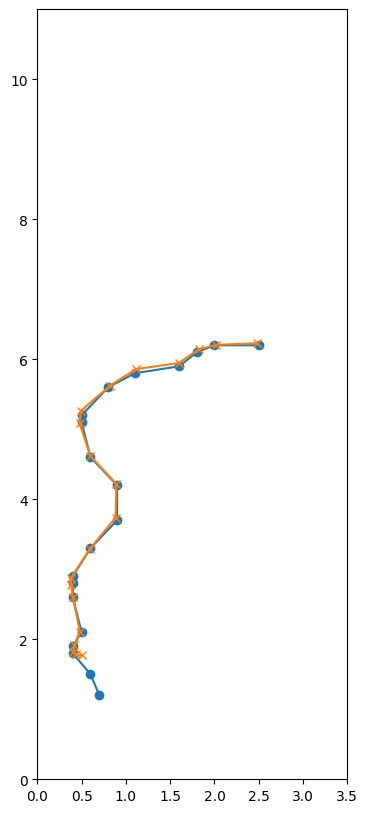

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 27, Loss: 0.00436329236254096


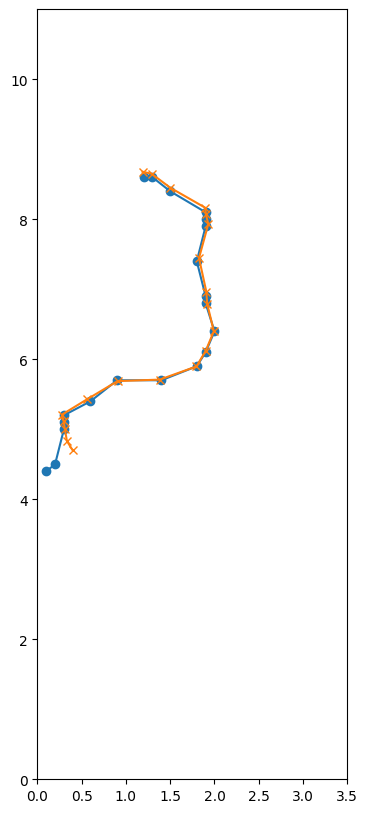

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 28, Loss: 0.005506678018718958


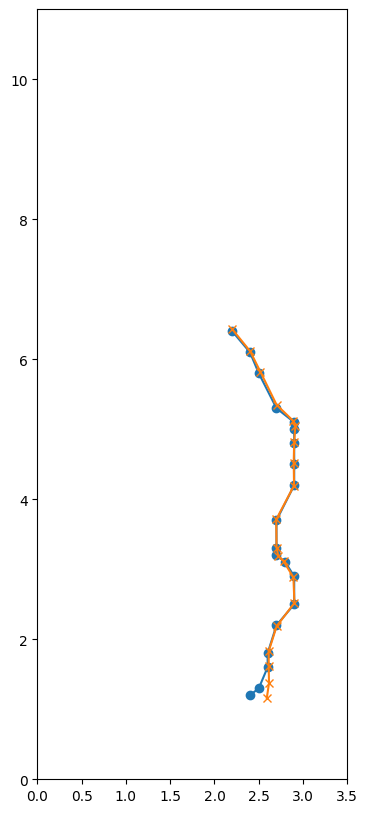

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 29, Loss: 0.004697115626186132


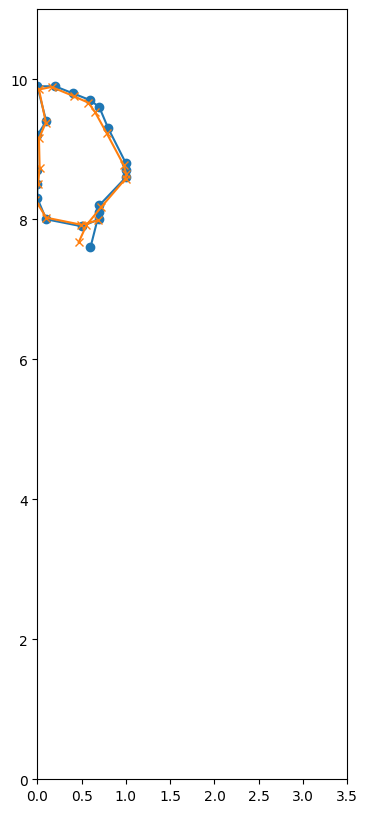

Input shape: torch.Size([64, 20, 4]), Target shape: torch.Size([64, 20, 2])
Batch 30, Loss: 0.004581565503031015


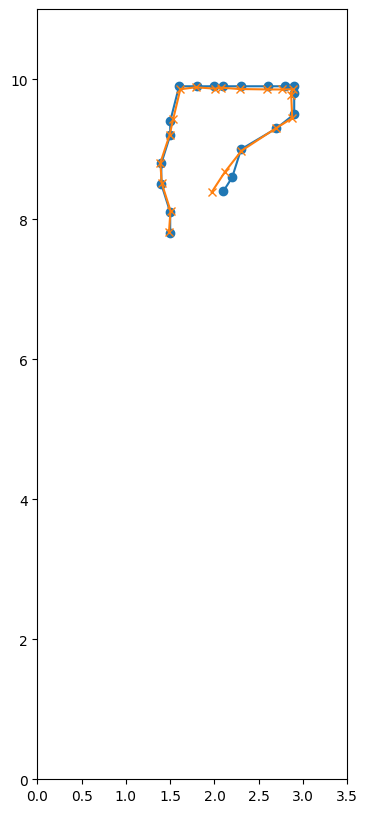

Input shape: torch.Size([16, 20, 4]), Target shape: torch.Size([16, 20, 2])
Batch 31, Loss: 0.005331952124834061


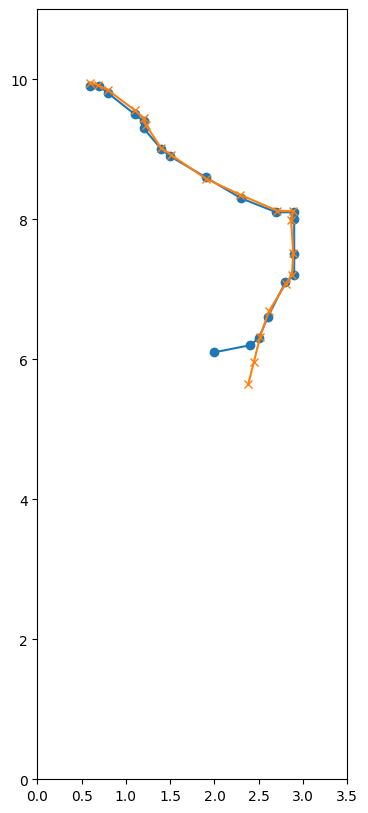

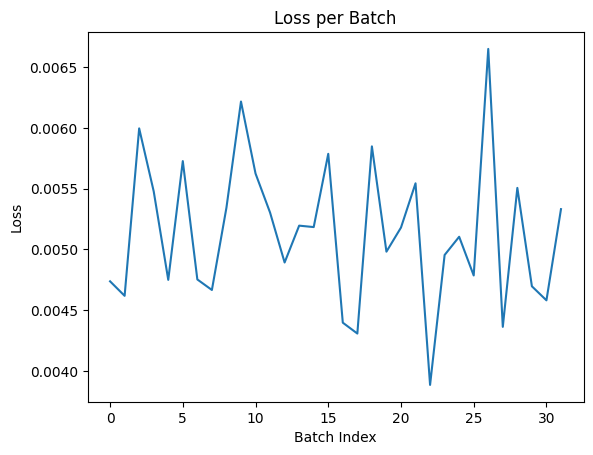

Average Loss: 0.005137524283782113


In [27]:
model.eval()

loss_list = []
print(f"Number of test batches: {len(dm.test_dataloader())}")

for i, batch in enumerate(dm.test_dataloader()):
    x, y = batch
    x, y = x.cuda(), y.cuda()  # GPUに転送
    print(f"Input shape: {x.shape}, Target shape: {y.shape}")

    # 入力と出力を整形
    x, y = x.view(-1, 80), y.view(-1, 40)

    # Teacher Forcing用のshifted_yを生成
    shifted_y = torch.zeros_like(y)
    shifted_y[:, 4:] = y[:, :-4]  # 4つ右にシフト

    # モデルの予測
    y_hat = model(x, shifted_y)

    # 損失の計算
    loss = nn.functional.mse_loss(y_hat, y)
    loss_list.append(loss.item())
    print(f"Batch {i}, Loss: {loss.item()}")

    # データを整形してプロット用に変換
    x = x.view(-1, 20, 4)  # 例: [20, 4] に整形
    y = y.view(-1, 20, 2)  # 例: [20, 2] に整形
    y_hat = y_hat.view(-1, 20, 2)  # 例: [20, 2] に整形

    # プロット（先頭サンプルを可視化）
    x = x.cpu().detach().numpy()
    y_hat = y_hat.cpu().detach().numpy()
    y = y.cpu().detach().numpy()
    plot_route(y[0], y_hat[0])

# ロスの可視化
plt.plot(loss_list)
plt.title("Loss per Batch")
plt.xlabel("Batch Index")
plt.ylabel("Loss")
plt.show()

# 平均損失の表示
avg = sum(loss_list) / len(loss_list)
print(f"Average Loss: {avg}")


32
torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
0 0.00473796296864748


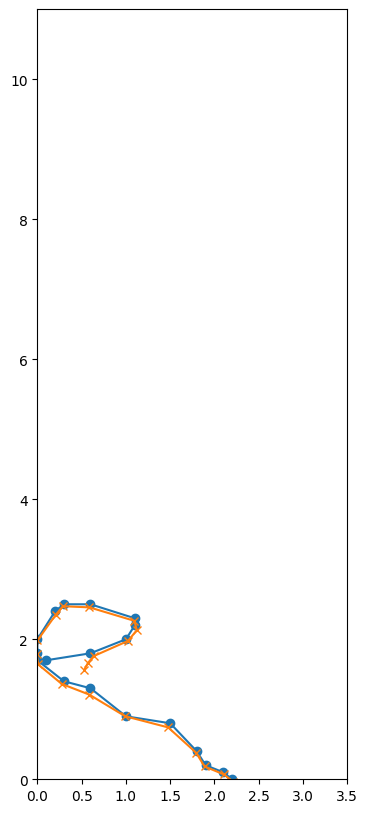

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
1 0.004618571139872074


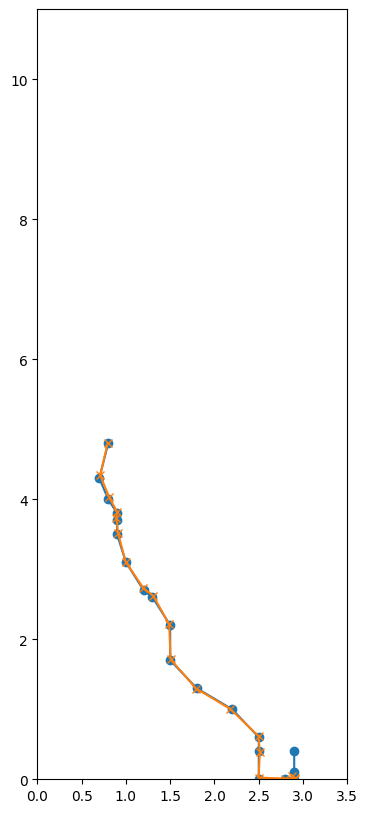

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
2 0.005996291991323233


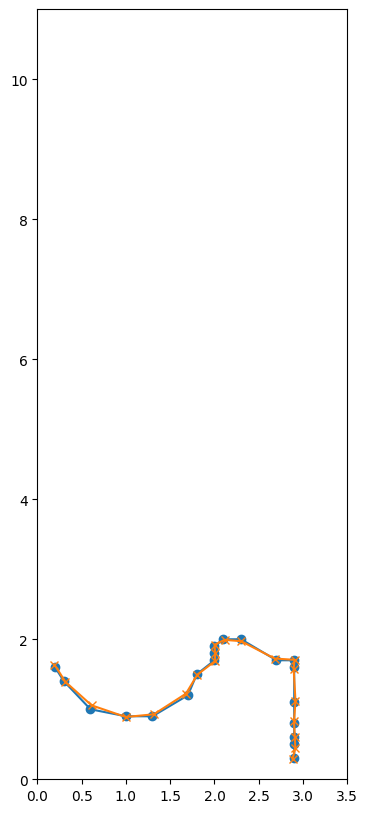

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
3 0.005478095728904009


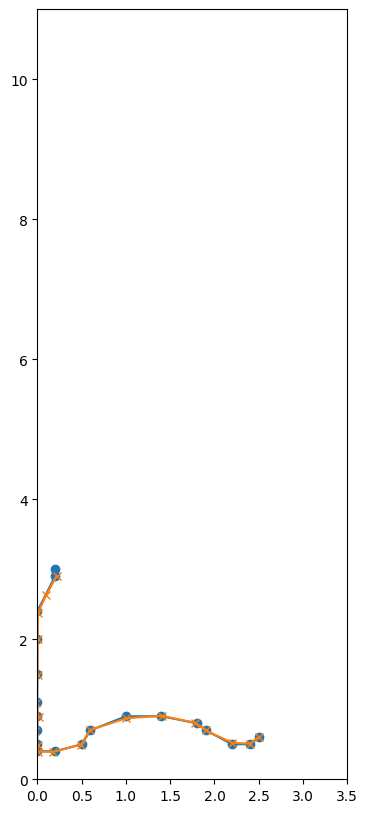

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
4 0.004750027786940336


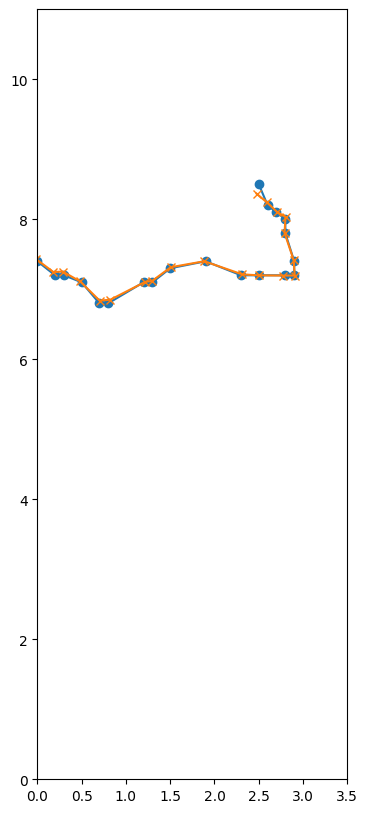

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
5 0.005727217998355627


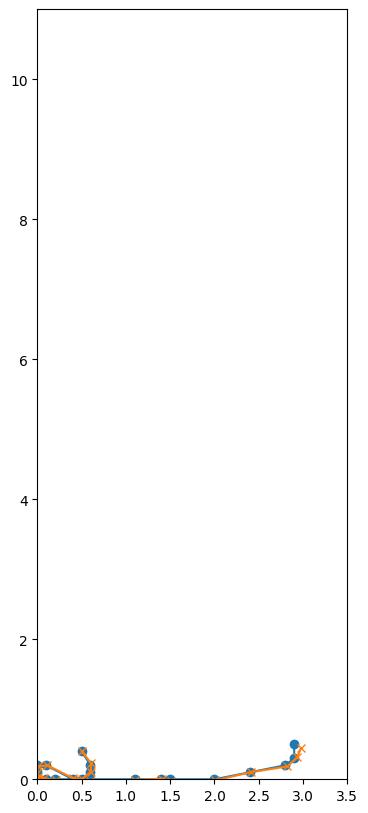

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
6 0.0047533633187413216


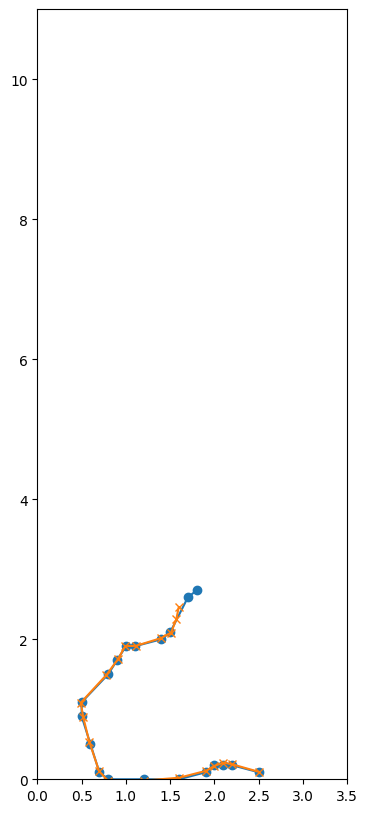

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
7 0.004666684661060572


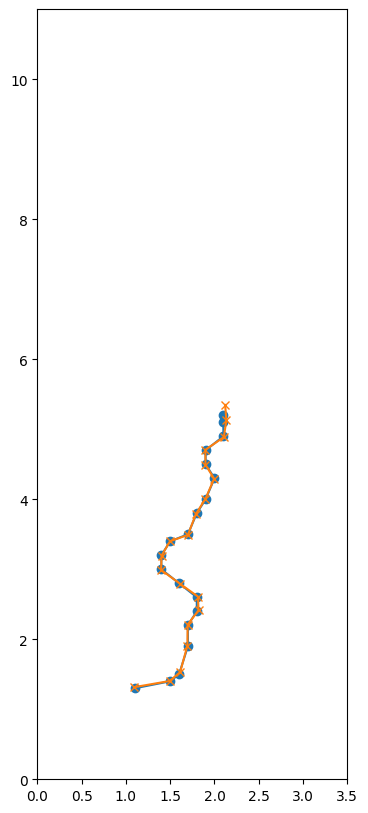

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
8 0.005343785509467125


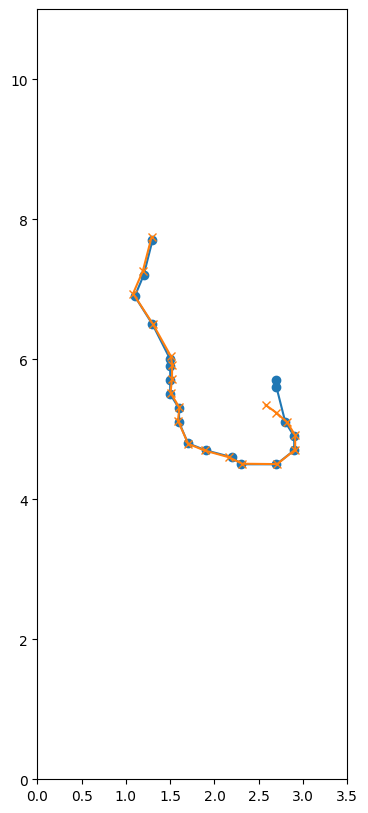

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
9 0.006217165384441614


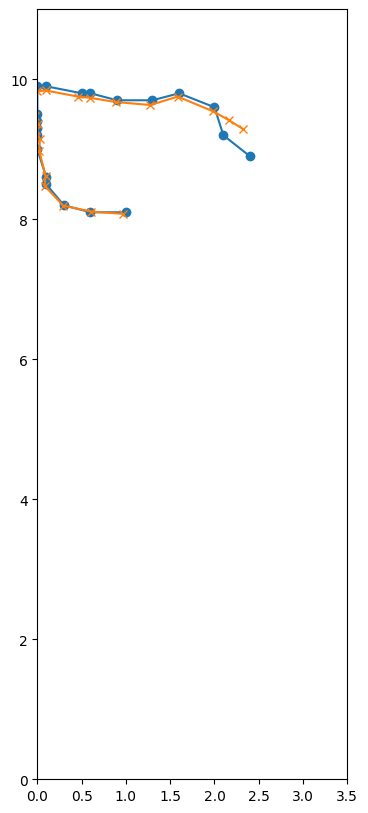

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
10 0.005625011865049601


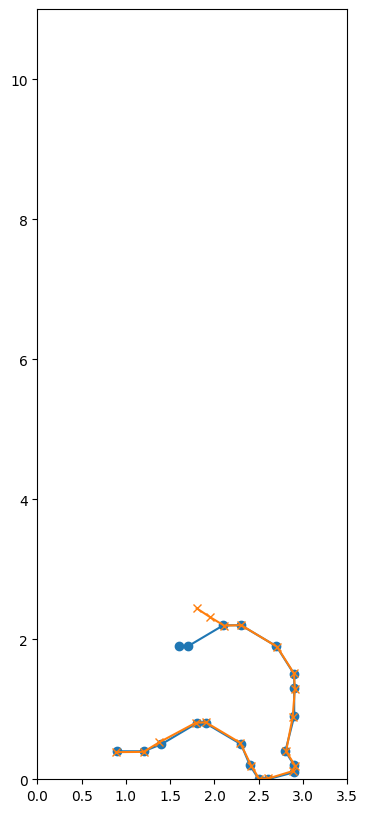

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
11 0.005303476937115192


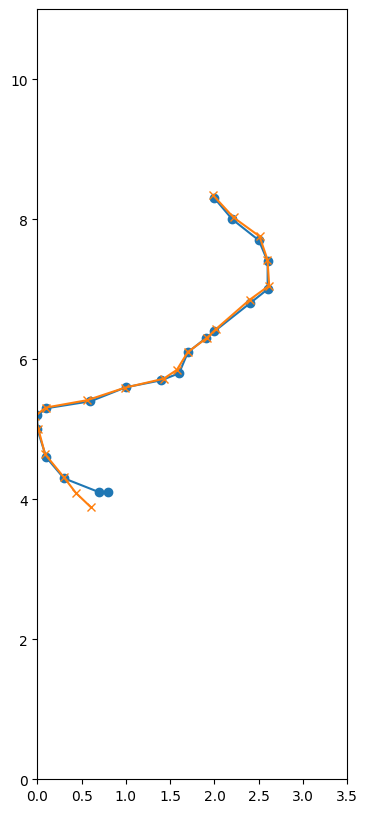

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
12 0.004892878234386444


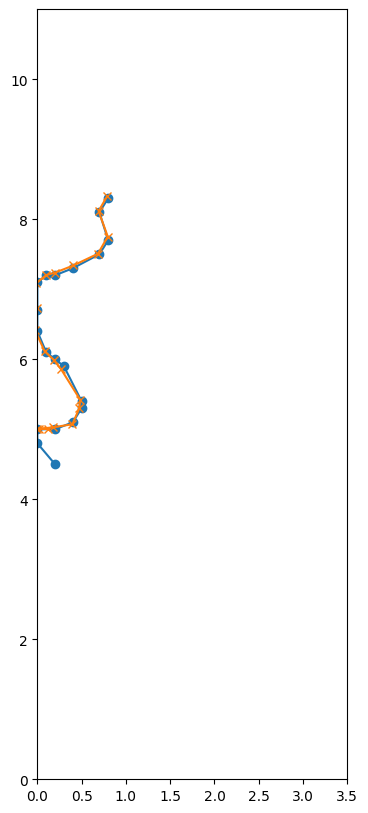

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
13 0.00519608473405242


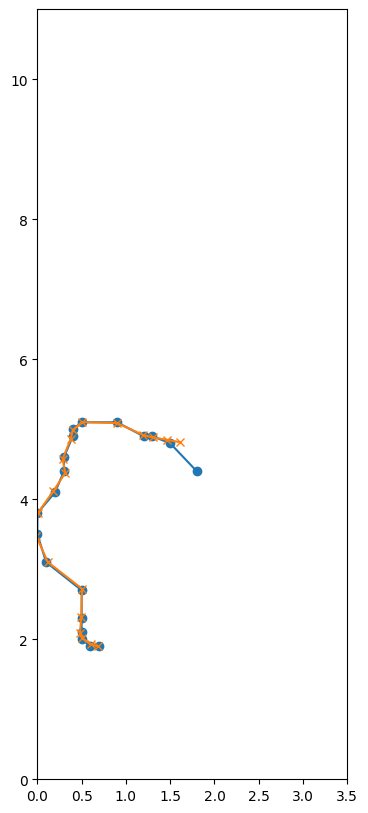

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
14 0.005184316076338291


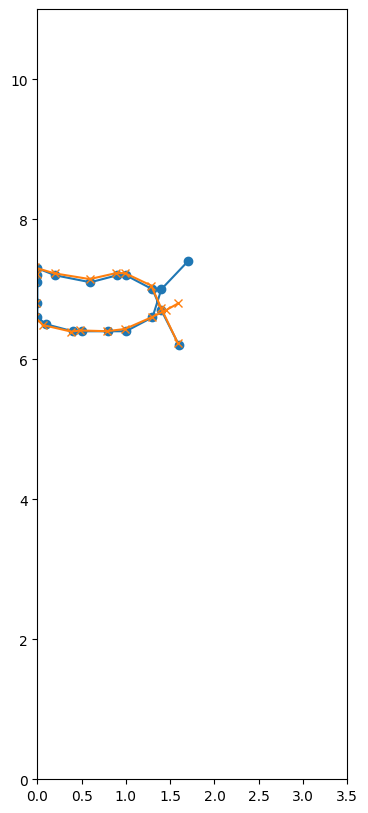

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
15 0.005786954890936613


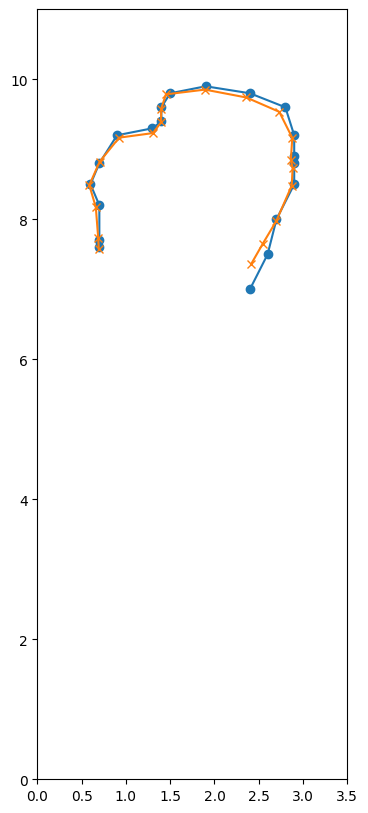

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
16 0.004397748038172722


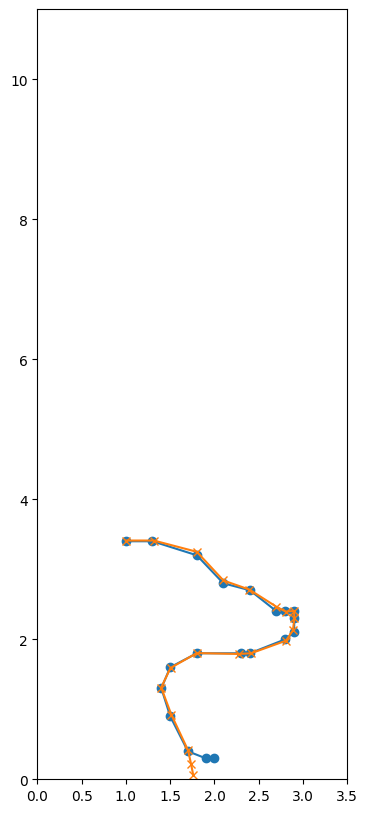

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
17 0.004308213014155626


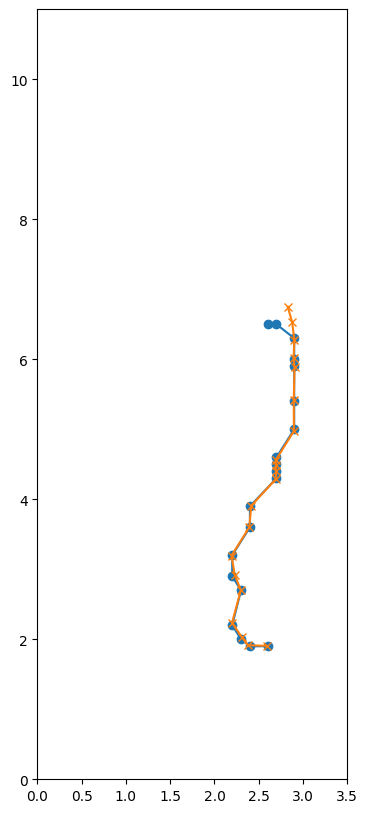

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
18 0.005848405417054892


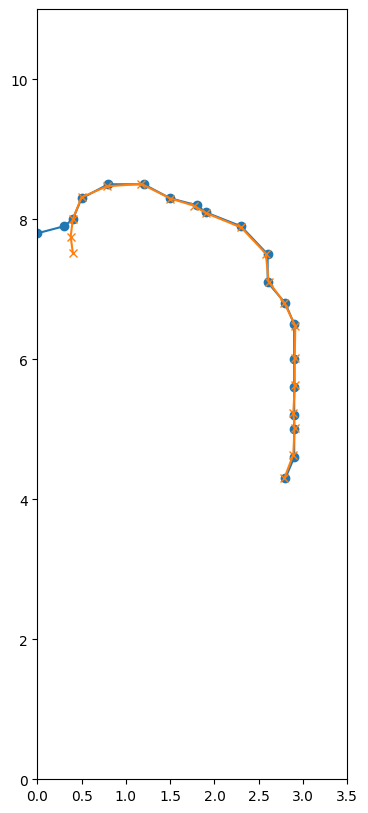

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
19 0.004981964360922575


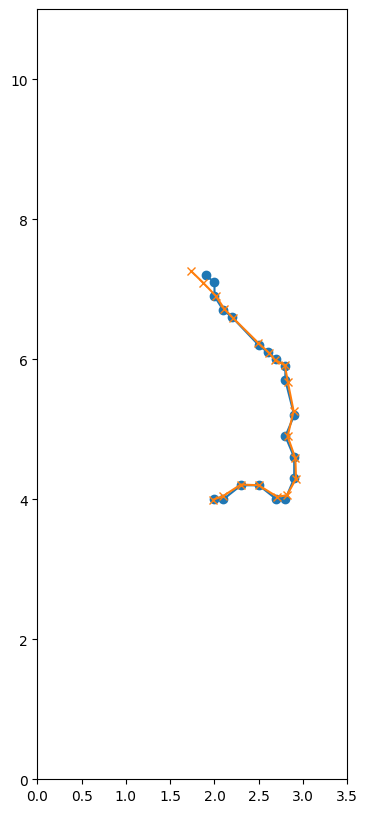

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
20 0.005180352833122015


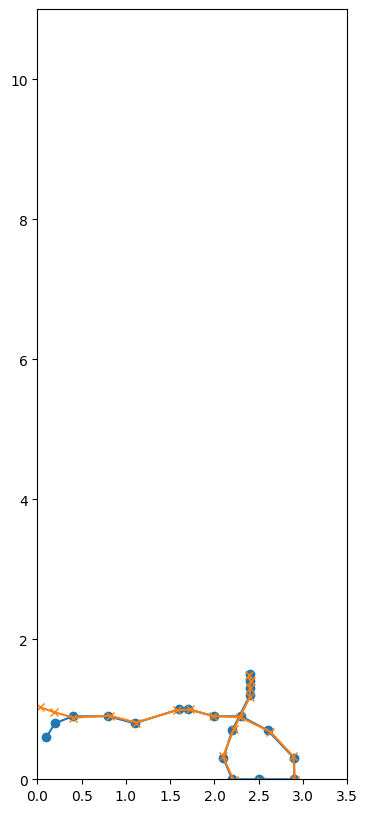

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
21 0.0055445111356675625


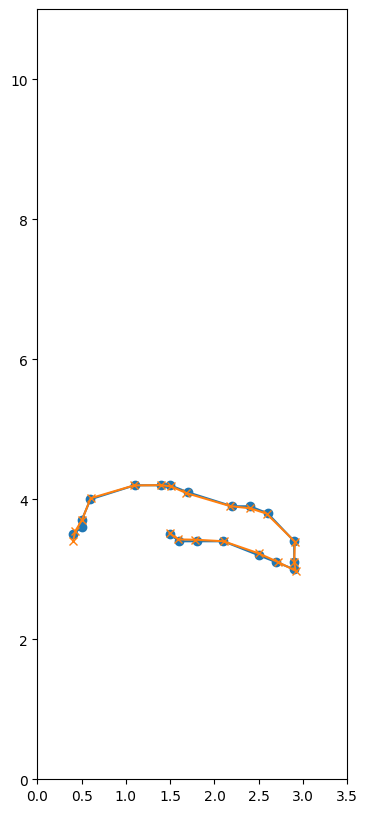

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
22 0.0038854924496263266


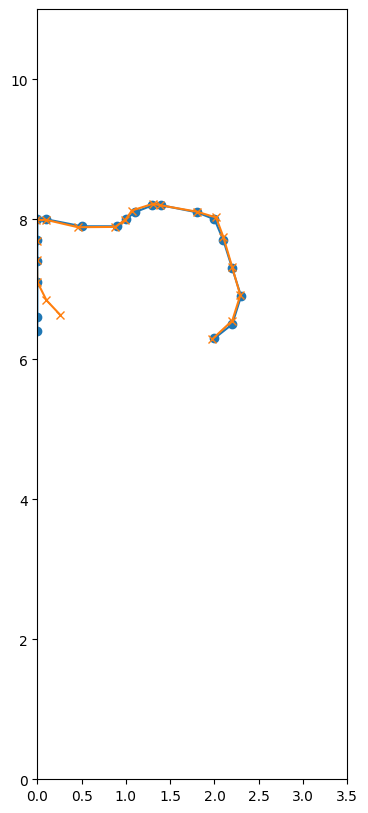

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
23 0.00495473388582468


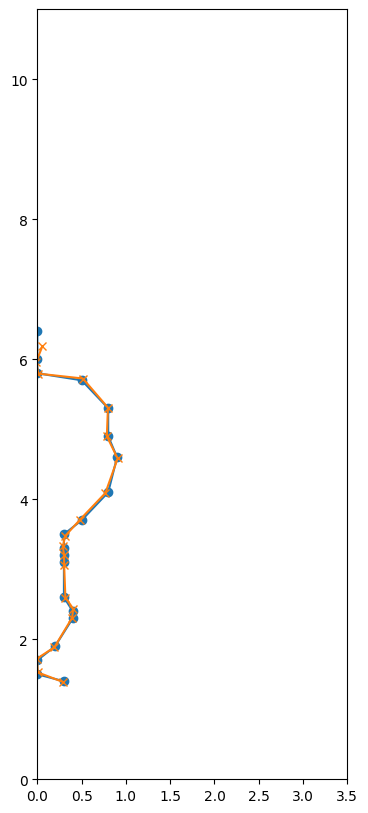

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
24 0.005104598589241505


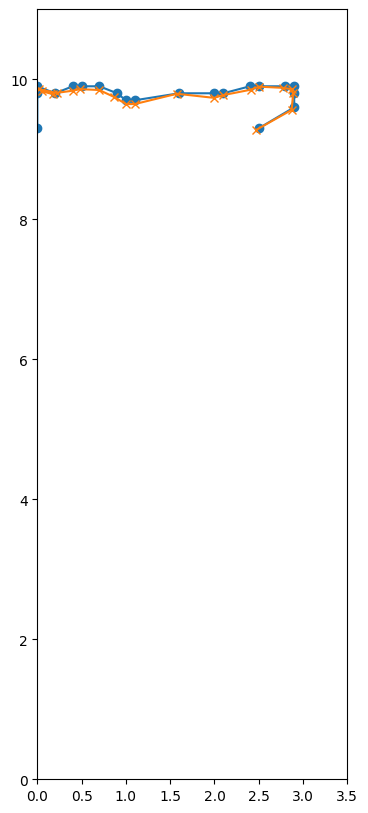

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
25 0.00478601036593318


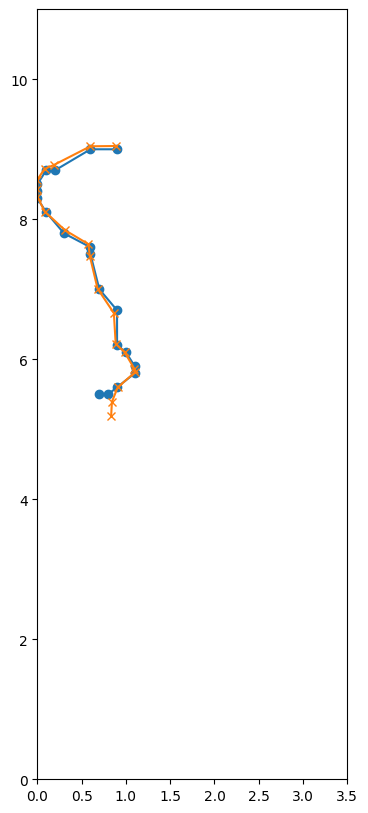

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
26 0.006650254130363464


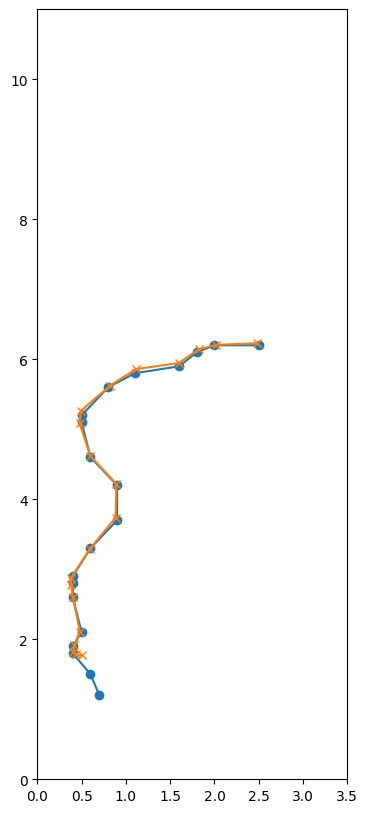

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
27 0.00436329236254096


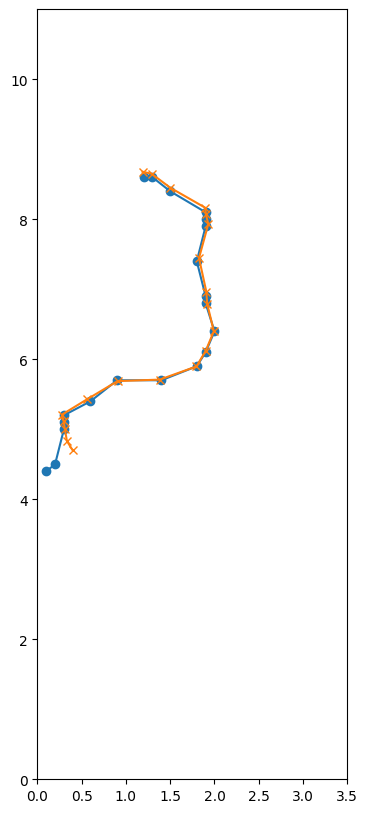

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
28 0.005506678018718958


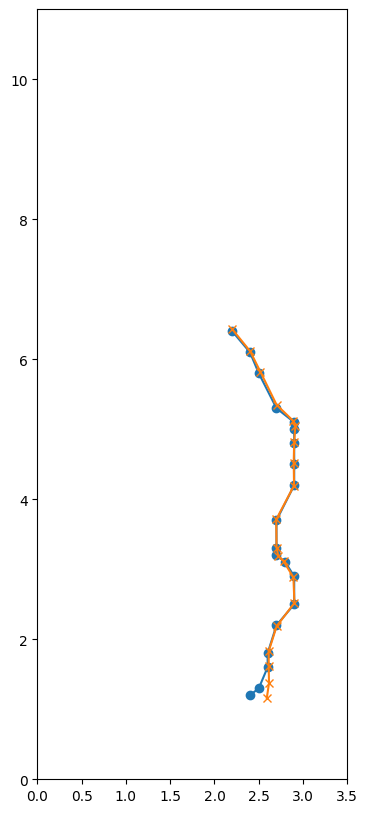

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
29 0.004697115626186132


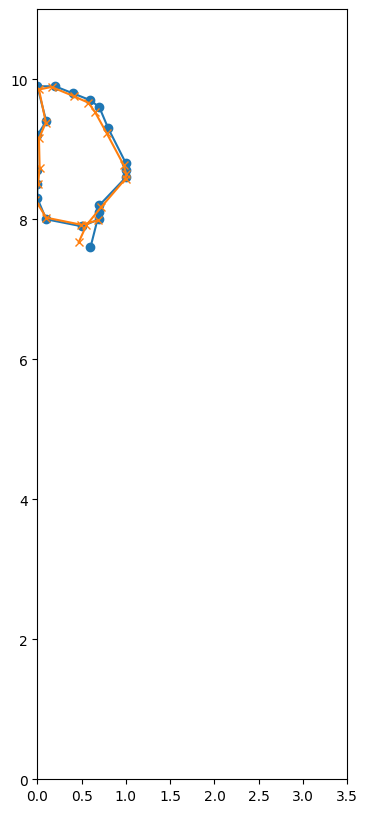

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
30 0.004581565503031015


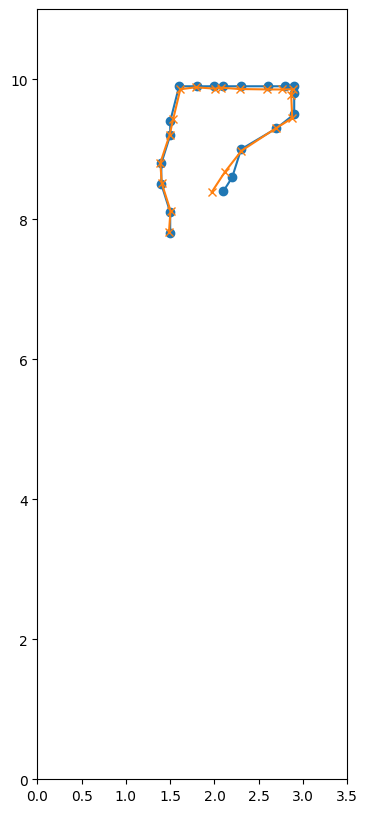

torch.Size([16, 20, 4]) torch.Size([16, 20, 2])
31 0.005331952124834061


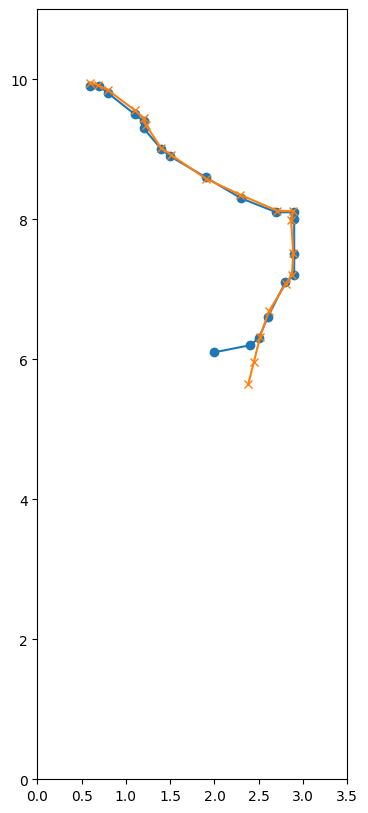

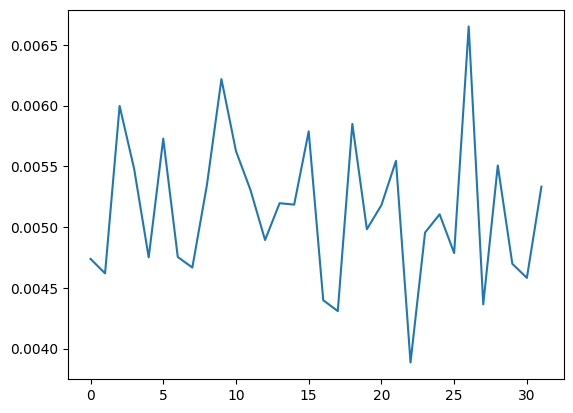

0.005137524283782113


In [25]:


model.eval()


loss_list = []
# dist_list = []
print(len(dm.test_dataloader()))
for i, batch in enumerate(dm.test_dataloader()):
    x, y = batch
    x, y = x.cuda(), y.cuda()
    print(x.shape, y.shape)
    
    # mean = 0.0  # 平均
    # std = 0.381  # 標準偏差
    # print(x)
    # x[:, :, 0] += get_random_noise(mean, std, (x.shape[0], x.shape[1])).cuda()
    # x[:, :, 1] += get_random_noise(mean, std, (x.shape[0], x.shape[1])).cuda()
    # print(x)
   
    x, y = x.view(-1, 80), y.view(-1, 40)
    shifted_y = torch.zeros_like(y)
    shifted_y[:, 4:] = y[:, :-4]

    
    y_hat = model(x, shifted_y)

    # print(y)
    # print(y_hat)


    loss = nn.functional.mse_loss(y_hat, y)
    loss_list.append(loss.item())
    print(i, loss.item())

    # print(y_hat.shape)

    x = x.view(-1, 20, 4)  # torch.Size([20, 4])
    y = y.view(-1, 20, 2)  # torch.Size([20, 2])
    y_hat = y_hat.view(-1, 20, 2)  # torch.Size([20, 2])

    # print(y_hat.shape)
    

    x = x.cpu().detach().numpy()
    y_hat = y_hat.cpu().detach().numpy()
    y = y.cpu().detach().numpy()
    plot_route(y[0], y_hat[0])
    

plt.plot(loss_list)
plt.show()

# plt.plot(dist_list)
# plt.show()

avg = sum(loss_list) / len(loss_list)
print(avg)


32
torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 2.0000, 0.6000, 1.8000],
        [0.0000, 0.0000, 0.0000,  ..., 9.3000, 1.4000, 9.5000],
        [0.0000, 0.0000, 0.0000,  ..., 8.6000, 2.9000, 9.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 6.5000, 2.2000, 6.6000],
        [0.0000, 0.0000, 0.0000,  ..., 0.2000, 0.3000, 0.1000],
        [0.0000, 0.0000, 0.0000,  ..., 9.1000, 2.7000, 9.4000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.2000, 0.0000, 2.1000, 0.1000, 1.9000,
         0.2000, 1.8000, 0.4000, 1.5000, 0.8000, 1.0000, 0.9000, 0.6000, 1.3000,
         0.3000, 1.4000, 0.0000, 1.7000, 0.0000, 1.8000, 0.0000, 2.0000, 0.2000,
         2.4000, 0.3000, 2.5000, 0.6000, 2.5000, 1.1000, 2.3000, 1.1000, 2.2000,
         1.0000, 2.0000, 0.6000, 1.8000]], device='cuda:0')
0
0 8.275190353393555


C:\TEMP\ipykernel_9196\1994764443.py:36: UserWarning: Using a target size (torch.Size([40])) that is different to the input size (torch.Size([1, 40])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = nn.functional.mse_loss(y_hat, y[j])


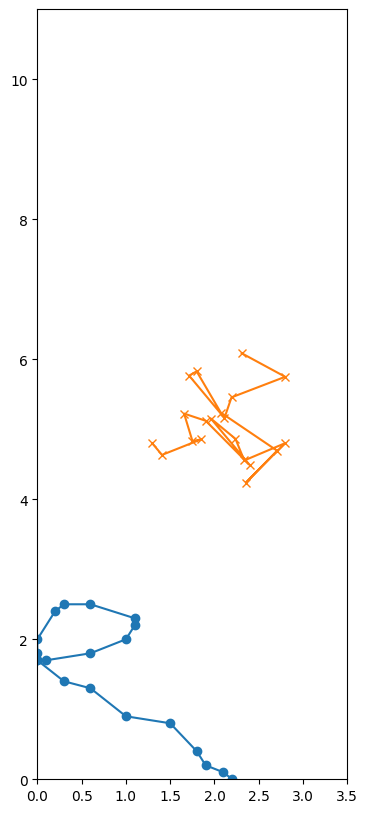

tensor([[0.0000, 0.0000, 0.0000,  ..., 2.0000, 0.6000, 1.8000],
        [0.0000, 0.0000, 0.0000,  ..., 9.3000, 1.4000, 9.5000],
        [0.0000, 0.0000, 0.0000,  ..., 8.6000, 2.9000, 9.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 6.5000, 2.2000, 6.6000],
        [0.0000, 0.0000, 0.0000,  ..., 0.2000, 0.3000, 0.1000],
        [0.0000, 0.0000, 0.0000,  ..., 9.1000, 2.7000, 9.4000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.7000, 6.7000, 0.6000, 6.8000, 0.3000,
         7.2000, 0.2000, 7.4000, 0.0000, 7.6000, 0.0000, 7.7000, 0.0000, 7.8000,
         0.2000, 8.2000, 0.3000, 8.2000, 0.5000, 8.3000, 0.7000, 8.3000, 1.2000,
         8.4000, 1.4000, 8.6000, 1.5000, 8.8000, 1.5000, 8.9000, 1.3000, 9.2000,
         1.3000, 9.3000, 1.4000, 9.5000]], device='cuda:0')
1
1 0.005898782052099705


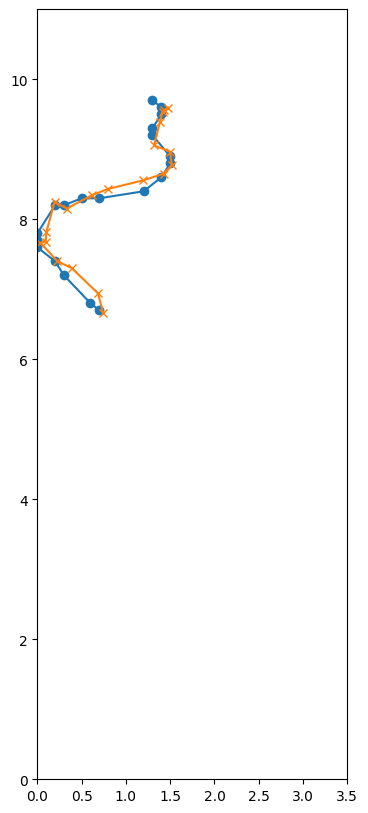

tensor([[0.0000, 0.0000, 0.0000,  ..., 2.0000, 0.6000, 1.8000],
        [0.0000, 0.0000, 0.0000,  ..., 9.3000, 1.4000, 9.5000],
        [0.0000, 0.0000, 0.0000,  ..., 8.6000, 2.9000, 9.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 6.5000, 2.2000, 6.6000],
        [0.0000, 0.0000, 0.0000,  ..., 0.2000, 0.3000, 0.1000],
        [0.0000, 0.0000, 0.0000,  ..., 9.1000, 2.7000, 9.4000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.8000, 4.6000, 2.9000, 4.7000, 2.9000,
         4.9000, 2.9000, 5.3000, 2.8000, 5.5000, 2.7000, 5.6000, 2.7000, 5.7000,
         2.8000, 6.0000, 2.8000, 6.1000, 2.9000, 6.6000, 2.9000, 6.7000, 2.9000,
         7.0000, 2.9000, 7.3000, 2.9000, 7.8000, 2.9000, 8.0000, 2.9000, 8.4000,
         2.9000, 8.6000, 2.9000, 9.0000]], device='cuda:0')
2
2 0.3292325437068939


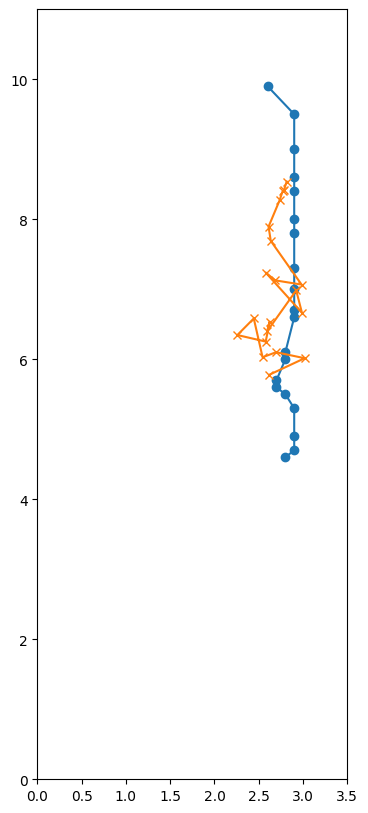

tensor([[0.0000, 0.0000, 0.0000,  ..., 2.0000, 0.6000, 1.8000],
        [0.0000, 0.0000, 0.0000,  ..., 9.3000, 1.4000, 9.5000],
        [0.0000, 0.0000, 0.0000,  ..., 8.6000, 2.9000, 9.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 6.5000, 2.2000, 6.6000],
        [0.0000, 0.0000, 0.0000,  ..., 0.2000, 0.3000, 0.1000],
        [0.0000, 0.0000, 0.0000,  ..., 9.1000, 2.7000, 9.4000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 3.8000, 0.0000, 3.7000, 0.0000,
         3.4000, 0.0000, 3.1000, 0.0000, 3.0000, 0.1000, 2.8000, 0.2000, 2.5000,
         0.2000, 2.1000, 0.1000, 1.9000, 0.0000, 1.5000, 0.0000, 1.4000, 0.0000,
         1.3000, 0.1000, 1.1000, 0.1000, 0.6000, 0.2000, 0.3000, 0.5000, 0.1000,
         0.6000, 0.0000, 0.8000, 0.0000]], device='cuda:0')
3
3 8.391691207885742


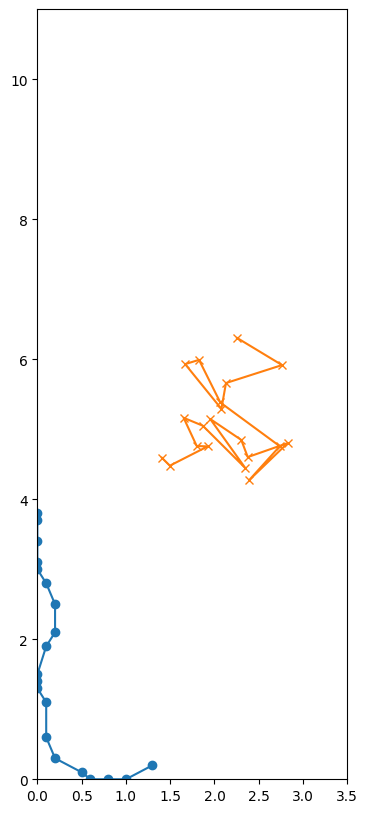

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 2.9000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.9000, 0.1000],
        [0.0000, 0.0000, 0.0000,  ..., 3.5000, 0.2000, 3.8000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 4.6000, 2.8000, 4.4000],
        [0.0000, 0.0000, 0.0000,  ..., 1.8000, 2.7000, 1.6000],
        [0.0000, 0.0000, 0.0000,  ..., 0.3000, 0.1000, 0.2000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.8000, 4.8000, 0.7000, 4.3000, 0.8000,
         4.0000, 0.9000, 3.8000, 0.9000, 3.7000, 0.9000, 3.5000, 1.0000, 3.1000,
         1.2000, 2.7000, 1.3000, 2.6000, 1.5000, 2.2000, 1.5000, 1.7000, 1.8000,
         1.3000, 2.2000, 1.0000, 2.5000, 0.6000, 2.5000, 0.4000, 2.5000, 0.0000,
         2.8000, 0.0000, 2.9000, 0.0000]], device='cuda:0')
0
0 6.445202827453613


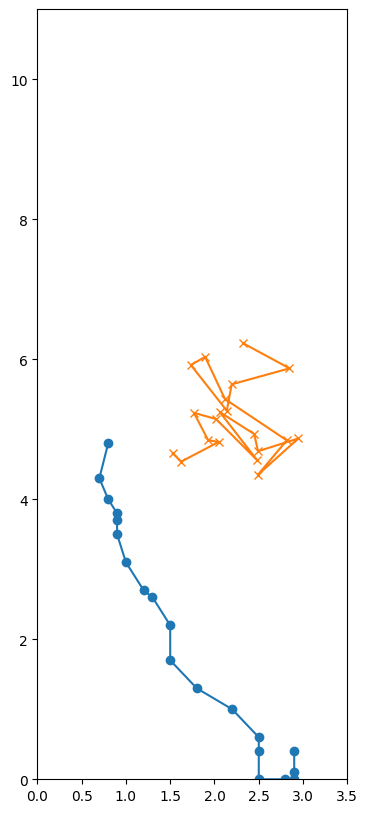

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 2.9000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.9000, 0.1000],
        [0.0000, 0.0000, 0.0000,  ..., 3.5000, 0.2000, 3.8000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 4.6000, 2.8000, 4.4000],
        [0.0000, 0.0000, 0.0000,  ..., 1.8000, 2.7000, 1.6000],
        [0.0000, 0.0000, 0.0000,  ..., 0.3000, 0.1000, 0.2000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.7000, 2.7000, 2.9000, 2.5000, 2.9000,
         2.3000, 2.9000, 2.1000, 2.9000, 2.0000, 2.8000, 1.7000, 2.8000, 1.2000,
         2.9000, 1.0000, 2.9000, 0.9000, 2.9000, 0.7000, 2.8000, 0.6000, 2.3000,
         0.4000, 2.2000, 0.3000, 2.1000, 0.3000, 1.7000, 0.2000, 1.6000, 0.0000,
         1.3000, 0.0000, 0.9000, 0.1000]], device='cuda:0')
1
1 8.863879203796387


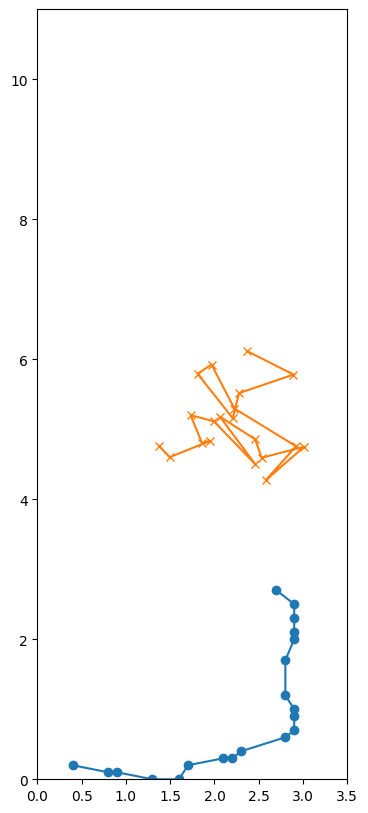

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 2.9000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.9000, 0.1000],
        [0.0000, 0.0000, 0.0000,  ..., 3.5000, 0.2000, 3.8000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 4.6000, 2.8000, 4.4000],
        [0.0000, 0.0000, 0.0000,  ..., 1.8000, 2.7000, 1.6000],
        [0.0000, 0.0000, 0.0000,  ..., 0.3000, 0.1000, 0.2000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.2000, 0.3000, 1.0000, 0.4000, 0.9000,
         0.5000, 0.5000, 0.5000, 0.4000, 0.5000, 0.3000, 0.5000, 0.1000, 0.5000,
         0.0000, 0.7000, 0.0000, 1.1000, 0.0000, 1.3000, 0.0000, 1.8000, 0.0000,
         2.2000, 0.0000, 2.5000, 0.1000, 2.8000, 0.2000, 3.1000, 0.2000, 3.2000,
         0.2000, 3.5000, 0.2000, 3.8000]], device='cuda:0')
2
2 8.308815002441406


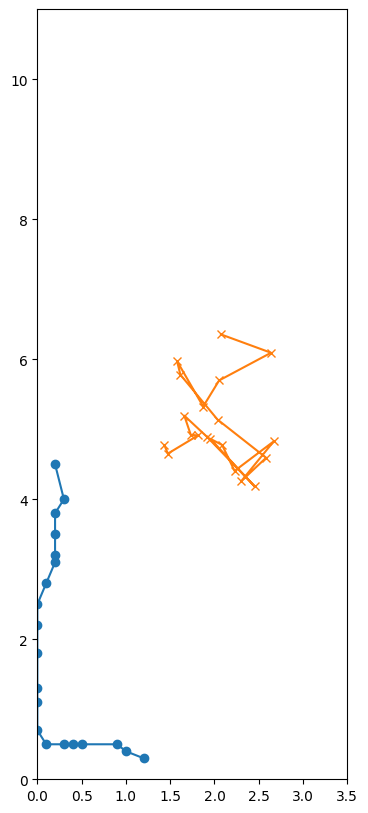

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 2.9000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.9000, 0.1000],
        [0.0000, 0.0000, 0.0000,  ..., 3.5000, 0.2000, 3.8000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 4.6000, 2.8000, 4.4000],
        [0.0000, 0.0000, 0.0000,  ..., 1.8000, 2.7000, 1.6000],
        [0.0000, 0.0000, 0.0000,  ..., 0.3000, 0.1000, 0.2000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.2000, 9.3000, 2.2000, 9.4000, 2.0000,
         9.6000, 1.6000, 9.6000, 1.3000, 9.9000, 0.9000, 9.9000, 0.8000, 9.9000,
         0.4000, 9.8000, 0.2000, 9.8000, 0.1000, 9.9000, 0.0000, 9.9000, 0.0000,
         9.8000, 0.0000, 9.5000, 0.0000, 9.2000, 0.0000, 9.0000, 0.0000, 8.8000,
         0.0000, 8.5000, 0.0000, 8.3000]], device='cuda:0')
3
3 0.017024433240294456


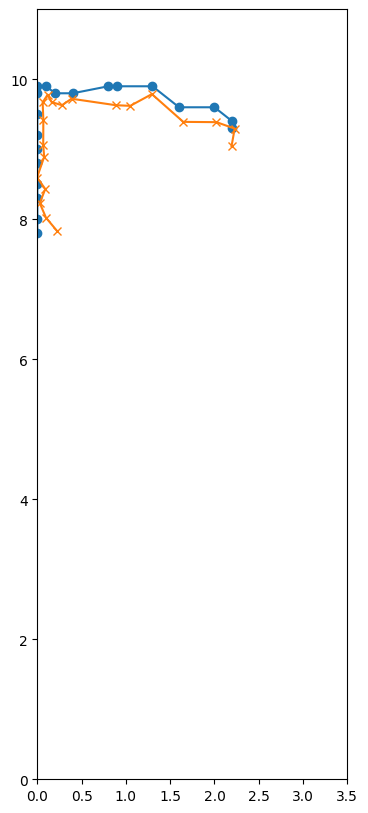

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.8000, 2.9000, 0.6000],
        [0.0000, 0.0000, 0.0000,  ..., 9.4000, 0.8000, 9.4000],
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.1000, 1.6000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.1000],
        [0.0000, 0.0000, 0.0000,  ..., 5.1000, 1.4000, 5.5000],
        [0.0000, 0.0000, 0.0000,  ..., 0.1000, 2.9000, 0.2000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.2000, 1.6000, 0.3000, 1.4000, 0.6000,
         1.0000, 1.0000, 0.9000, 1.3000, 0.9000, 1.7000, 1.2000, 1.8000, 1.5000,
         2.0000, 1.7000, 2.0000, 1.8000, 2.0000, 1.9000, 2.1000, 2.0000, 2.3000,
         2.0000, 2.7000, 1.7000, 2.9000, 1.7000, 2.9000, 1.6000, 2.9000, 1.1000,
         2.9000, 0.8000, 2.9000, 0.6000]], device='cuda:0')
0
0 8.059268951416016


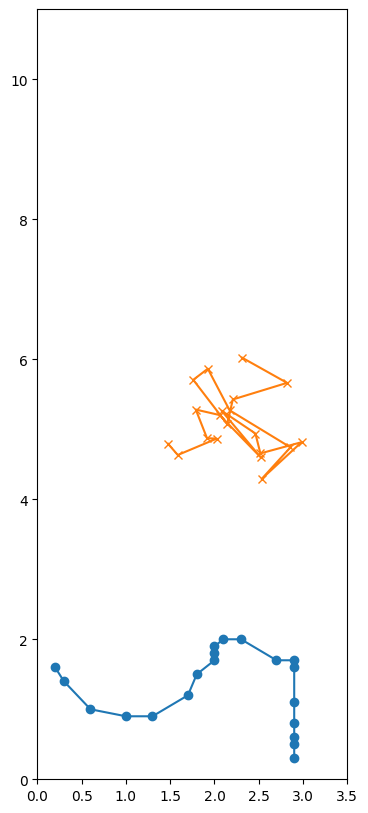

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.8000, 2.9000, 0.6000],
        [0.0000, 0.0000, 0.0000,  ..., 9.4000, 0.8000, 9.4000],
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.1000, 1.6000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.1000],
        [0.0000, 0.0000, 0.0000,  ..., 5.1000, 1.4000, 5.5000],
        [0.0000, 0.0000, 0.0000,  ..., 0.1000, 2.9000, 0.2000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.3000, 7.7000, 1.8000, 7.9000, 1.9000,
         7.9000, 2.3000, 8.1000, 2.7000, 8.0000, 2.9000, 8.1000, 2.9000, 8.3000,
         2.9000, 8.6000, 2.9000, 8.8000, 2.8000, 9.0000, 2.8000, 9.2000, 2.5000,
         9.6000, 2.4000, 9.9000, 2.1000, 9.9000, 1.7000, 9.8000, 1.3000, 9.7000,
         0.9000, 9.4000, 0.8000, 9.4000]], device='cuda:0')
1
1 0.02225172147154808


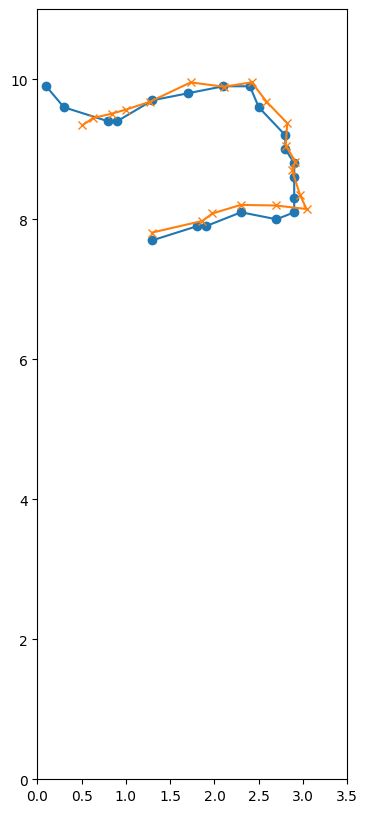

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.8000, 2.9000, 0.6000],
        [0.0000, 0.0000, 0.0000,  ..., 9.4000, 0.8000, 9.4000],
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.1000, 1.6000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.1000],
        [0.0000, 0.0000, 0.0000,  ..., 5.1000, 1.4000, 5.5000],
        [0.0000, 0.0000, 0.0000,  ..., 0.1000, 2.9000, 0.2000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.7000, 6.0000, 2.7000, 5.6000, 2.7000,
         5.4000, 2.9000, 5.0000, 2.9000, 4.7000, 2.6000, 4.3000, 2.6000, 3.9000,
         2.7000, 3.4000, 2.8000, 3.3000, 2.9000, 3.1000, 2.9000, 3.0000, 2.9000,
         2.7000, 2.9000, 2.4000, 2.9000, 2.2000, 2.6000, 1.8000, 2.4000, 1.6000,
         2.2000, 1.6000, 2.1000, 1.6000]], device='cuda:0')
2
2 2.4025204181671143


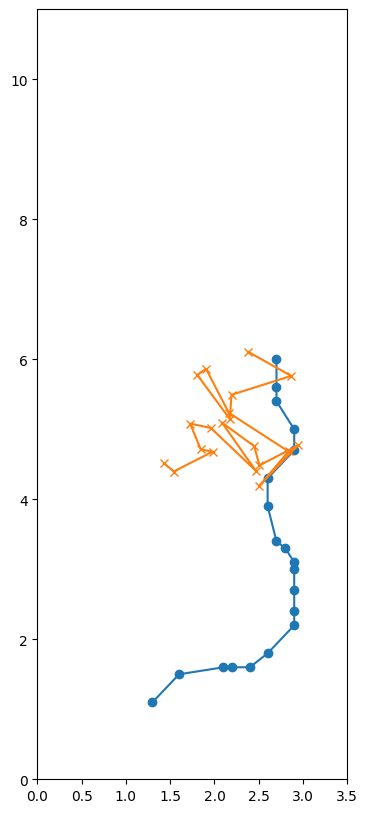

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.8000, 2.9000, 0.6000],
        [0.0000, 0.0000, 0.0000,  ..., 9.4000, 0.8000, 9.4000],
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.1000, 1.6000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.1000],
        [0.0000, 0.0000, 0.0000,  ..., 5.1000, 1.4000, 5.5000],
        [0.0000, 0.0000, 0.0000,  ..., 0.1000, 2.9000, 0.2000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.9000, 8.9000, 0.7000, 9.0000, 0.6000,
         9.2000, 0.5000, 9.3000, 0.2000, 9.3000, 0.0000, 9.4000, 0.0000, 9.8000,
         0.1000, 9.9000, 0.6000, 9.9000, 0.9000, 9.9000, 1.4000, 9.8000, 1.8000,
         9.7000, 2.0000, 9.6000, 2.5000, 9.7000, 2.8000, 9.6000, 2.9000, 9.6000,
         2.9000, 9.4000, 2.9000, 9.0000]], device='cuda:0')
3
3 0.01509160827845335


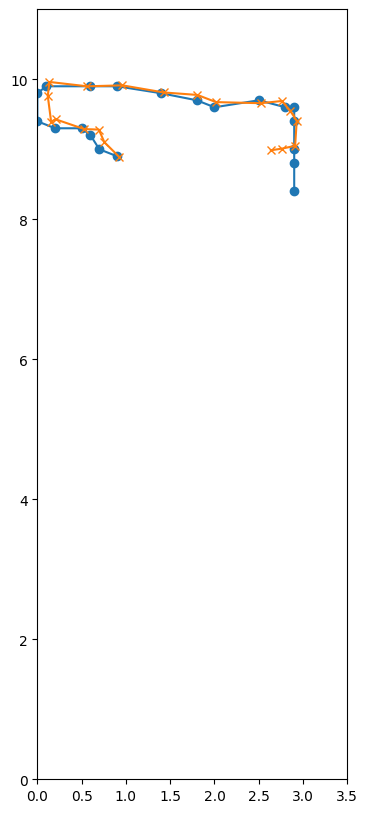

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 2.0000, 0.0000, 2.4000],
        [0.0000, 0.0000, 0.0000,  ..., 5.3000, 0.4000, 5.7000],
        [0.0000, 0.0000, 0.0000,  ..., 0.6000, 2.9000, 0.2000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.1000, 0.1000, 1.0000],
        [0.0000, 0.0000, 0.0000,  ..., 7.0000, 2.4000, 6.5000],
        [0.0000, 0.0000, 0.0000,  ..., 6.7000, 0.1000, 6.8000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.5000, 0.6000, 2.4000, 0.5000, 2.2000,
         0.5000, 1.9000, 0.7000, 1.8000, 0.8000, 1.4000, 0.9000, 1.0000, 0.9000,
         0.6000, 0.7000, 0.5000, 0.5000, 0.2000, 0.4000, 0.0000, 0.4000, 0.0000,
         0.5000, 0.0000, 0.7000, 0.0000, 0.9000, 0.0000, 1.1000, 0.0000, 1.5000,
         0.0000, 2.0000, 0.0000, 2.4000]], device='cuda:0')
0
0 10.415695190429688


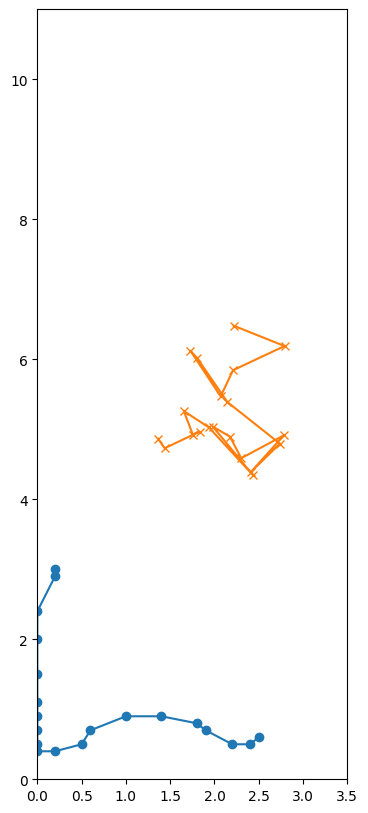

tensor([[0.0000, 0.0000, 0.0000,  ..., 2.0000, 0.0000, 2.4000],
        [0.0000, 0.0000, 0.0000,  ..., 5.3000, 0.4000, 5.7000],
        [0.0000, 0.0000, 0.0000,  ..., 0.6000, 2.9000, 0.2000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.1000, 0.1000, 1.0000],
        [0.0000, 0.0000, 0.0000,  ..., 7.0000, 2.4000, 6.5000],
        [0.0000, 0.0000, 0.0000,  ..., 6.7000, 0.1000, 6.8000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.8000, 0.9000, 1.9000, 0.8000,
         2.1000, 0.6000, 2.2000, 0.4000, 2.3000, 0.3000, 2.5000, 0.0000, 2.7000,
         0.0000, 3.0000, 0.0000, 3.2000, 0.0000, 3.6000, 0.0000, 3.7000, 0.1000,
         4.0000, 0.1000, 4.1000, 0.1000, 4.3000, 0.3000, 4.6000, 0.5000, 5.1000,
         0.5000, 5.3000, 0.4000, 5.7000]], device='cuda:0')
1
1 4.16223669052124


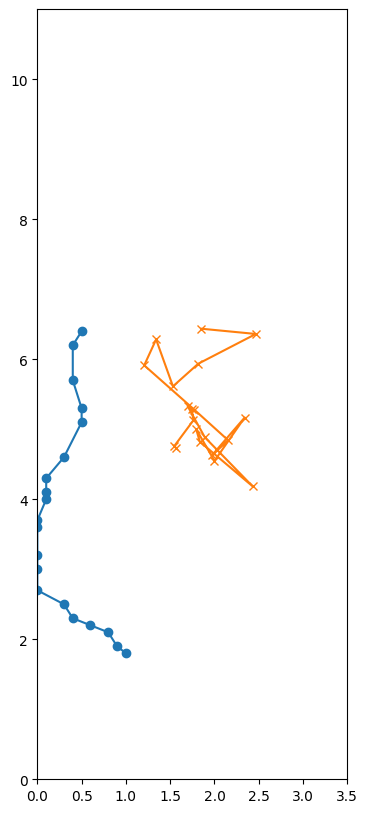

tensor([[0.0000, 0.0000, 0.0000,  ..., 2.0000, 0.0000, 2.4000],
        [0.0000, 0.0000, 0.0000,  ..., 5.3000, 0.4000, 5.7000],
        [0.0000, 0.0000, 0.0000,  ..., 0.6000, 2.9000, 0.2000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.1000, 0.1000, 1.0000],
        [0.0000, 0.0000, 0.0000,  ..., 7.0000, 2.4000, 6.5000],
        [0.0000, 0.0000, 0.0000,  ..., 6.7000, 0.1000, 6.8000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.0000, 4.5000, 2.3000, 4.3000, 2.8000,
         4.2000, 2.9000, 4.1000, 2.9000, 3.9000, 2.9000, 3.7000, 2.9000, 3.3000,
         2.9000, 2.8000, 2.9000, 2.4000, 2.9000, 2.2000, 2.9000, 2.1000, 2.9000,
         1.8000, 2.9000, 1.7000, 2.9000, 1.6000, 2.9000, 1.5000, 2.9000, 1.0000,
         2.9000, 0.6000, 2.9000, 0.2000]], device='cuda:0')
2
2 4.852321624755859


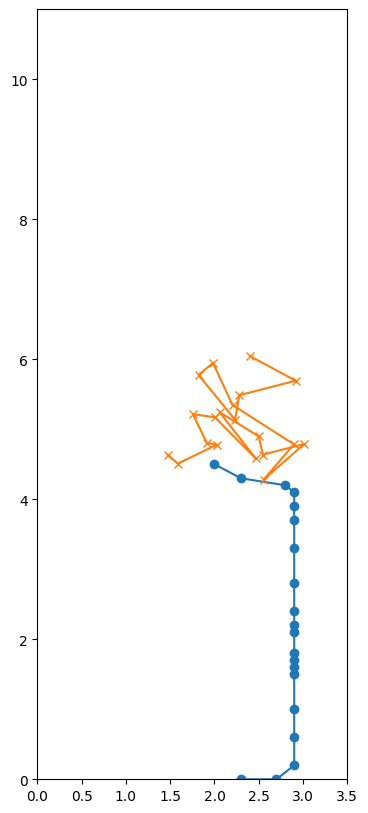

tensor([[0.0000, 0.0000, 0.0000,  ..., 2.0000, 0.0000, 2.4000],
        [0.0000, 0.0000, 0.0000,  ..., 5.3000, 0.4000, 5.7000],
        [0.0000, 0.0000, 0.0000,  ..., 0.6000, 2.9000, 0.2000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.1000, 0.1000, 1.0000],
        [0.0000, 0.0000, 0.0000,  ..., 7.0000, 2.4000, 6.5000],
        [0.0000, 0.0000, 0.0000,  ..., 6.7000, 0.1000, 6.8000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.3000, 8.5000, 1.3000, 8.1000, 1.2000,
         7.6000, 1.3000, 7.1000, 1.3000, 6.9000, 1.4000, 6.7000, 1.6000, 6.6000,
         1.8000, 6.5000, 2.0000, 6.1000, 2.1000, 6.0000, 2.1000, 5.9000, 2.1000,
         5.4000, 2.0000, 5.1000, 1.7000, 4.7000, 1.8000, 4.2000, 1.8000, 4.1000,
         1.8000, 4.0000, 2.1000, 3.6000]], device='cuda:0')
3
3 0.9487965703010559


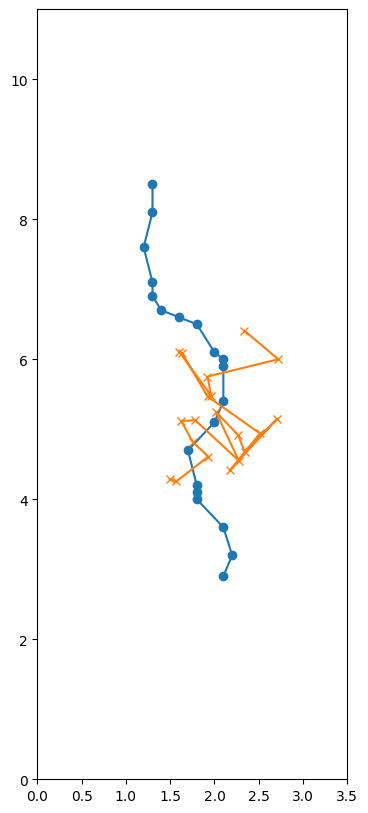

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 8.0000, 2.7000, 8.1000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 5.8000, 2.7000, 5.7000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 9.1000, 2.7000, 9.2000],
        [0.0000, 0.0000, 0.0000,  ..., 2.8000, 1.5000, 2.9000],
        [0.0000, 0.0000, 0.0000,  ..., 8.6000, 0.6000, 8.5000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 7.4000, 0.2000, 7.2000, 0.3000,
         7.2000, 0.5000, 7.1000, 0.7000, 6.8000, 0.8000, 6.8000, 1.2000, 7.1000,
         1.3000, 7.1000, 1.5000, 7.3000, 1.9000, 7.4000, 2.3000, 7.2000, 2.5000,
         7.2000, 2.8000, 7.2000, 2.9000, 7.2000, 2.9000, 7.4000, 2.8000, 7.8000,
         2.8000, 8.0000, 2.7000, 8.1000]], device='cuda:0')
0
0 0.07670250535011292


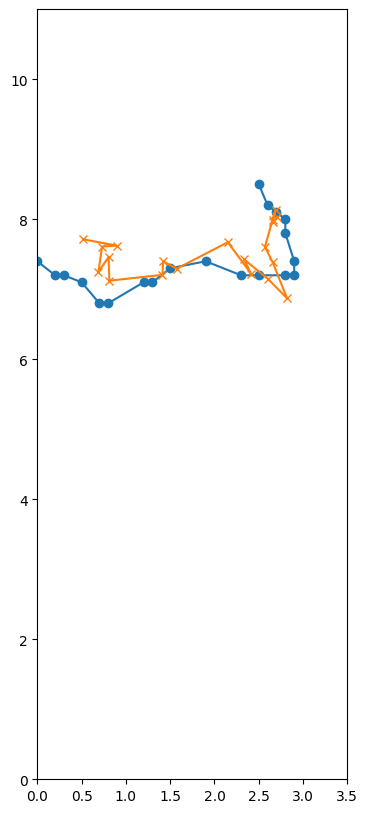

tensor([[0.0000, 0.0000, 0.0000,  ..., 8.0000, 2.7000, 8.1000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 5.8000, 2.7000, 5.7000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 9.1000, 2.7000, 9.2000],
        [0.0000, 0.0000, 0.0000,  ..., 2.8000, 1.5000, 2.9000],
        [0.0000, 0.0000, 0.0000,  ..., 8.6000, 0.6000, 8.5000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.4000, 2.5000, 0.5000, 2.5000, 0.7000,
         2.4000, 1.1000, 2.5000, 1.4000, 2.4000, 1.5000, 2.1000, 1.5000, 2.0000,
         1.4000, 1.6000, 1.3000, 1.3000, 1.3000, 1.1000, 1.1000, 0.6000, 1.1000,
         0.5000, 1.1000, 0.2000, 0.9000, 0.0000, 0.7000, 0.0000, 0.6000, 0.0000,
         0.2000, 0.0000, 0.0000, 0.0000]], device='cuda:0')
1
1 9.315475463867188


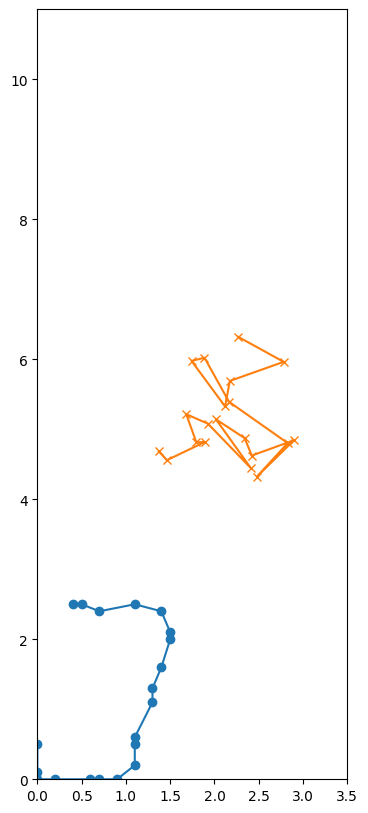

tensor([[0.0000, 0.0000, 0.0000,  ..., 8.0000, 2.7000, 8.1000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 5.8000, 2.7000, 5.7000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 9.1000, 2.7000, 9.2000],
        [0.0000, 0.0000, 0.0000,  ..., 2.8000, 1.5000, 2.9000],
        [0.0000, 0.0000, 0.0000,  ..., 8.6000, 0.6000, 8.5000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.9000, 9.6000, 2.0000, 9.2000, 2.1000,
         8.8000, 2.2000, 8.6000, 2.3000, 8.5000, 2.4000, 8.3000, 2.5000, 8.0000,
         2.7000, 7.5000, 2.9000, 7.3000, 2.9000, 7.2000, 2.9000, 6.9000, 2.9000,
         6.5000, 2.9000, 6.4000, 2.9000, 6.2000, 2.9000, 6.1000, 2.9000, 6.0000,
         2.8000, 5.8000, 2.7000, 5.7000]], device='cuda:0')
2
2 0.4887710511684418


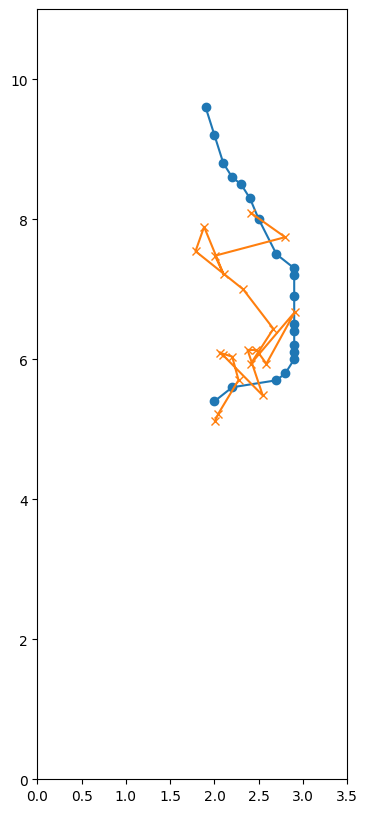

tensor([[0.0000, 0.0000, 0.0000,  ..., 8.0000, 2.7000, 8.1000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 5.8000, 2.7000, 5.7000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 9.1000, 2.7000, 9.2000],
        [0.0000, 0.0000, 0.0000,  ..., 2.8000, 1.5000, 2.9000],
        [0.0000, 0.0000, 0.0000,  ..., 8.6000, 0.6000, 8.5000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.6000, 6.6000, 2.5000, 6.1000, 2.3000,
         5.9000, 2.1000, 5.9000, 1.7000, 5.5000, 1.6000, 5.0000, 1.6000, 4.9000,
         1.6000, 4.8000, 1.4000, 4.4000, 1.4000, 4.2000, 1.2000, 3.7000, 1.4000,
         3.3000, 1.5000, 2.8000, 1.4000, 2.4000, 1.5000, 2.2000, 1.7000, 2.0000,
         1.9000, 1.9000, 2.3000, 2.0000]], device='cuda:0')
3
3 1.7119663953781128


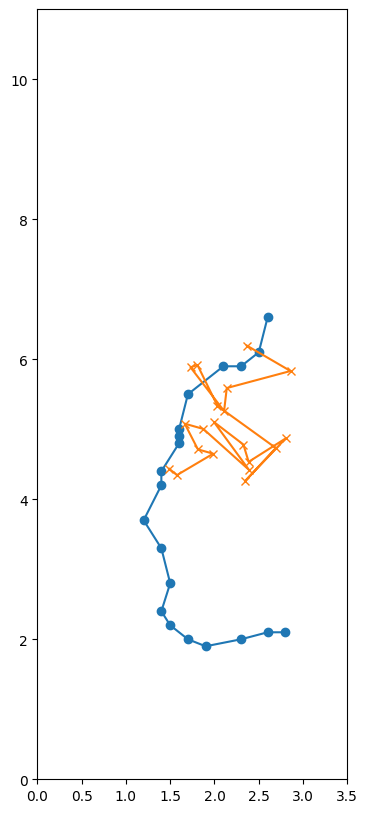

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.1000, 2.8000, 0.2000],
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.9000, 1.7000],
        [0.0000, 0.0000, 0.0000,  ..., 3.4000, 0.9000, 3.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 9.8000, 0.1000, 9.9000],
        [0.0000, 0.0000, 0.0000,  ..., 9.2000, 0.8000, 9.0000],
        [0.0000, 0.0000, 0.0000,  ..., 3.9000, 1.0000, 3.6000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.5000, 0.4000, 0.6000, 0.2000, 0.6000,
         0.1000, 0.5000, 0.0000, 0.4000, 0.0000, 0.1000, 0.2000, 0.0000, 0.2000,
         0.0000, 0.1000, 0.0000, 0.0000, 0.1000, 0.0000, 0.2000, 0.0000, 0.6000,
         0.0000, 1.1000, 0.0000, 1.4000, 0.0000, 1.5000, 0.0000, 2.0000, 0.0000,
         2.4000, 0.1000, 2.8000, 0.2000]], device='cuda:0')
0
0 14.746830940246582


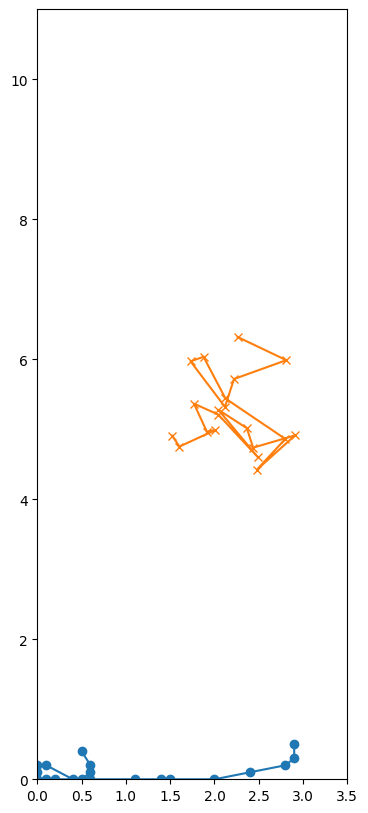

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.1000, 2.8000, 0.2000],
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.9000, 1.7000],
        [0.0000, 0.0000, 0.0000,  ..., 3.4000, 0.9000, 3.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 9.8000, 0.1000, 9.9000],
        [0.0000, 0.0000, 0.0000,  ..., 9.2000, 0.8000, 9.0000],
        [0.0000, 0.0000, 0.0000,  ..., 3.9000, 1.0000, 3.6000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.6000, 0.2000, 1.6000, 0.1000, 1.6000,
         0.0000, 1.5000, 0.0000, 1.0000, 0.1000, 0.6000, 0.3000, 0.4000, 0.4000,
         0.4000, 0.5000, 0.2000, 0.9000, 0.2000, 1.1000, 0.4000, 1.3000, 0.9000,
         1.4000, 1.4000, 1.5000, 1.9000, 1.4000, 2.0000, 1.4000, 2.5000, 1.6000,
         2.8000, 1.6000, 2.9000, 1.7000]], device='cuda:0')
1
1 10.138483047485352


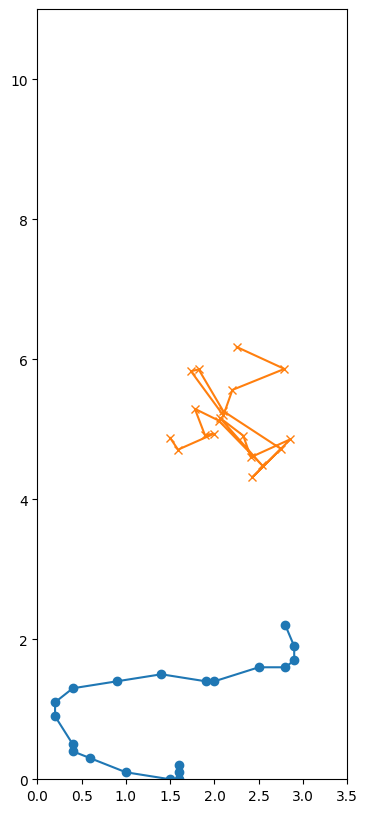

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.1000, 2.8000, 0.2000],
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.9000, 1.7000],
        [0.0000, 0.0000, 0.0000,  ..., 3.4000, 0.9000, 3.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 9.8000, 0.1000, 9.9000],
        [0.0000, 0.0000, 0.0000,  ..., 9.2000, 0.8000, 9.0000],
        [0.0000, 0.0000, 0.0000,  ..., 3.9000, 1.0000, 3.6000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.1000, 6.3000, 2.5000, 6.3000, 2.7000,
         6.2000, 2.8000, 6.0000, 2.8000, 5.5000, 2.9000, 5.4000, 2.9000, 5.2000,
         2.9000, 5.1000, 2.8000, 4.9000, 2.8000, 4.4000, 2.7000, 4.2000, 2.5000,
         3.9000, 2.2000, 3.7000, 2.0000, 3.7000, 1.7000, 3.5000, 1.2000, 3.6000,
         0.9000, 3.4000, 0.9000, 3.3000]], device='cuda:0')
2
2 0.6196433901786804


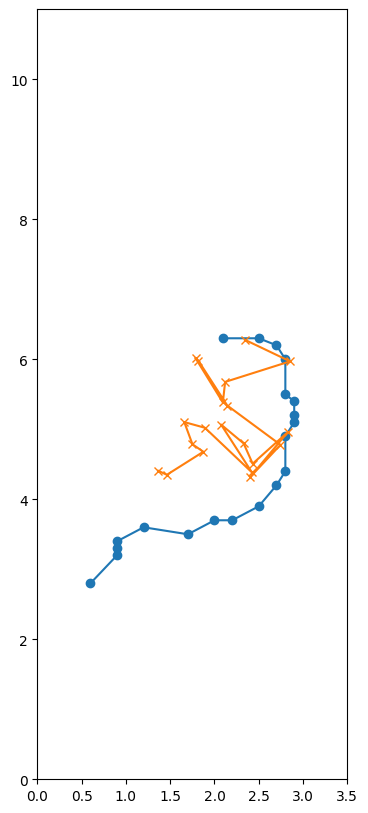

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.1000, 2.8000, 0.2000],
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.9000, 1.7000],
        [0.0000, 0.0000, 0.0000,  ..., 3.4000, 0.9000, 3.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 9.8000, 0.1000, 9.9000],
        [0.0000, 0.0000, 0.0000,  ..., 9.2000, 0.8000, 9.0000],
        [0.0000, 0.0000, 0.0000,  ..., 3.9000, 1.0000, 3.6000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.8000, 8.6000, 2.6000, 8.4000, 2.6000,
         8.3000, 2.7000, 8.1000, 2.7000, 7.9000, 2.8000, 7.4000, 2.8000, 7.3000,
         2.7000, 7.1000, 2.4000, 6.8000, 2.4000, 6.7000, 2.3000, 6.2000, 2.3000,
         5.8000, 2.1000, 5.4000, 2.0000, 5.0000, 2.1000, 4.8000, 2.1000, 4.3000,
         2.3000, 3.9000, 2.5000, 3.7000]], device='cuda:0')
3
3 1.3812817335128784


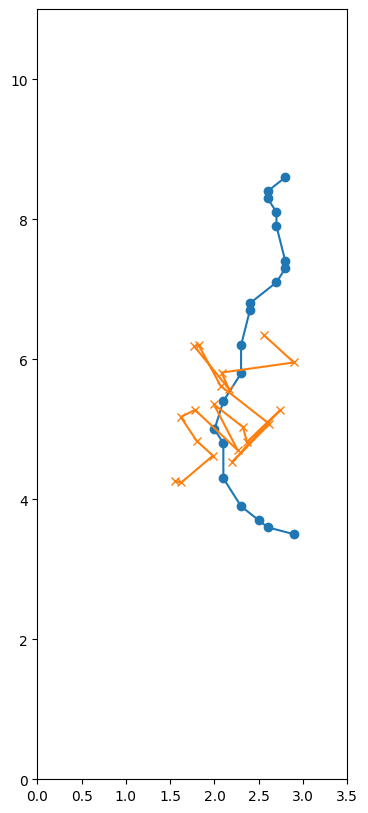

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 2.0000, 1.5000, 2.1000],
        [0.0000, 0.0000, 0.0000,  ..., 6.5000, 0.0000, 6.9000],
        [0.0000, 0.0000, 0.0000,  ..., 2.0000, 2.7000, 1.8000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 5.8000, 2.3000, 5.7000],
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 1.6000, 9.7000],
        [0.0000, 0.0000, 0.0000,  ..., 6.9000, 0.3000, 7.2000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.5000, 0.1000, 2.2000, 0.2000, 2.1000,
         0.2000, 2.0000, 0.2000, 1.9000, 0.1000, 1.6000, 0.0000, 1.2000, 0.0000,
         0.8000, 0.0000, 0.7000, 0.1000, 0.6000, 0.5000, 0.5000, 0.9000, 0.5000,
         1.1000, 0.8000, 1.5000, 0.9000, 1.7000, 1.0000, 1.9000, 1.1000, 1.9000,
         1.4000, 2.0000, 1.5000, 2.1000]], device='cuda:0')
0
0 10.116209030151367


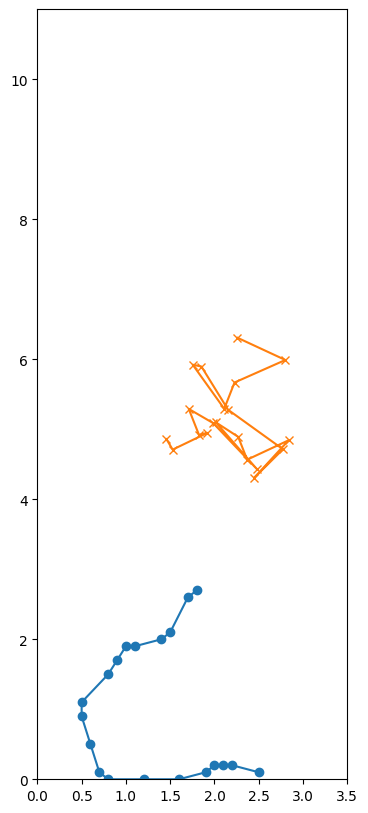

tensor([[0.0000, 0.0000, 0.0000,  ..., 2.0000, 1.5000, 2.1000],
        [0.0000, 0.0000, 0.0000,  ..., 6.5000, 0.0000, 6.9000],
        [0.0000, 0.0000, 0.0000,  ..., 2.0000, 2.7000, 1.8000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 5.8000, 2.3000, 5.7000],
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 1.6000, 9.7000],
        [0.0000, 0.0000, 0.0000,  ..., 6.9000, 0.3000, 7.2000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.2000, 2.7000, 0.0000, 2.8000, 0.0000,
         3.2000, 0.2000, 3.5000, 0.4000, 3.8000, 0.4000, 4.3000, 0.4000, 4.4000,
         0.3000, 4.8000, 0.2000, 5.0000, 0.0000, 5.1000, 0.0000, 5.2000, 0.0000,
         5.5000, 0.0000, 5.8000, 0.0000, 6.2000, 0.0000, 6.3000, 0.0000, 6.4000,
         0.0000, 6.5000, 0.0000, 6.9000]], device='cuda:0')
1
1 2.8153128623962402


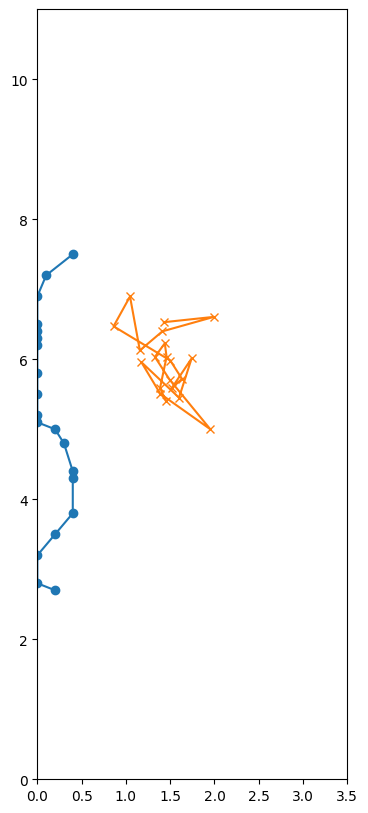

tensor([[0.0000, 0.0000, 0.0000,  ..., 2.0000, 1.5000, 2.1000],
        [0.0000, 0.0000, 0.0000,  ..., 6.5000, 0.0000, 6.9000],
        [0.0000, 0.0000, 0.0000,  ..., 2.0000, 2.7000, 1.8000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 5.8000, 2.3000, 5.7000],
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 1.6000, 9.7000],
        [0.0000, 0.0000, 0.0000,  ..., 6.9000, 0.3000, 7.2000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.8000, 6.0000, 2.9000, 5.9000, 2.9000,
         5.8000, 2.9000, 5.7000, 2.9000, 5.3000, 2.9000, 4.9000, 2.9000, 4.8000,
         2.9000, 4.3000, 2.9000, 4.0000, 2.8000, 3.7000, 2.9000, 3.5000, 2.9000,
         3.2000, 2.9000, 2.7000, 2.9000, 2.5000, 2.9000, 2.3000, 2.9000, 2.2000,
         2.8000, 2.0000, 2.7000, 1.8000]], device='cuda:0')
2
2 1.866604208946228


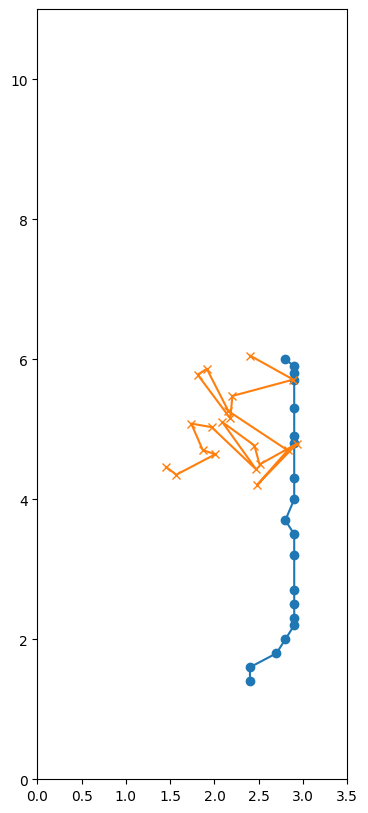

tensor([[0.0000, 0.0000, 0.0000,  ..., 2.0000, 1.5000, 2.1000],
        [0.0000, 0.0000, 0.0000,  ..., 6.5000, 0.0000, 6.9000],
        [0.0000, 0.0000, 0.0000,  ..., 2.0000, 2.7000, 1.8000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 5.8000, 2.3000, 5.7000],
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 1.6000, 9.7000],
        [0.0000, 0.0000, 0.0000,  ..., 6.9000, 0.3000, 7.2000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.9000, 5.3000, 1.7000, 5.1000, 1.4000,
         5.0000, 1.0000, 4.9000, 0.6000, 5.0000, 0.5000, 5.1000, 0.5000, 5.3000,
         0.2000, 5.7000, 0.0000, 6.1000, 0.0000, 6.3000, 0.0000, 6.6000, 0.0000,
         6.8000, 0.2000, 7.0000, 0.3000, 7.2000, 0.2000, 7.6000, 0.2000, 7.8000,
         0.1000, 8.2000, 0.0000, 8.3000]], device='cuda:0')
3
3 0.5773906111717224


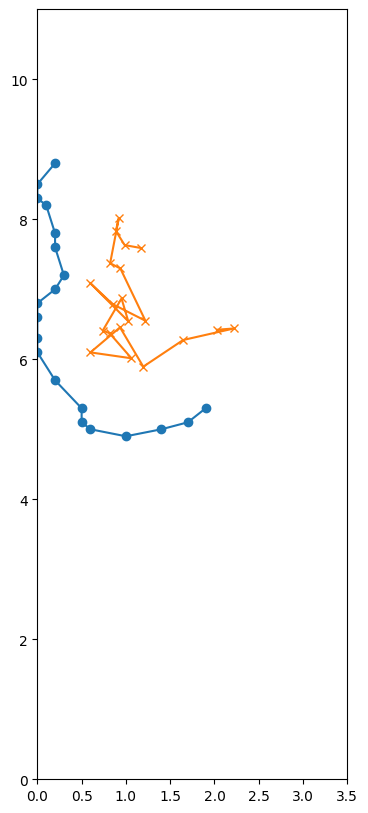

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 4.7000, 2.1000, 4.9000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.8000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.4000, 1.4000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.2000, 1.8000, 0.8000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 2.4000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 8.9000, 0.4000, 8.8000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.1000, 1.3000, 1.5000, 1.4000, 1.6000,
         1.5000, 1.7000, 1.9000, 1.7000, 2.2000, 1.8000, 2.4000, 1.8000, 2.6000,
         1.6000, 2.8000, 1.4000, 3.0000, 1.4000, 3.2000, 1.5000, 3.4000, 1.7000,
         3.5000, 1.8000, 3.8000, 1.9000, 4.0000, 2.0000, 4.3000, 1.9000, 4.5000,
         1.9000, 4.7000, 2.1000, 4.9000]], device='cuda:0')
0
0 3.6032989025115967


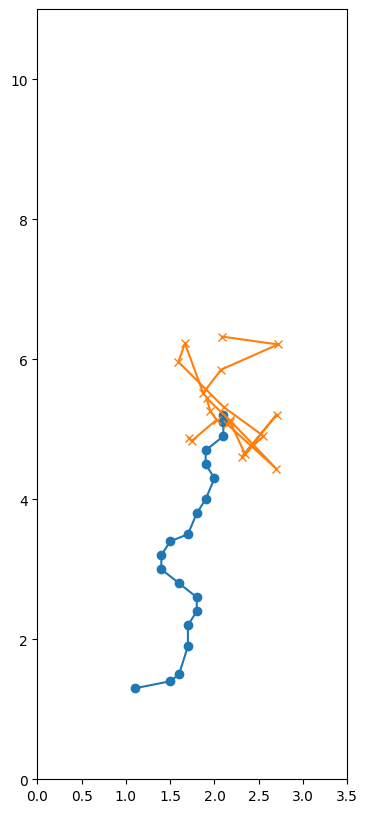

tensor([[0.0000, 0.0000, 0.0000,  ..., 4.7000, 2.1000, 4.9000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.8000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.4000, 1.4000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.2000, 1.8000, 0.8000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 2.4000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 8.9000, 0.4000, 8.8000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.2000, 1.1000, 0.5000, 0.7000, 0.5000,
         0.6000, 0.6000, 0.5000, 0.7000, 0.4000, 0.8000, 0.1000, 0.8000, 0.0000,
         0.6000, 0.0000, 0.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1000, 0.3000,
         0.4000, 0.4000, 0.4000, 0.6000, 0.3000, 0.8000, 0.2000, 1.3000, 0.0000,
         1.5000, 0.0000, 1.8000, 0.0000]], device='cuda:0')
1
1 13.604640007019043


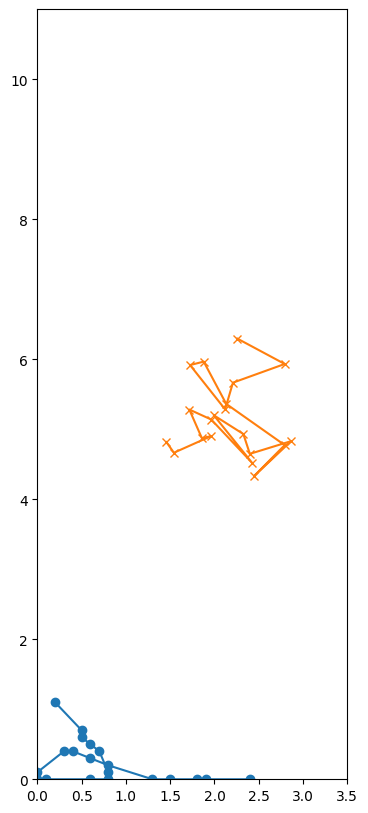

tensor([[0.0000, 0.0000, 0.0000,  ..., 4.7000, 2.1000, 4.9000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.8000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.4000, 1.4000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.2000, 1.8000, 0.8000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 2.4000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 8.9000, 0.4000, 8.8000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.1000, 4.8000, 1.0000, 4.5000, 1.0000,
         4.2000, 1.0000, 4.1000, 0.7000, 3.7000, 0.5000, 3.5000, 0.5000, 3.3000,
         0.5000, 3.0000, 0.5000, 2.9000, 0.5000, 2.8000, 0.6000, 2.6000, 1.0000,
         2.3000, 1.1000, 2.2000, 1.3000, 2.1000, 1.4000, 2.1000, 1.9000, 1.9000,
         2.2000, 1.6000, 2.4000, 1.4000]], device='cuda:0')
2
2 3.8505825996398926


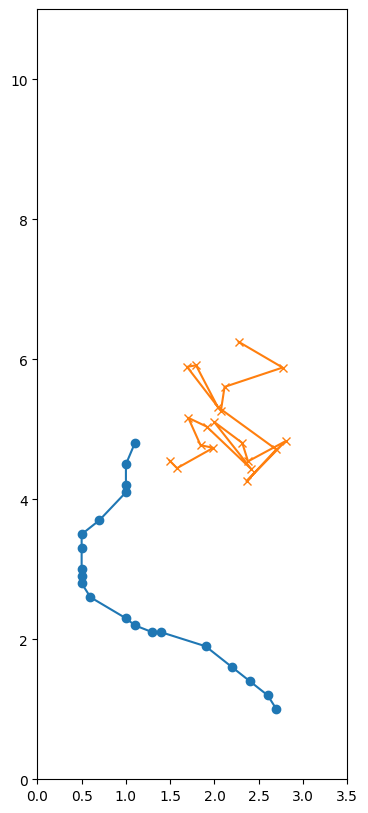

tensor([[0.0000, 0.0000, 0.0000,  ..., 4.7000, 2.1000, 4.9000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.8000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.4000, 1.4000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.2000, 1.8000, 0.8000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 2.4000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 8.9000, 0.4000, 8.8000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.2000, 0.1000, 0.9000, 0.4000, 0.4000,
         0.4000, 0.0000, 0.3000, 0.0000, 0.1000, 0.0000, 0.0000, 0.2000, 0.0000,
         0.5000, 0.0000, 0.8000, 0.0000, 1.2000, 0.0000, 1.6000, 0.0000, 1.9000,
         0.1000, 2.2000, 0.2000, 2.4000, 0.2000, 2.6000, 0.3000, 2.9000, 0.5000,
         2.9000, 0.6000, 2.9000, 0.8000]], device='cuda:0')
3
3 13.04405689239502


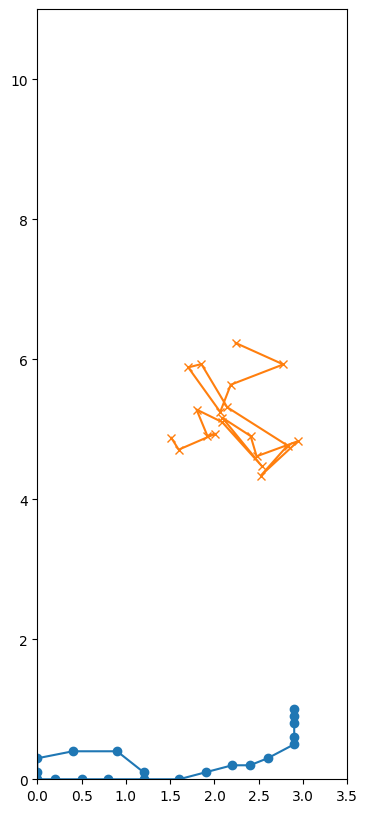

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 4.9000, 2.8000, 5.1000],
        [0.0000, 0.0000, 0.0000,  ..., 6.9000, 2.7000, 7.4000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.1000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 7.5000, 2.5000, 7.3000],
        [0.0000, 0.0000, 0.0000,  ..., 5.0000, 0.1000, 4.5000],
        [0.0000, 0.0000, 0.0000,  ..., 2.4000, 0.2000, 2.1000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.3000, 7.7000, 1.2000, 7.2000, 1.1000,
         6.9000, 1.3000, 6.5000, 1.5000, 6.0000, 1.5000, 5.9000, 1.5000, 5.7000,
         1.5000, 5.5000, 1.6000, 5.3000, 1.6000, 5.1000, 1.7000, 4.8000, 1.9000,
         4.7000, 2.2000, 4.6000, 2.3000, 4.5000, 2.7000, 4.5000, 2.9000, 4.7000,
         2.9000, 4.9000, 2.8000, 5.1000]], device='cuda:0')
0
0 0.38792961835861206


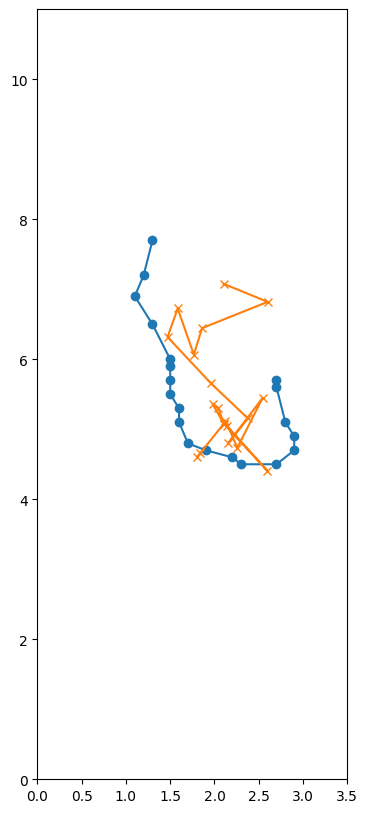

tensor([[0.0000, 0.0000, 0.0000,  ..., 4.9000, 2.8000, 5.1000],
        [0.0000, 0.0000, 0.0000,  ..., 6.9000, 2.7000, 7.4000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.1000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 7.5000, 2.5000, 7.3000],
        [0.0000, 0.0000, 0.0000,  ..., 5.0000, 0.1000, 4.5000],
        [0.0000, 0.0000, 0.0000,  ..., 2.4000, 0.2000, 2.1000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.6000, 3.1000, 1.1000, 3.1000, 1.5000,
         3.2000, 1.6000, 3.3000, 1.7000, 3.5000, 2.0000, 3.8000, 2.2000, 4.3000,
         2.3000, 4.7000, 2.1000, 5.2000, 2.1000, 5.3000, 2.2000, 5.5000, 2.6000,
         5.7000, 2.8000, 5.9000, 2.9000, 6.0000, 2.9000, 6.4000, 2.9000, 6.7000,
         2.9000, 6.9000, 2.7000, 7.4000]], device='cuda:0')
1
1 1.570984959602356


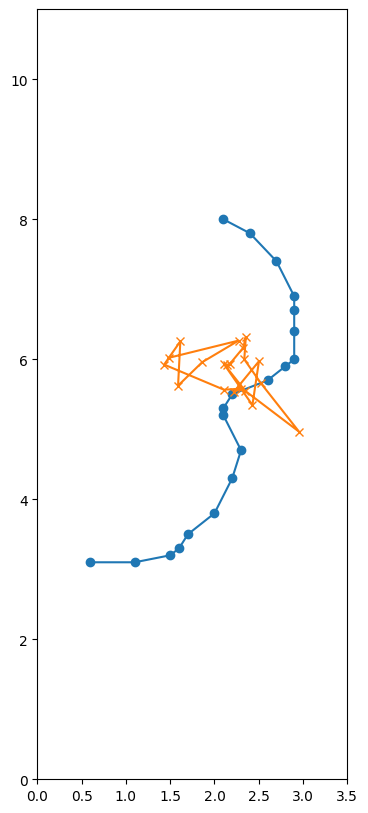

tensor([[0.0000, 0.0000, 0.0000,  ..., 4.9000, 2.8000, 5.1000],
        [0.0000, 0.0000, 0.0000,  ..., 6.9000, 2.7000, 7.4000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.1000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 7.5000, 2.5000, 7.3000],
        [0.0000, 0.0000, 0.0000,  ..., 5.0000, 0.1000, 4.5000],
        [0.0000, 0.0000, 0.0000,  ..., 2.4000, 0.2000, 2.1000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.1000, 1.4000, 2.0000, 1.4000, 1.7000,
         1.4000, 1.2000, 1.5000, 1.0000, 1.5000, 0.8000, 1.6000, 0.7000, 1.6000,
         0.5000, 1.5000, 0.1000, 1.5000, 0.0000, 1.3000, 0.1000, 1.0000, 0.1000,
         0.9000, 0.3000, 0.6000, 0.4000, 0.5000, 0.5000, 0.3000, 0.5000, 0.0000,
         0.3000, 0.0000, 0.0000, 0.1000]], device='cuda:0')
2
2 10.042125701904297


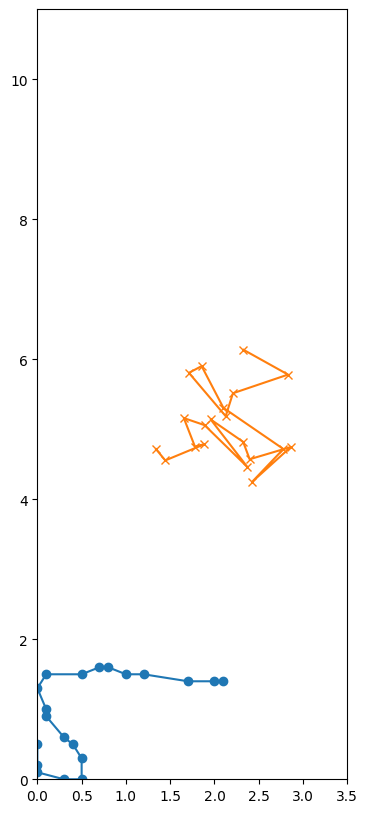

tensor([[0.0000, 0.0000, 0.0000,  ..., 4.9000, 2.8000, 5.1000],
        [0.0000, 0.0000, 0.0000,  ..., 6.9000, 2.7000, 7.4000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.1000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 7.5000, 2.5000, 7.3000],
        [0.0000, 0.0000, 0.0000,  ..., 5.0000, 0.1000, 4.5000],
        [0.0000, 0.0000, 0.0000,  ..., 2.4000, 0.2000, 2.1000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.4000, 7.0000, 1.4000, 6.5000, 1.4000,
         6.3000, 1.5000, 6.2000, 1.8000, 6.2000, 2.0000, 6.3000, 2.1000, 6.4000,
         2.2000, 6.5000, 2.2000, 6.6000, 1.9000, 7.0000, 1.8000, 7.4000, 1.8000,
         7.7000, 1.5000, 8.1000, 1.4000, 8.6000, 1.6000, 9.1000, 1.8000, 9.3000,
         2.2000, 9.6000, 2.3000, 9.6000]], device='cuda:0')
3
3 0.040374137461185455


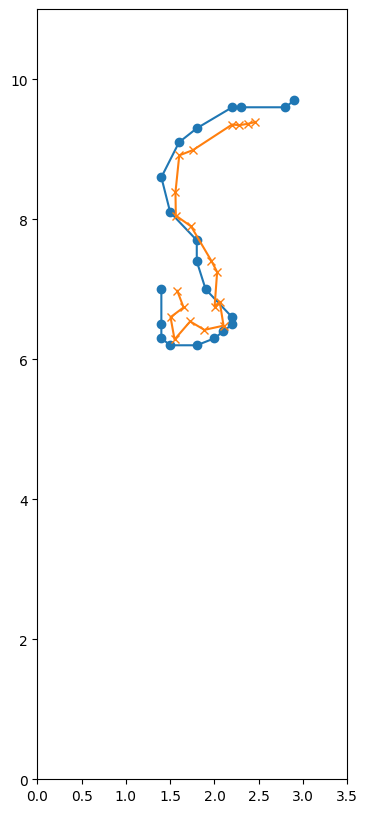

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 9.8000, 2.0000, 9.6000],
        [0.0000, 0.0000, 0.0000,  ..., 8.6000, 1.4000, 8.7000],
        [0.0000, 0.0000, 0.0000,  ..., 4.2000, 0.2000, 4.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 3.5000, 2.3000, 3.5000],
        [0.0000, 0.0000, 0.0000,  ..., 2.9000, 0.0000, 3.2000],
        [0.0000, 0.0000, 0.0000,  ..., 9.6000, 2.9000, 9.5000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 8.1000, 0.6000, 8.1000, 0.3000,
         8.2000, 0.1000, 8.5000, 0.1000, 8.6000, 0.0000, 9.0000, 0.0000, 9.2000,
         0.0000, 9.3000, 0.0000, 9.4000, 0.0000, 9.5000, 0.0000, 9.9000, 0.1000,
         9.9000, 0.5000, 9.8000, 0.6000, 9.8000, 0.9000, 9.7000, 1.3000, 9.7000,
         1.6000, 9.8000, 2.0000, 9.6000]], device='cuda:0')
0
0 0.014422710053622723


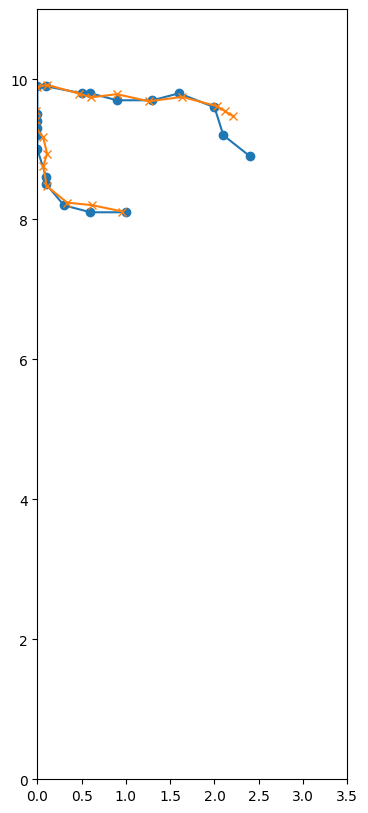

tensor([[0.0000, 0.0000, 0.0000,  ..., 9.8000, 2.0000, 9.6000],
        [0.0000, 0.0000, 0.0000,  ..., 8.6000, 1.4000, 8.7000],
        [0.0000, 0.0000, 0.0000,  ..., 4.2000, 0.2000, 4.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 3.5000, 2.3000, 3.5000],
        [0.0000, 0.0000, 0.0000,  ..., 2.9000, 0.0000, 3.2000],
        [0.0000, 0.0000, 0.0000,  ..., 9.6000, 2.9000, 9.5000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 4.3000, 1.0000, 4.6000, 0.9000,
         4.8000, 0.9000, 5.1000, 1.0000, 5.3000, 0.9000, 5.7000, 0.9000, 6.2000,
         0.8000, 6.7000, 0.5000, 7.1000, 0.3000, 7.2000, 0.2000, 7.5000, 0.1000,
         7.7000, 0.1000, 8.2000, 0.4000, 8.6000, 0.8000, 8.7000, 1.2000, 8.6000,
         1.3000, 8.6000, 1.4000, 8.7000]], device='cuda:0')
1
1 0.1884434074163437


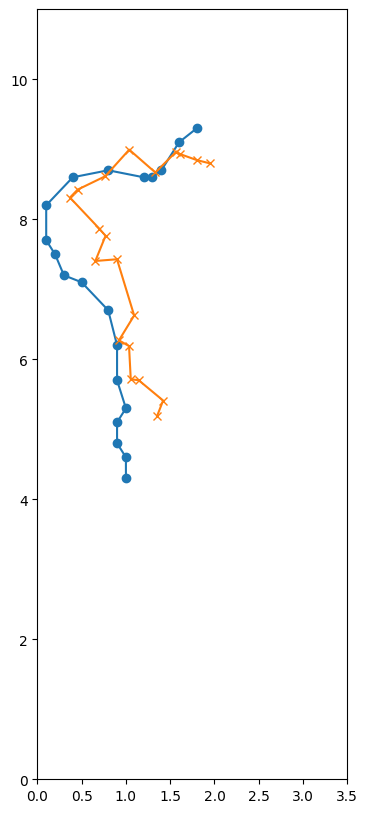

tensor([[0.0000, 0.0000, 0.0000,  ..., 9.8000, 2.0000, 9.6000],
        [0.0000, 0.0000, 0.0000,  ..., 8.6000, 1.4000, 8.7000],
        [0.0000, 0.0000, 0.0000,  ..., 4.2000, 0.2000, 4.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 3.5000, 2.3000, 3.5000],
        [0.0000, 0.0000, 0.0000,  ..., 2.9000, 0.0000, 3.2000],
        [0.0000, 0.0000, 0.0000,  ..., 9.6000, 2.9000, 9.5000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.1000, 3.3000, 0.2000, 3.6000, 0.5000,
         3.8000, 0.8000, 4.2000, 1.2000, 4.3000, 1.5000, 4.7000, 1.5000, 5.0000,
         1.5000, 5.1000, 1.4000, 5.4000, 1.3000, 5.5000, 1.0000, 5.5000, 0.5000,
         5.5000, 0.3000, 5.4000, 0.0000, 5.3000, 0.0000, 5.0000, 0.0000, 4.5000,
         0.0000, 4.2000, 0.2000, 4.0000]], device='cuda:0')
2
2 1.6303901672363281


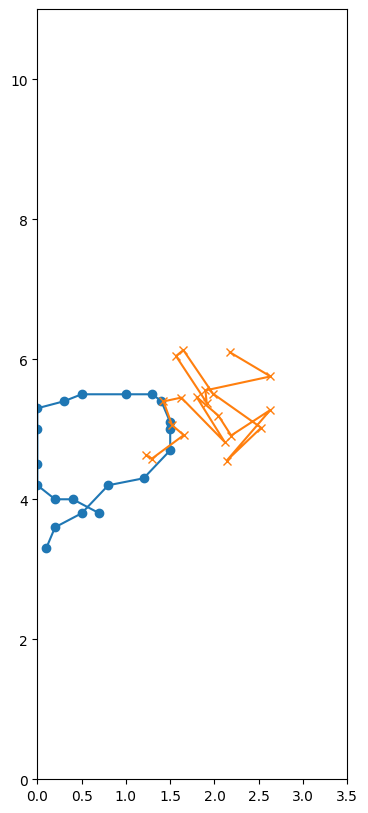

tensor([[0.0000, 0.0000, 0.0000,  ..., 9.8000, 2.0000, 9.6000],
        [0.0000, 0.0000, 0.0000,  ..., 8.6000, 1.4000, 8.7000],
        [0.0000, 0.0000, 0.0000,  ..., 4.2000, 0.2000, 4.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 3.5000, 2.3000, 3.5000],
        [0.0000, 0.0000, 0.0000,  ..., 2.9000, 0.0000, 3.2000],
        [0.0000, 0.0000, 0.0000,  ..., 9.6000, 2.9000, 9.5000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.4000, 0.0000, 1.2000, 0.0000,
         0.7000, 0.0000, 0.6000, 0.0000, 0.2000, 0.0000, 0.0000, 0.2000, 0.0000,
         0.6000, 0.1000, 1.0000, 0.0000, 1.1000, 0.0000, 1.6000, 0.1000, 1.7000,
         0.2000, 1.8000, 0.3000, 2.1000, 0.3000, 2.2000, 0.3000, 2.3000, 0.3000,
         2.7000, 0.4000, 2.8000, 0.4000]], device='cuda:0')
3
3 12.92444133758545


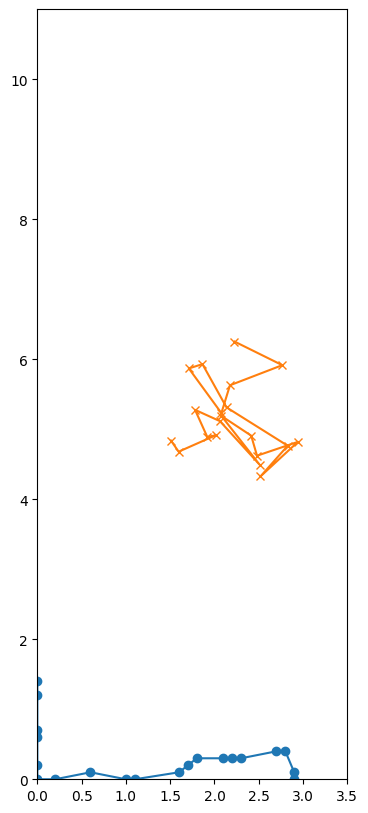

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 2.2000, 2.1000, 2.2000],
        [0.0000, 0.0000, 0.0000,  ..., 2.1000, 0.5000, 1.8000],
        [0.0000, 0.0000, 0.0000,  ..., 9.6000, 1.1000, 9.4000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 7.0000, 1.4000, 6.9000],
        [0.0000, 0.0000, 0.0000,  ..., 9.1000, 2.9000, 9.2000],
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 1.3000, 9.9000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.9000, 0.4000, 1.2000, 0.4000, 1.4000,
         0.5000, 1.8000, 0.8000, 1.9000, 0.8000, 2.3000, 0.5000, 2.4000, 0.2000,
         2.5000, 0.0000, 2.6000, 0.0000, 2.9000, 0.1000, 2.9000, 0.2000, 2.8000,
         0.4000, 2.9000, 0.9000, 2.9000, 1.3000, 2.9000, 1.5000, 2.7000, 1.9000,
         2.3000, 2.2000, 2.1000, 2.2000]], device='cuda:0')
0
0 9.919207572937012


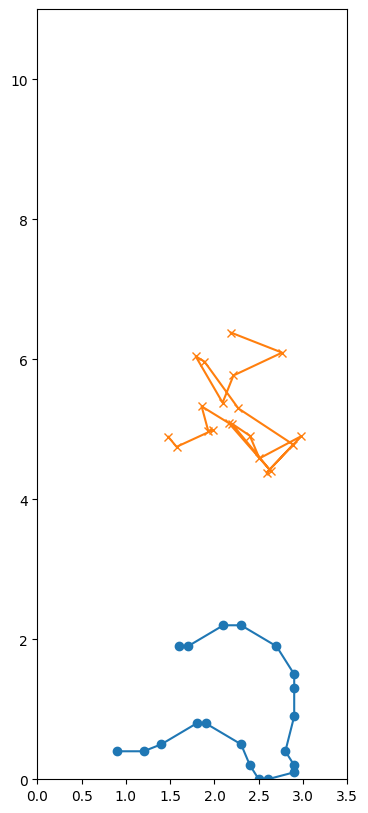

tensor([[0.0000, 0.0000, 0.0000,  ..., 2.2000, 2.1000, 2.2000],
        [0.0000, 0.0000, 0.0000,  ..., 2.1000, 0.5000, 1.8000],
        [0.0000, 0.0000, 0.0000,  ..., 9.6000, 1.1000, 9.4000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 7.0000, 1.4000, 6.9000],
        [0.0000, 0.0000, 0.0000,  ..., 9.1000, 2.9000, 9.2000],
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 1.3000, 9.9000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.3000, 5.8000, 1.3000, 5.7000, 1.5000,
         5.5000, 1.9000, 5.4000, 2.2000, 5.0000, 2.2000, 4.9000, 2.2000, 4.6000,
         2.1000, 4.3000, 2.0000, 4.2000, 2.0000, 4.1000, 1.7000, 3.7000, 1.7000,
         3.4000, 1.6000, 3.1000, 1.5000, 2.8000, 1.2000, 2.5000, 0.9000, 2.2000,
         0.7000, 2.1000, 0.5000, 1.8000]], device='cuda:0')
1
1 1.8005999326705933


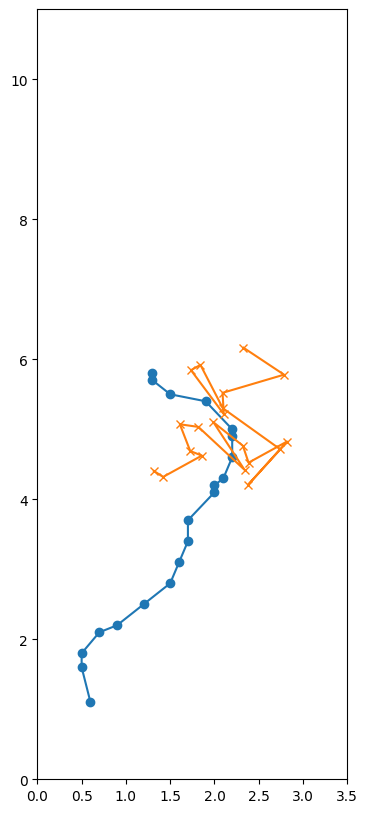

tensor([[0.0000, 0.0000, 0.0000,  ..., 2.2000, 2.1000, 2.2000],
        [0.0000, 0.0000, 0.0000,  ..., 2.1000, 0.5000, 1.8000],
        [0.0000, 0.0000, 0.0000,  ..., 9.6000, 1.1000, 9.4000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 7.0000, 1.4000, 6.9000],
        [0.0000, 0.0000, 0.0000,  ..., 9.1000, 2.9000, 9.2000],
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 1.3000, 9.9000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.9000, 7.8000, 2.9000, 8.0000, 2.7000,
         8.3000, 2.7000, 8.4000, 2.7000, 8.5000, 2.7000, 8.9000, 2.8000, 9.0000,
         2.9000, 9.3000, 2.9000, 9.4000, 2.7000, 9.7000, 2.4000, 9.9000, 2.2000,
         9.9000, 2.0000, 9.9000, 1.7000, 9.9000, 1.6000, 9.9000, 1.4000, 9.8000,
         1.3000, 9.6000, 1.1000, 9.4000]], device='cuda:0')
2
2 0.005498320795595646


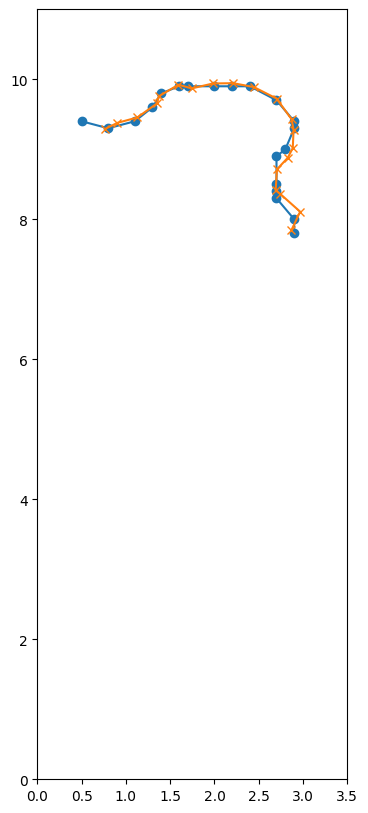

tensor([[0.0000, 0.0000, 0.0000,  ..., 2.2000, 2.1000, 2.2000],
        [0.0000, 0.0000, 0.0000,  ..., 2.1000, 0.5000, 1.8000],
        [0.0000, 0.0000, 0.0000,  ..., 9.6000, 1.1000, 9.4000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 7.0000, 1.4000, 6.9000],
        [0.0000, 0.0000, 0.0000,  ..., 9.1000, 2.9000, 9.2000],
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 1.3000, 9.9000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.8000, 2.9000, 2.2000, 2.9000, 2.5000,
         3.0000, 2.7000, 3.3000, 2.9000, 3.4000, 2.9000, 3.5000, 2.9000, 3.8000,
         2.8000, 4.2000, 2.8000, 4.3000, 2.7000, 4.8000, 2.5000, 4.9000, 2.1000,
         4.9000, 1.9000, 4.8000, 1.5000, 4.5000, 1.0000, 4.4000, 0.5000, 4.6000,
         0.3000, 4.8000, 0.0000, 4.9000]], device='cuda:0')
3
3 1.4731863737106323


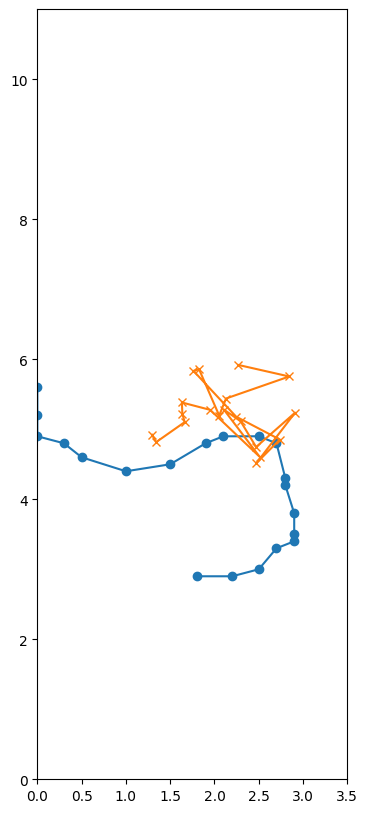

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 4.6000, 0.3000, 4.3000],
        [0.0000, 0.0000, 0.0000,  ..., 6.6000, 2.9000, 6.5000],
        [0.0000, 0.0000, 0.0000,  ..., 9.0000, 0.2000, 9.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 7.2000, 1.2000, 7.3000],
        [0.0000, 0.0000, 0.0000,  ..., 1.9000, 1.0000, 1.5000],
        [0.0000, 0.0000, 0.0000,  ..., 4.2000, 2.2000, 4.3000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.0000, 8.3000, 2.2000, 8.0000, 2.5000,
         7.7000, 2.6000, 7.4000, 2.6000, 7.0000, 2.4000, 6.8000, 2.0000, 6.4000,
         1.9000, 6.3000, 1.7000, 6.1000, 1.6000, 5.8000, 1.4000, 5.7000, 1.0000,
         5.6000, 0.6000, 5.4000, 0.1000, 5.3000, 0.0000, 5.2000, 0.0000, 5.0000,
         0.1000, 4.6000, 0.3000, 4.3000]], device='cuda:0')
0
0 0.8596565127372742


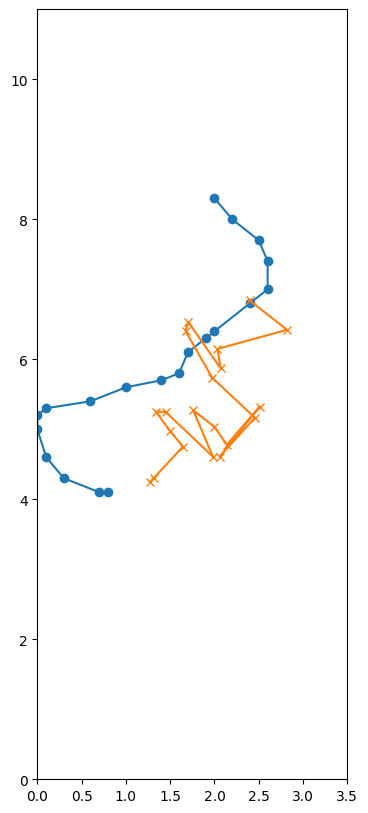

tensor([[0.0000, 0.0000, 0.0000,  ..., 4.6000, 0.3000, 4.3000],
        [0.0000, 0.0000, 0.0000,  ..., 6.6000, 2.9000, 6.5000],
        [0.0000, 0.0000, 0.0000,  ..., 9.0000, 0.2000, 9.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 7.2000, 1.2000, 7.3000],
        [0.0000, 0.0000, 0.0000,  ..., 1.9000, 1.0000, 1.5000],
        [0.0000, 0.0000, 0.0000,  ..., 4.2000, 2.2000, 4.3000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.1000, 9.6000, 2.2000, 9.6000, 2.4000,
         9.7000, 2.6000, 9.7000, 2.8000, 9.6000, 2.9000, 9.4000, 2.9000, 9.3000,
         2.9000, 9.2000, 2.9000, 9.0000, 2.7000, 8.5000, 2.6000, 8.4000, 2.6000,
         8.3000, 2.6000, 7.8000, 2.8000, 7.6000, 2.9000, 7.2000, 2.9000, 7.0000,
         2.9000, 6.6000, 2.9000, 6.5000]], device='cuda:0')
1
1 0.14135538041591644


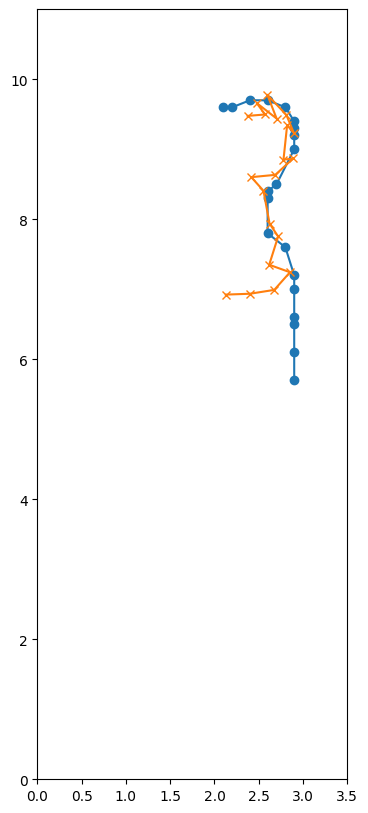

tensor([[0.0000, 0.0000, 0.0000,  ..., 4.6000, 0.3000, 4.3000],
        [0.0000, 0.0000, 0.0000,  ..., 6.6000, 2.9000, 6.5000],
        [0.0000, 0.0000, 0.0000,  ..., 9.0000, 0.2000, 9.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 7.2000, 1.2000, 7.3000],
        [0.0000, 0.0000, 0.0000,  ..., 1.9000, 1.0000, 1.5000],
        [0.0000, 0.0000, 0.0000,  ..., 4.2000, 2.2000, 4.3000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.2000, 5.3000, 0.8000, 5.1000, 0.6000,
         5.0000, 0.1000, 5.0000, 0.0000, 5.2000, 0.0000, 5.3000, 0.0000, 5.8000,
         0.0000, 5.9000, 0.0000, 6.2000, 0.0000, 6.4000, 0.0000, 6.6000, 0.0000,
         7.0000, 0.0000, 7.5000, 0.0000, 7.7000, 0.1000, 8.1000, 0.2000, 8.6000,
         0.3000, 9.0000, 0.2000, 9.3000]], device='cuda:0')
2
2 0.529628574848175


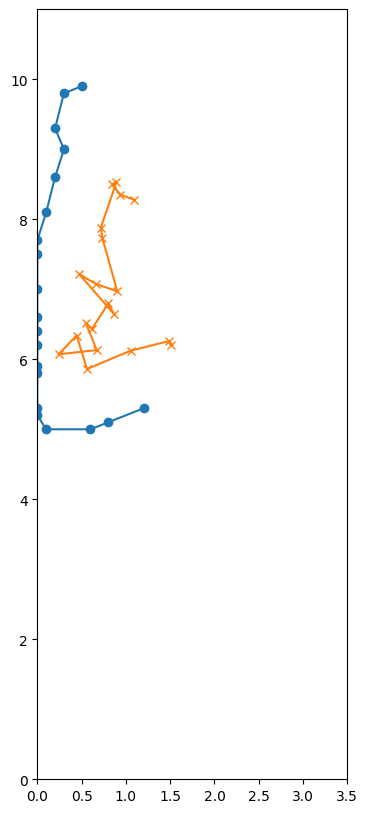

tensor([[0.0000, 0.0000, 0.0000,  ..., 4.6000, 0.3000, 4.3000],
        [0.0000, 0.0000, 0.0000,  ..., 6.6000, 2.9000, 6.5000],
        [0.0000, 0.0000, 0.0000,  ..., 9.0000, 0.2000, 9.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 7.2000, 1.2000, 7.3000],
        [0.0000, 0.0000, 0.0000,  ..., 1.9000, 1.0000, 1.5000],
        [0.0000, 0.0000, 0.0000,  ..., 4.2000, 2.2000, 4.3000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.5000, 7.9000, 1.2000, 8.3000, 1.0000,
         8.3000, 0.9000, 8.2000, 0.9000, 7.7000, 0.9000, 7.3000, 0.9000, 7.0000,
         1.1000, 6.7000, 1.1000, 6.4000, 1.2000, 5.9000, 1.3000, 5.7000, 1.4000,
         5.6000, 1.6000, 5.3000, 1.9000, 4.9000, 1.8000, 4.4000, 2.0000, 4.1000,
         2.3000, 4.0000, 2.7000, 3.7000]], device='cuda:0')
3
3 1.3331884145736694


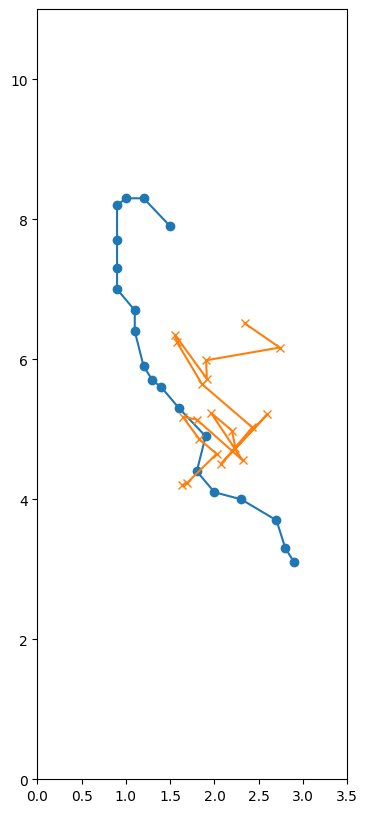

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 5.0000, 0.0000, 5.0000],
        [0.0000, 0.0000, 0.0000,  ..., 6.3000, 2.3000, 6.7000],
        [0.0000, 0.0000, 0.0000,  ..., 9.1000, 2.9000, 9.2000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 3.2000, 1.4000, 3.3000],
        [0.0000, 0.0000, 0.0000,  ..., 4.5000, 0.9000, 4.0000],
        [0.0000, 0.0000, 0.0000,  ..., 1.5000, 2.8000, 2.0000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.8000, 8.3000, 0.7000, 8.1000, 0.8000,
         7.7000, 0.7000, 7.5000, 0.4000, 7.3000, 0.2000, 7.2000, 0.1000, 7.2000,
         0.0000, 7.1000, 0.0000, 6.7000, 0.0000, 6.4000, 0.1000, 6.1000, 0.2000,
         6.0000, 0.3000, 5.9000, 0.5000, 5.4000, 0.5000, 5.3000, 0.4000, 5.1000,
         0.2000, 5.0000, 0.0000, 5.0000]], device='cuda:0')
0
0 1.1640920639038086


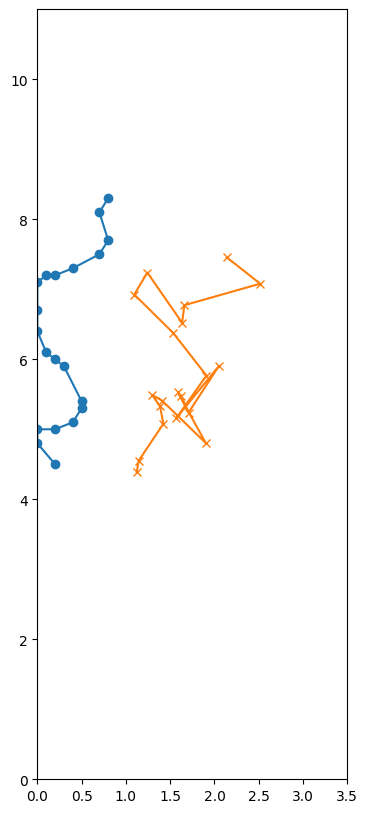

tensor([[0.0000, 0.0000, 0.0000,  ..., 5.0000, 0.0000, 5.0000],
        [0.0000, 0.0000, 0.0000,  ..., 6.3000, 2.3000, 6.7000],
        [0.0000, 0.0000, 0.0000,  ..., 9.1000, 2.9000, 9.2000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 3.2000, 1.4000, 3.3000],
        [0.0000, 0.0000, 0.0000,  ..., 4.5000, 0.9000, 4.0000],
        [0.0000, 0.0000, 0.0000,  ..., 1.5000, 2.8000, 2.0000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.1000, 5.8000, 0.0000, 5.7000, 0.0000,
         5.6000, 0.0000, 5.3000, 0.0000, 4.9000, 0.1000, 4.6000, 0.4000, 4.2000,
         0.6000, 4.2000, 0.8000, 4.3000, 1.0000, 4.4000, 1.2000, 4.6000, 1.4000,
         4.7000, 1.5000, 4.8000, 1.6000, 5.2000, 1.9000, 5.6000, 1.9000, 5.9000,
         2.0000, 6.3000, 2.3000, 6.7000]], device='cuda:0')
1
1 1.2049421072006226


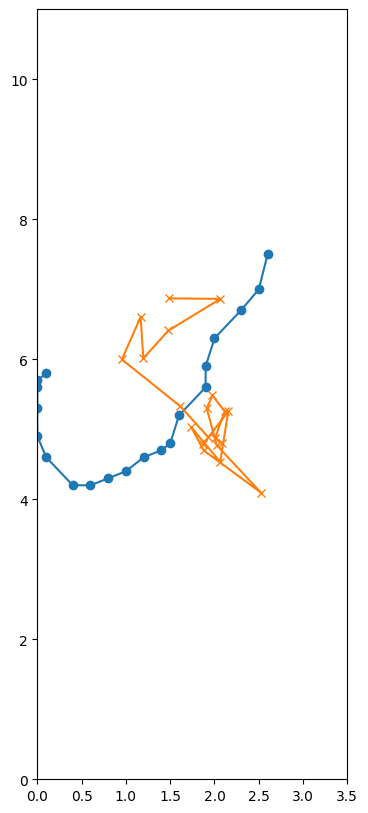

tensor([[0.0000, 0.0000, 0.0000,  ..., 5.0000, 0.0000, 5.0000],
        [0.0000, 0.0000, 0.0000,  ..., 6.3000, 2.3000, 6.7000],
        [0.0000, 0.0000, 0.0000,  ..., 9.1000, 2.9000, 9.2000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 3.2000, 1.4000, 3.3000],
        [0.0000, 0.0000, 0.0000,  ..., 4.5000, 0.9000, 4.0000],
        [0.0000, 0.0000, 0.0000,  ..., 1.5000, 2.8000, 2.0000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.1000, 7.1000, 0.2000, 6.9000, 0.5000,
         6.8000, 0.7000, 6.8000, 0.9000, 6.9000, 1.0000, 7.0000, 1.4000, 7.2000,
         1.7000, 7.5000, 1.9000, 7.6000, 2.1000, 7.6000, 2.6000, 7.7000, 2.9000,
         8.0000, 2.9000, 8.1000, 2.9000, 8.4000, 2.9000, 8.7000, 2.8000, 9.0000,
         2.8000, 9.1000, 2.9000, 9.2000]], device='cuda:0')
2
2 0.018654538318514824


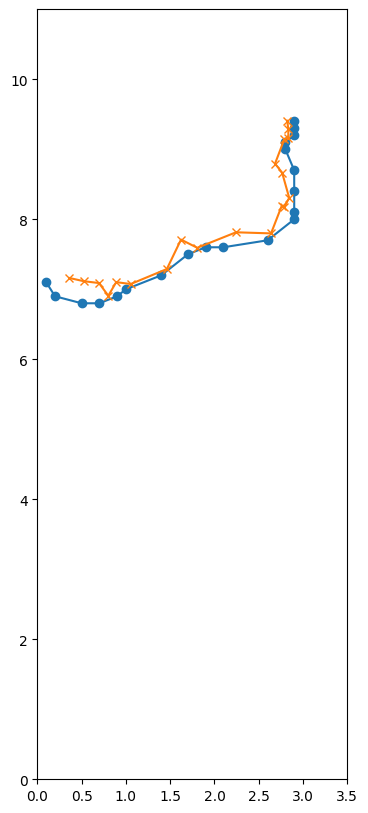

tensor([[0.0000, 0.0000, 0.0000,  ..., 5.0000, 0.0000, 5.0000],
        [0.0000, 0.0000, 0.0000,  ..., 6.3000, 2.3000, 6.7000],
        [0.0000, 0.0000, 0.0000,  ..., 9.1000, 2.9000, 9.2000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 3.2000, 1.4000, 3.3000],
        [0.0000, 0.0000, 0.0000,  ..., 4.5000, 0.9000, 4.0000],
        [0.0000, 0.0000, 0.0000,  ..., 1.5000, 2.8000, 2.0000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.2000, 7.1000, 1.9000, 6.9000, 1.4000,
         6.8000, 1.1000, 6.9000, 0.6000, 7.0000, 0.1000, 7.2000, 0.0000, 7.2000,
         0.0000, 6.9000, 0.4000, 6.5000, 0.5000, 6.2000, 0.7000, 5.7000, 0.6000,
         5.4000, 0.8000, 4.9000, 0.9000, 4.4000, 1.0000, 4.0000, 1.0000, 3.7000,
         0.8000, 3.5000, 0.8000, 3.4000]], device='cuda:0')
3
3 1.4971057176589966


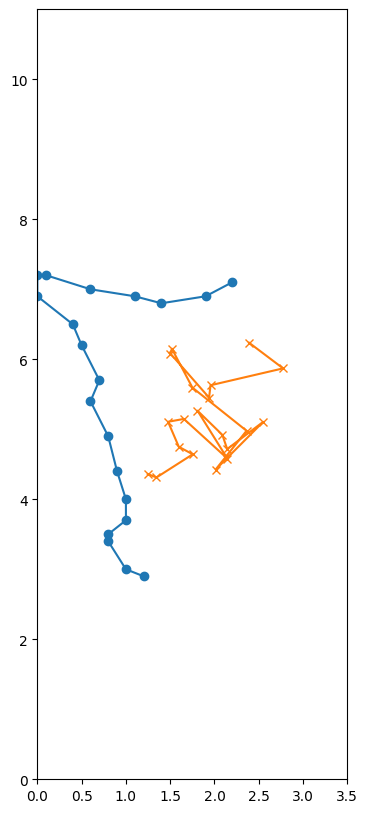

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 4.9000, 1.3000, 4.9000],
        [0.0000, 0.0000, 0.0000,  ..., 1.1000, 0.4000, 1.3000],
        [0.0000, 0.0000, 0.0000,  ..., 0.4000, 1.5000, 0.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 0.5000, 9.9000],
        [0.0000, 0.0000, 0.0000,  ..., 4.5000, 0.0000, 4.2000],
        [0.0000, 0.0000, 0.0000,  ..., 6.9000, 2.9000, 6.6000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.7000, 1.9000, 0.6000, 1.9000, 0.5000,
         2.0000, 0.5000, 2.1000, 0.5000, 2.3000, 0.5000, 2.7000, 0.1000, 3.1000,
         0.0000, 3.5000, 0.0000, 3.8000, 0.2000, 4.1000, 0.3000, 4.4000, 0.3000,
         4.6000, 0.4000, 4.9000, 0.4000, 5.0000, 0.5000, 5.1000, 0.9000, 5.1000,
         1.2000, 4.9000, 1.3000, 4.9000]], device='cuda:0')
0
0 3.5974342823028564


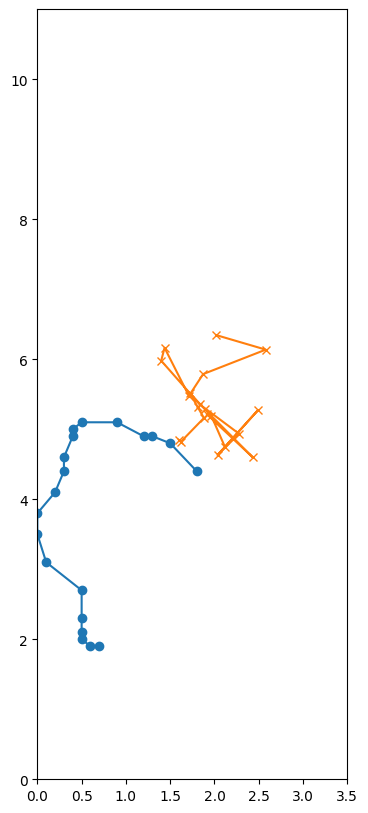

tensor([[0.0000, 0.0000, 0.0000,  ..., 4.9000, 1.3000, 4.9000],
        [0.0000, 0.0000, 0.0000,  ..., 1.1000, 0.4000, 1.3000],
        [0.0000, 0.0000, 0.0000,  ..., 0.4000, 1.5000, 0.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 0.5000, 9.9000],
        [0.0000, 0.0000, 0.0000,  ..., 4.5000, 0.0000, 4.2000],
        [0.0000, 0.0000, 0.0000,  ..., 6.9000, 2.9000, 6.6000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.5000, 2.5000, 0.8000, 2.1000, 1.0000,
         1.7000, 1.0000, 1.6000, 1.1000, 1.5000, 1.3000, 1.4000, 1.3000, 1.3000,
         1.1000, 0.9000, 1.0000, 0.7000, 0.9000, 0.4000, 0.7000, 0.0000, 0.4000,
         0.0000, 0.0000, 0.2000, 0.0000, 0.3000, 0.2000, 0.5000, 0.3000, 0.8000,
         0.4000, 1.1000, 0.4000, 1.3000]], device='cuda:0')
1
1 9.783151626586914


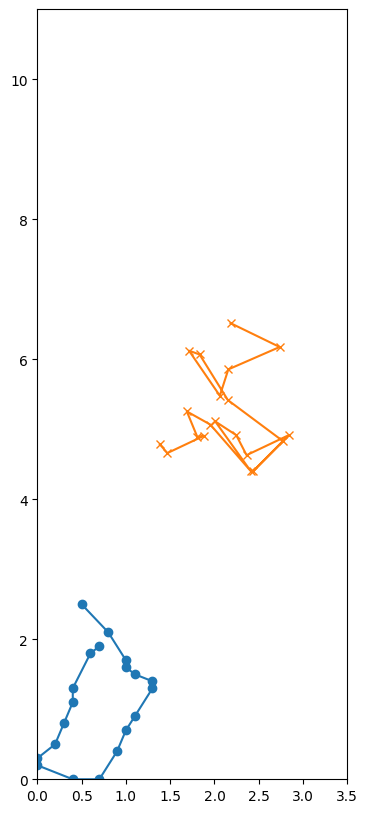

tensor([[0.0000, 0.0000, 0.0000,  ..., 4.9000, 1.3000, 4.9000],
        [0.0000, 0.0000, 0.0000,  ..., 1.1000, 0.4000, 1.3000],
        [0.0000, 0.0000, 0.0000,  ..., 0.4000, 1.5000, 0.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 0.5000, 9.9000],
        [0.0000, 0.0000, 0.0000,  ..., 4.5000, 0.0000, 4.2000],
        [0.0000, 0.0000, 0.0000,  ..., 6.9000, 2.9000, 6.6000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.6000, 4.4000, 0.4000, 3.9000, 0.4000,
         3.6000, 0.3000, 3.2000, 0.3000, 3.1000, 0.0000, 2.7000, 0.0000, 2.3000,
         0.1000, 2.1000, 0.1000, 2.0000, 0.1000, 1.8000, 0.0000, 1.7000, 0.0000,
         1.6000, 0.0000, 1.1000, 0.1000, 0.9000, 0.4000, 0.5000, 0.8000, 0.4000,
         1.0000, 0.4000, 1.5000, 0.3000]], device='cuda:0')
2
2 7.591960430145264


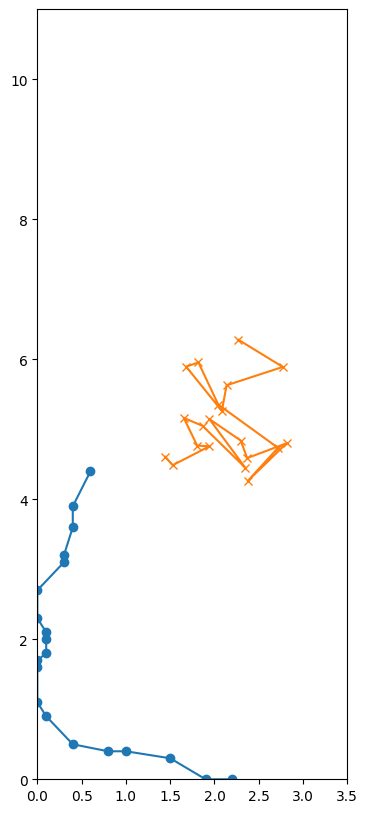

tensor([[0.0000, 0.0000, 0.0000,  ..., 4.9000, 1.3000, 4.9000],
        [0.0000, 0.0000, 0.0000,  ..., 1.1000, 0.4000, 1.3000],
        [0.0000, 0.0000, 0.0000,  ..., 0.4000, 1.5000, 0.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 0.5000, 9.9000],
        [0.0000, 0.0000, 0.0000,  ..., 4.5000, 0.0000, 4.2000],
        [0.0000, 0.0000, 0.0000,  ..., 6.9000, 2.9000, 6.6000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.3000, 6.5000, 1.5000, 6.7000, 1.5000,
         6.8000, 1.5000, 7.0000, 1.5000, 7.5000, 1.4000, 7.6000, 1.4000, 7.7000,
         1.4000, 7.8000, 1.4000, 7.9000, 1.4000, 8.1000, 1.2000, 8.4000, 1.2000,
         8.5000, 1.3000, 8.6000, 1.3000, 8.7000, 1.3000, 8.8000, 1.4000, 9.3000,
         1.4000, 9.4000, 1.5000, 9.8000]], device='cuda:0')
3
3 0.014983022585511208


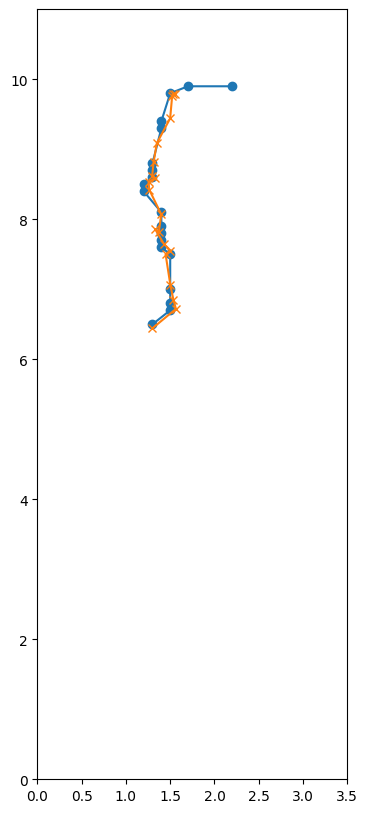

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 6.4000, 1.3000, 6.6000],
        [0.0000, 0.0000, 0.0000,  ..., 8.4000, 1.3000, 8.7000],
        [0.0000, 0.0000, 0.0000,  ..., 8.5000, 0.6000, 8.2000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 8.6000, 0.0000, 8.9000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.8000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 3.0000, 2.5000, 3.2000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.6000, 6.2000, 1.4000, 6.7000, 1.3000,
         7.0000, 1.0000, 7.2000, 0.9000, 7.2000, 0.6000, 7.1000, 0.2000, 7.2000,
         0.0000, 7.3000, 0.0000, 7.2000, 0.0000, 7.1000, 0.0000, 6.8000, 0.0000,
         6.6000, 0.1000, 6.5000, 0.4000, 6.4000, 0.5000, 6.4000, 0.8000, 6.4000,
         1.0000, 6.4000, 1.3000, 6.6000]], device='cuda:0')
0
0 0.5236701965332031


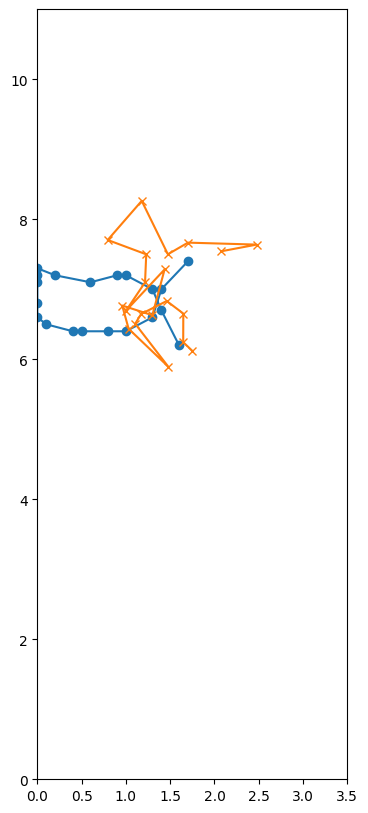

tensor([[0.0000, 0.0000, 0.0000,  ..., 6.4000, 1.3000, 6.6000],
        [0.0000, 0.0000, 0.0000,  ..., 8.4000, 1.3000, 8.7000],
        [0.0000, 0.0000, 0.0000,  ..., 8.5000, 0.6000, 8.2000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 8.6000, 0.0000, 8.9000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.8000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 3.0000, 2.5000, 3.2000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.0000, 6.6000, 1.8000, 6.4000, 1.6000,
         6.3000, 1.2000, 6.3000, 0.9000, 6.4000, 0.6000, 6.5000, 0.3000, 6.4000,
         0.1000, 6.5000, 0.0000, 6.5000, 0.0000, 6.6000, 0.1000, 6.9000, 0.3000,
         7.4000, 0.7000, 7.7000, 1.0000, 7.8000, 1.3000, 7.9000, 1.4000, 8.0000,
         1.5000, 8.4000, 1.3000, 8.7000]], device='cuda:0')
1
1 0.24977226555347443


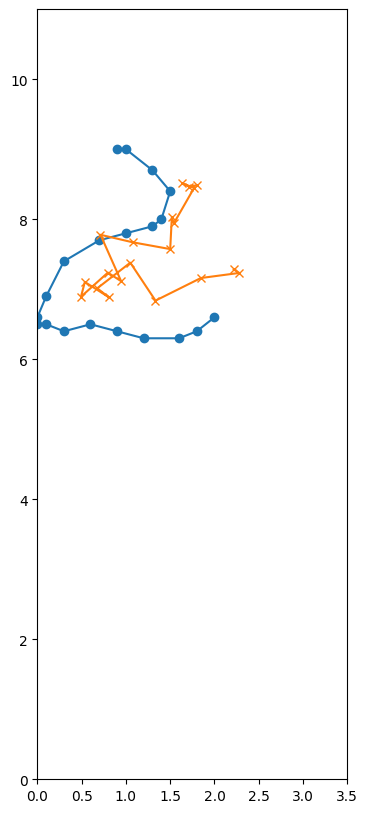

tensor([[0.0000, 0.0000, 0.0000,  ..., 6.4000, 1.3000, 6.6000],
        [0.0000, 0.0000, 0.0000,  ..., 8.4000, 1.3000, 8.7000],
        [0.0000, 0.0000, 0.0000,  ..., 8.5000, 0.6000, 8.2000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 8.6000, 0.0000, 8.9000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.8000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 3.0000, 2.5000, 3.2000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.0000, 8.3000, 1.8000, 8.3000, 1.4000,
         8.6000, 1.2000, 8.8000, 1.2000, 8.9000, 1.0000, 9.2000, 1.0000, 9.3000,
         1.1000, 9.4000, 1.1000, 9.7000, 1.0000, 9.9000, 0.7000, 9.9000, 0.2000,
         9.8000, 0.1000, 9.7000, 0.1000, 9.5000, 0.3000, 9.0000, 0.3000, 8.9000,
         0.3000, 8.5000, 0.6000, 8.2000]], device='cuda:0')
2
2 0.029667256399989128


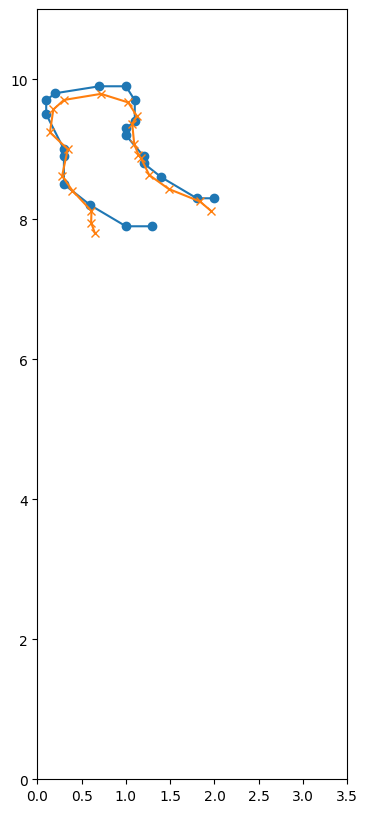

tensor([[0.0000, 0.0000, 0.0000,  ..., 6.4000, 1.3000, 6.6000],
        [0.0000, 0.0000, 0.0000,  ..., 8.4000, 1.3000, 8.7000],
        [0.0000, 0.0000, 0.0000,  ..., 8.5000, 0.6000, 8.2000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 8.6000, 0.0000, 8.9000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.8000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 3.0000, 2.5000, 3.2000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.3000, 6.8000, 0.4000, 6.6000, 0.6000,
         6.3000, 0.7000, 6.3000, 0.8000, 6.3000, 0.9000, 6.4000, 0.9000, 6.7000,
         0.7000, 7.0000, 0.7000, 7.1000, 0.9000, 7.5000, 0.9000, 8.0000, 1.0000,
         8.5000, 0.9000, 9.0000, 0.7000, 9.3000, 0.7000, 9.7000, 0.7000, 9.9000,
         0.6000, 9.9000, 0.3000, 9.9000]], device='cuda:0')
3
3 0.01433613896369934


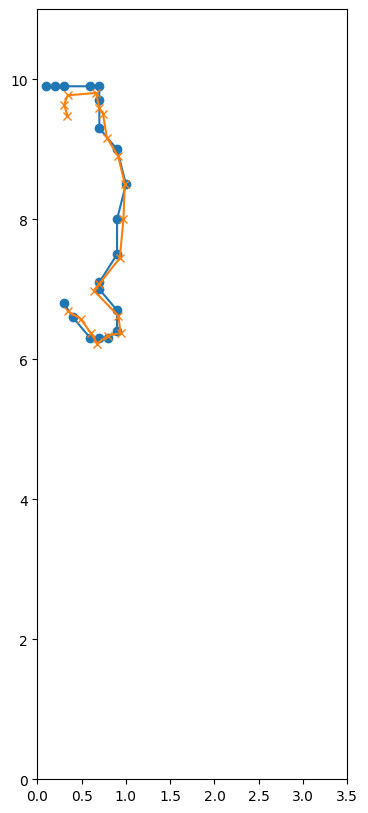

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 8.5000, 2.7000, 8.0000],
        [0.0000, 0.0000, 0.0000,  ..., 8.8000, 2.7000, 9.2000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 2.9000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 5.7000, 0.7000, 5.8000],
        [0.0000, 0.0000, 0.0000,  ..., 0.2000, 0.3000, 0.6000],
        [0.0000, 0.0000, 0.0000,  ..., 1.2000, 2.9000, 1.3000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.7000, 7.6000, 0.7000, 7.7000, 0.7000,
         8.2000, 0.6000, 8.5000, 0.7000, 8.8000, 0.9000, 9.2000, 1.3000, 9.3000,
         1.4000, 9.4000, 1.4000, 9.6000, 1.5000, 9.8000, 1.9000, 9.9000, 2.4000,
         9.8000, 2.8000, 9.6000, 2.9000, 9.2000, 2.9000, 8.9000, 2.9000, 8.8000,
         2.9000, 8.5000, 2.7000, 8.0000]], device='cuda:0')
0
0 0.045803796499967575


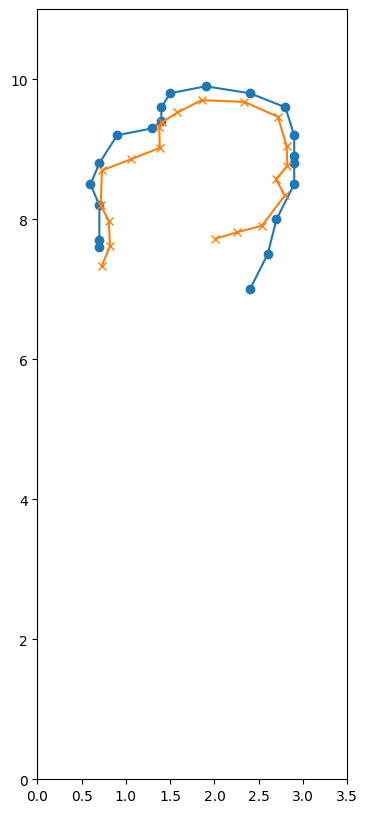

tensor([[0.0000, 0.0000, 0.0000,  ..., 8.5000, 2.7000, 8.0000],
        [0.0000, 0.0000, 0.0000,  ..., 8.8000, 2.7000, 9.2000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 2.9000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 5.7000, 0.7000, 5.8000],
        [0.0000, 0.0000, 0.0000,  ..., 0.2000, 0.3000, 0.6000],
        [0.0000, 0.0000, 0.0000,  ..., 1.2000, 2.9000, 1.3000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.2000, 6.1000, 1.2000, 6.5000, 1.2000,
         6.7000, 1.3000, 6.8000, 1.4000, 7.0000, 1.4000, 7.4000, 1.5000, 7.5000,
         1.7000, 7.5000, 2.1000, 7.3000, 2.3000, 6.9000, 2.4000, 6.9000, 2.9000,
         7.0000, 2.9000, 7.3000, 2.9000, 7.7000, 2.9000, 8.1000, 2.9000, 8.4000,
         2.9000, 8.8000, 2.7000, 9.2000]], device='cuda:0')
1
1 0.12026424705982208


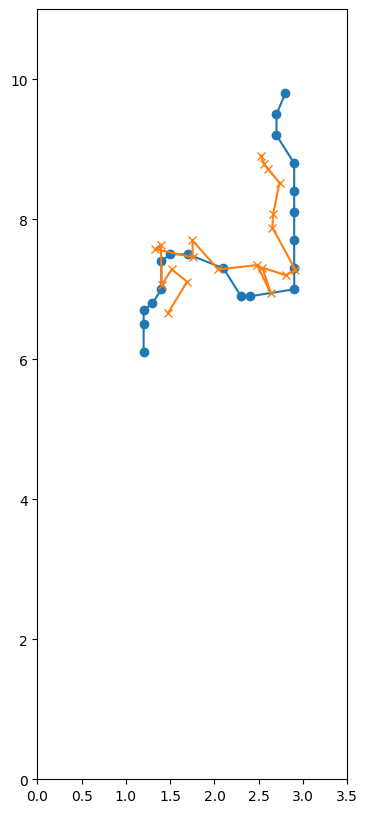

tensor([[0.0000, 0.0000, 0.0000,  ..., 8.5000, 2.7000, 8.0000],
        [0.0000, 0.0000, 0.0000,  ..., 8.8000, 2.7000, 9.2000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 2.9000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 5.7000, 0.7000, 5.8000],
        [0.0000, 0.0000, 0.0000,  ..., 0.2000, 0.3000, 0.6000],
        [0.0000, 0.0000, 0.0000,  ..., 1.2000, 2.9000, 1.3000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.3000, 0.0000, 0.2000, 0.4000, 0.4000,
         0.9000, 0.4000, 1.1000, 0.4000, 1.2000, 0.7000, 1.6000, 1.0000, 1.7000,
         1.3000, 1.6000, 1.5000, 1.5000, 1.9000, 1.5000, 2.1000, 1.4000, 2.4000,
         1.1000, 2.8000, 0.7000, 2.9000, 0.5000, 2.9000, 0.3000, 2.7000, 0.0000,
         2.8000, 0.0000, 2.9000, 0.0000]], device='cuda:0')
2
2 10.64561939239502


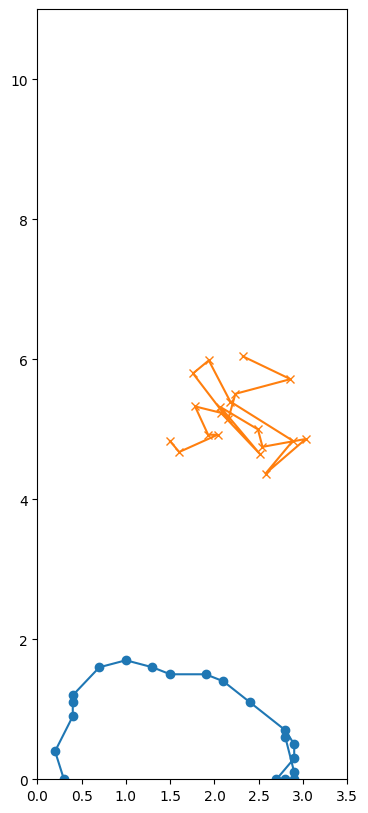

tensor([[0.0000, 0.0000, 0.0000,  ..., 8.5000, 2.7000, 8.0000],
        [0.0000, 0.0000, 0.0000,  ..., 8.8000, 2.7000, 9.2000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 2.9000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 5.7000, 0.7000, 5.8000],
        [0.0000, 0.0000, 0.0000,  ..., 0.2000, 0.3000, 0.6000],
        [0.0000, 0.0000, 0.0000,  ..., 1.2000, 2.9000, 1.3000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.7000, 2.1000, 2.9000, 2.0000, 2.9000,
         1.7000, 2.9000, 1.4000, 2.9000, 1.3000, 2.9000, 1.0000, 2.8000, 0.9000,
         2.5000, 0.5000, 2.2000, 0.4000, 1.8000, 0.6000, 1.6000, 0.7000, 1.5000,
         0.7000, 1.4000, 0.6000, 1.3000, 0.3000, 1.3000, 0.2000, 1.4000, 0.0000,
         1.5000, 0.0000, 1.9000, 0.0000]], device='cuda:0')
3
3 10.094679832458496


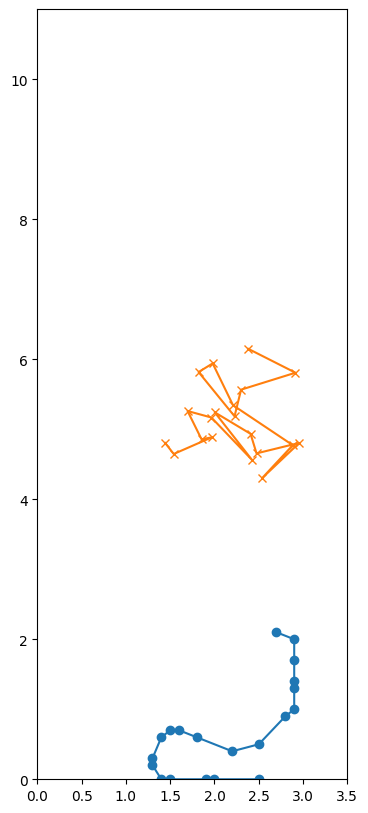

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.9000, 1.7000, 0.4000],
        [0.0000, 0.0000, 0.0000,  ..., 0.5000, 2.9000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 5.2000, 2.4000, 5.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.7000, 1.4000, 0.5000],
        [0.0000, 0.0000, 0.0000,  ..., 5.0000, 2.6000, 4.7000],
        [0.0000, 0.0000, 0.0000,  ..., 1.2000, 2.9000, 1.3000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 3.4000, 1.3000, 3.4000, 1.8000,
         3.2000, 2.1000, 2.8000, 2.4000, 2.7000, 2.7000, 2.4000, 2.8000, 2.4000,
         2.9000, 2.4000, 2.9000, 2.3000, 2.9000, 2.1000, 2.8000, 2.0000, 2.4000,
         1.8000, 2.3000, 1.8000, 1.8000, 1.8000, 1.5000, 1.6000, 1.4000, 1.3000,
         1.5000, 0.9000, 1.7000, 0.4000]], device='cuda:0')
0
0 5.370734691619873


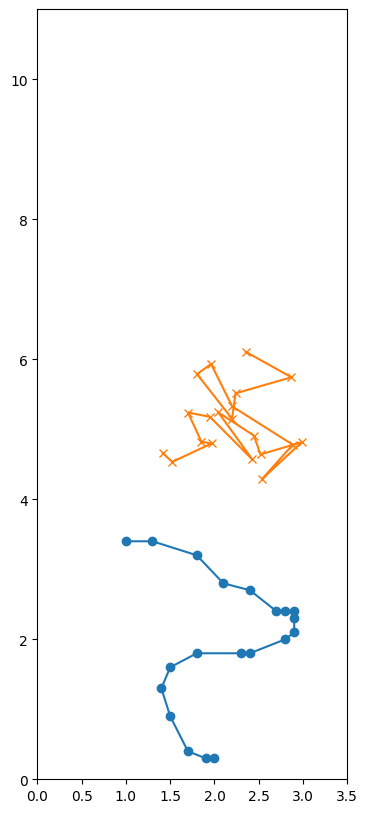

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.9000, 1.7000, 0.4000],
        [0.0000, 0.0000, 0.0000,  ..., 0.5000, 2.9000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 5.2000, 2.4000, 5.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.7000, 1.4000, 0.5000],
        [0.0000, 0.0000, 0.0000,  ..., 5.0000, 2.6000, 4.7000],
        [0.0000, 0.0000, 0.0000,  ..., 1.2000, 2.9000, 1.3000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.3000, 3.3000, 1.6000, 3.7000, 1.7000,
         3.7000, 1.8000, 3.7000, 2.1000, 3.8000, 2.2000, 3.8000, 2.7000, 3.7000,
         2.9000, 3.5000, 2.9000, 3.2000, 2.9000, 2.8000, 2.8000, 2.4000, 2.9000,
         1.9000, 2.9000, 1.8000, 2.9000, 1.4000, 2.9000, 1.1000, 2.9000, 0.7000,
         2.9000, 0.5000, 2.9000, 0.0000]], device='cuda:0')
1
1 5.090420722961426


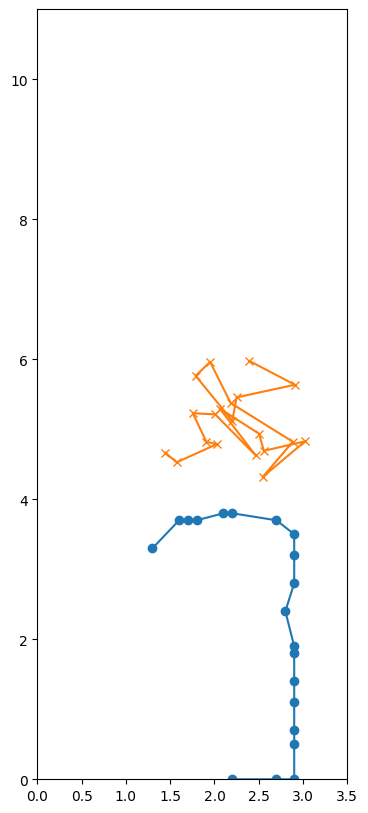

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.9000, 1.7000, 0.4000],
        [0.0000, 0.0000, 0.0000,  ..., 0.5000, 2.9000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 5.2000, 2.4000, 5.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.7000, 1.4000, 0.5000],
        [0.0000, 0.0000, 0.0000,  ..., 5.0000, 2.6000, 4.7000],
        [0.0000, 0.0000, 0.0000,  ..., 1.2000, 2.9000, 1.3000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.2000, 9.3000, 2.3000, 9.3000, 2.7000,
         9.2000, 2.9000, 8.9000, 2.9000, 8.5000, 2.9000, 8.3000, 2.9000, 7.9000,
         2.9000, 7.7000, 2.9000, 7.4000, 2.9000, 7.3000, 2.9000, 7.1000, 2.8000,
         6.9000, 2.6000, 6.6000, 2.6000, 6.1000, 2.6000, 5.6000, 2.5000, 5.5000,
         2.5000, 5.2000, 2.4000, 5.0000]], device='cuda:0')
2
2 1.2719208002090454


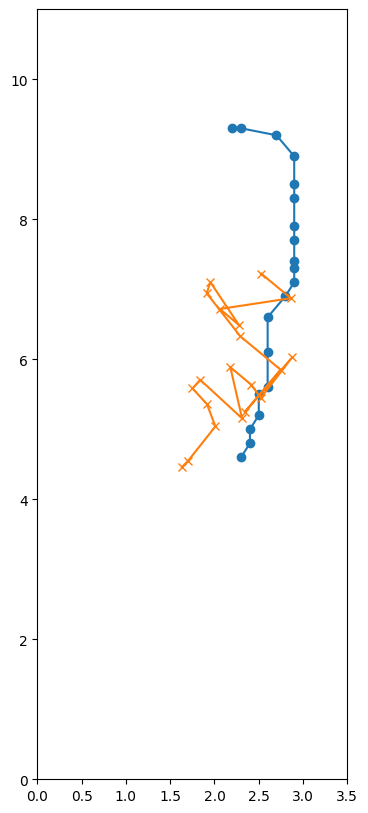

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.9000, 1.7000, 0.4000],
        [0.0000, 0.0000, 0.0000,  ..., 0.5000, 2.9000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 5.2000, 2.4000, 5.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.7000, 1.4000, 0.5000],
        [0.0000, 0.0000, 0.0000,  ..., 5.0000, 2.6000, 4.7000],
        [0.0000, 0.0000, 0.0000,  ..., 1.2000, 2.9000, 1.3000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.7000, 8.6000, 2.7000, 8.3000, 2.9000,
         8.1000, 2.9000, 7.7000, 2.9000, 7.6000, 2.9000, 7.3000, 2.7000, 6.8000,
         2.7000, 6.7000, 2.6000, 6.6000, 2.1000, 6.4000, 1.8000, 6.0000, 1.7000,
         5.8000, 1.7000, 5.4000, 1.7000, 5.2000, 1.8000, 4.9000, 1.6000, 4.4000,
         1.4000, 4.0000, 1.4000, 3.8000]], device='cuda:0')
3
3 1.1692743301391602


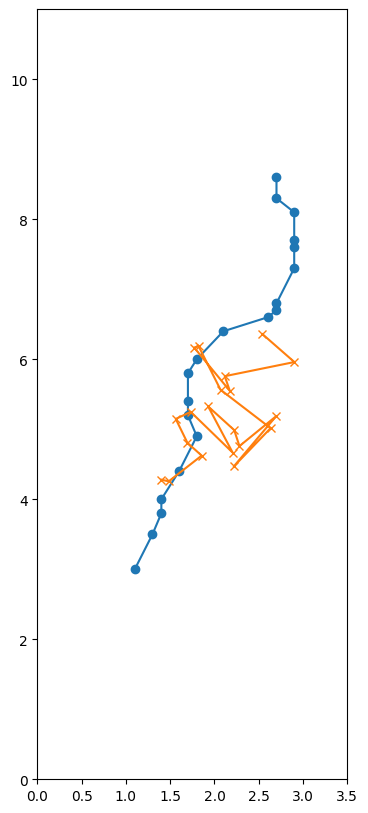

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 6.0000, 2.9000, 6.3000],
        [0.0000, 0.0000, 0.0000,  ..., 3.9000, 0.1000, 4.3000],
        [0.0000, 0.0000, 0.0000,  ..., 5.0000, 2.7000, 4.9000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.3000, 2.1000, 1.4000],
        [0.0000, 0.0000, 0.0000,  ..., 2.2000, 2.7000, 2.5000],
        [0.0000, 0.0000, 0.0000,  ..., 3.6000, 1.5000, 3.6000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.6000, 1.9000, 2.4000, 1.9000, 2.3000,
         2.0000, 2.2000, 2.2000, 2.3000, 2.7000, 2.2000, 2.9000, 2.2000, 3.2000,
         2.4000, 3.6000, 2.4000, 3.9000, 2.7000, 4.3000, 2.7000, 4.4000, 2.7000,
         4.5000, 2.7000, 4.6000, 2.9000, 5.0000, 2.9000, 5.4000, 2.9000, 5.9000,
         2.9000, 6.0000, 2.9000, 6.3000]], device='cuda:0')
0
0 2.3756797313690186


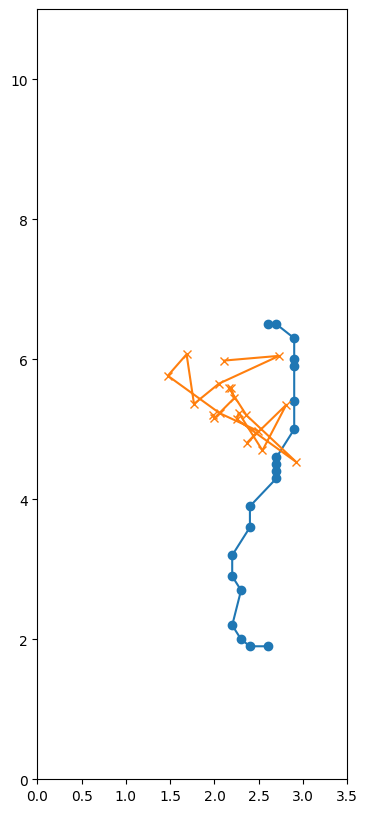

tensor([[0.0000, 0.0000, 0.0000,  ..., 6.0000, 2.9000, 6.3000],
        [0.0000, 0.0000, 0.0000,  ..., 3.9000, 0.1000, 4.3000],
        [0.0000, 0.0000, 0.0000,  ..., 5.0000, 2.7000, 4.9000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.3000, 2.1000, 1.4000],
        [0.0000, 0.0000, 0.0000,  ..., 2.2000, 2.7000, 2.5000],
        [0.0000, 0.0000, 0.0000,  ..., 3.6000, 1.5000, 3.6000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.2000, 0.2000, 0.2000, 0.4000, 0.3000,
         0.8000, 0.3000, 1.0000, 0.2000, 1.3000, 0.2000, 1.4000, 0.2000, 1.5000,
         0.0000, 1.8000, 0.0000, 2.0000, 0.3000, 2.4000, 0.7000, 2.7000, 0.7000,
         2.9000, 0.6000, 3.0000, 0.6000, 3.1000, 0.4000, 3.5000, 0.3000, 3.7000,
         0.1000, 3.9000, 0.1000, 4.3000]], device='cuda:0')
1
1 6.53875207901001


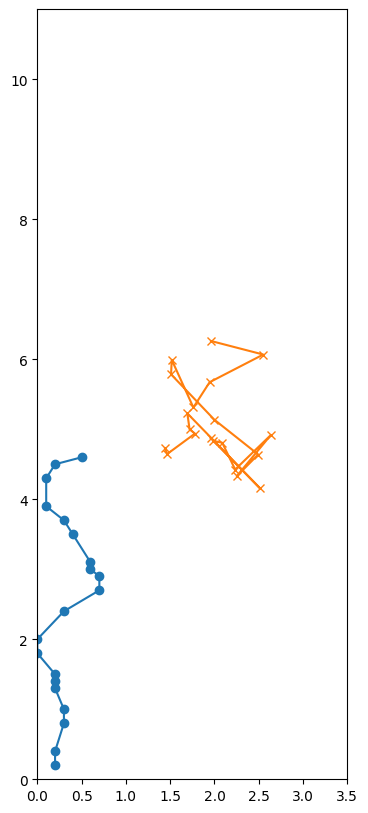

tensor([[0.0000, 0.0000, 0.0000,  ..., 6.0000, 2.9000, 6.3000],
        [0.0000, 0.0000, 0.0000,  ..., 3.9000, 0.1000, 4.3000],
        [0.0000, 0.0000, 0.0000,  ..., 5.0000, 2.7000, 4.9000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.3000, 2.1000, 1.4000],
        [0.0000, 0.0000, 0.0000,  ..., 2.2000, 2.7000, 2.5000],
        [0.0000, 0.0000, 0.0000,  ..., 3.6000, 1.5000, 3.6000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.3000, 8.6000, 1.3000, 8.3000, 1.3000,
         8.2000, 1.3000, 8.1000, 1.3000, 7.9000, 1.4000, 7.4000, 1.6000, 7.2000,
         1.8000, 7.0000, 2.1000, 6.9000, 2.6000, 6.9000, 2.8000, 6.7000, 2.9000,
         6.4000, 2.9000, 6.3000, 2.9000, 6.0000, 2.9000, 5.7000, 2.9000, 5.2000,
         2.8000, 5.0000, 2.7000, 4.9000]], device='cuda:0')
2
2 1.039965271949768


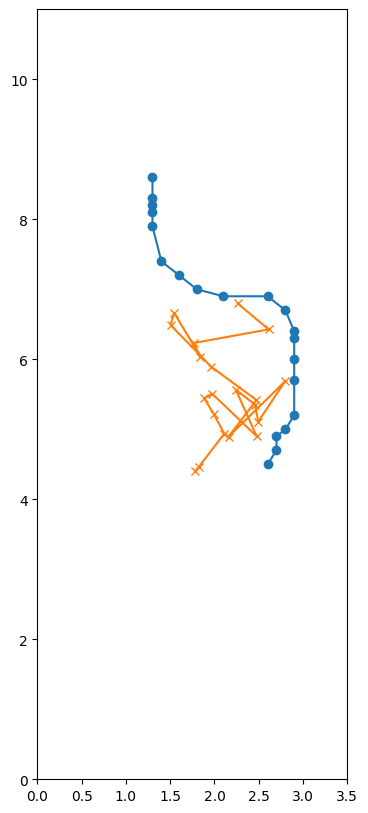

tensor([[0.0000, 0.0000, 0.0000,  ..., 6.0000, 2.9000, 6.3000],
        [0.0000, 0.0000, 0.0000,  ..., 3.9000, 0.1000, 4.3000],
        [0.0000, 0.0000, 0.0000,  ..., 5.0000, 2.7000, 4.9000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.3000, 2.1000, 1.4000],
        [0.0000, 0.0000, 0.0000,  ..., 2.2000, 2.7000, 2.5000],
        [0.0000, 0.0000, 0.0000,  ..., 3.6000, 1.5000, 3.6000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.6000, 8.0000, 0.9000, 7.6000, 1.1000,
         7.4000, 1.1000, 7.3000, 1.2000, 6.8000, 1.2000, 6.5000, 1.1000, 6.0000,
         1.4000, 5.6000, 1.5000, 5.4000, 1.8000, 5.0000, 1.9000, 4.9000, 2.1000,
         4.9000, 2.3000, 4.9000, 2.8000, 4.9000, 2.9000, 4.9000, 2.9000, 4.8000,
         2.9000, 4.7000, 2.6000, 4.4000]], device='cuda:0')
3
3 0.5672584772109985


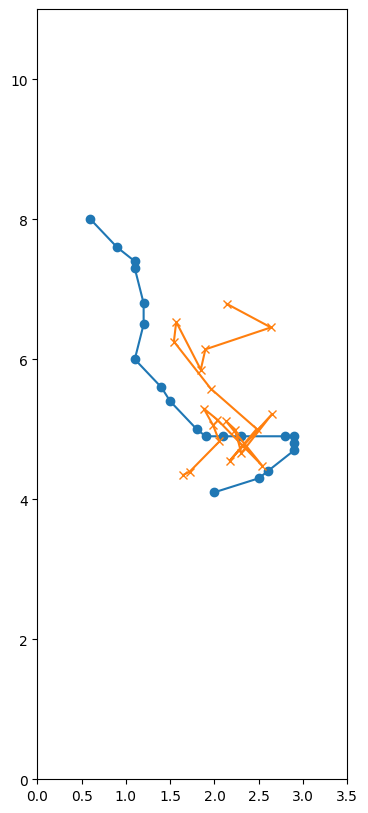

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 8.3000, 0.4000, 8.0000],
        [0.0000, 0.0000, 0.0000,  ..., 7.1000, 2.9000, 7.0000],
        [0.0000, 0.0000, 0.0000,  ..., 5.9000, 2.6000, 6.2000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 9.4000, 0.1000, 9.4000],
        [0.0000, 0.0000, 0.0000,  ..., 2.2000, 0.0000, 2.6000],
        [0.0000, 0.0000, 0.0000,  ..., 9.0000, 0.0000, 9.1000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.8000, 4.3000, 2.9000, 4.6000, 2.9000,
         5.0000, 2.9000, 5.2000, 2.9000, 5.6000, 2.9000, 6.0000, 2.9000, 6.5000,
         2.8000, 6.8000, 2.6000, 7.1000, 2.6000, 7.5000, 2.3000, 7.9000, 1.9000,
         8.1000, 1.8000, 8.2000, 1.5000, 8.3000, 1.2000, 8.5000, 0.8000, 8.5000,
         0.5000, 8.3000, 0.4000, 8.0000]], device='cuda:0')
0
0 0.13287465274333954


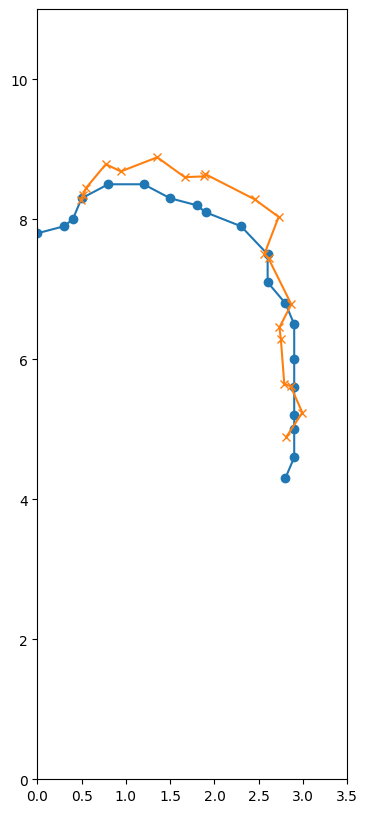

tensor([[0.0000, 0.0000, 0.0000,  ..., 8.3000, 0.4000, 8.0000],
        [0.0000, 0.0000, 0.0000,  ..., 7.1000, 2.9000, 7.0000],
        [0.0000, 0.0000, 0.0000,  ..., 5.9000, 2.6000, 6.2000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 9.4000, 0.1000, 9.4000],
        [0.0000, 0.0000, 0.0000,  ..., 2.2000, 0.0000, 2.6000],
        [0.0000, 0.0000, 0.0000,  ..., 9.0000, 0.0000, 9.1000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 6.0000, 0.9000, 6.1000, 0.6000,
         6.5000, 0.5000, 6.8000, 0.7000, 7.3000, 0.7000, 7.4000, 0.8000, 7.6000,
         1.3000, 7.8000, 1.6000, 8.0000, 2.0000, 8.3000, 2.4000, 8.3000, 2.7000,
         8.3000, 2.8000, 8.3000, 2.9000, 8.2000, 2.9000, 7.7000, 2.8000, 7.3000,
         2.9000, 7.1000, 2.9000, 7.0000]], device='cuda:0')
1
1 0.162912055850029


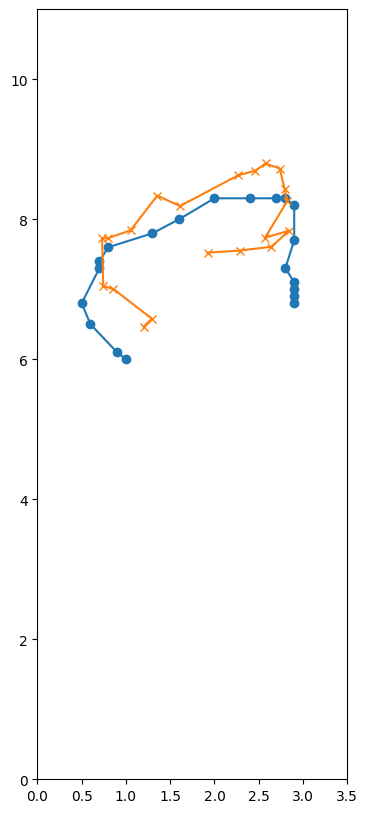

tensor([[0.0000, 0.0000, 0.0000,  ..., 8.3000, 0.4000, 8.0000],
        [0.0000, 0.0000, 0.0000,  ..., 7.1000, 2.9000, 7.0000],
        [0.0000, 0.0000, 0.0000,  ..., 5.9000, 2.6000, 6.2000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 9.4000, 0.1000, 9.4000],
        [0.0000, 0.0000, 0.0000,  ..., 2.2000, 0.0000, 2.6000],
        [0.0000, 0.0000, 0.0000,  ..., 9.0000, 0.0000, 9.1000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.4000, 3.5000, 1.5000, 3.5000, 1.8000,
         3.4000, 2.3000, 3.6000, 2.5000, 3.5000, 2.6000, 3.5000, 2.9000, 3.5000,
         2.9000, 3.8000, 2.9000, 3.9000, 2.8000, 4.2000, 2.8000, 4.4000, 2.8000,
         4.6000, 2.6000, 5.0000, 2.5000, 5.3000, 2.6000, 5.6000, 2.6000, 5.8000,
         2.6000, 5.9000, 2.6000, 6.2000]], device='cuda:0')
2
2 1.5031110048294067


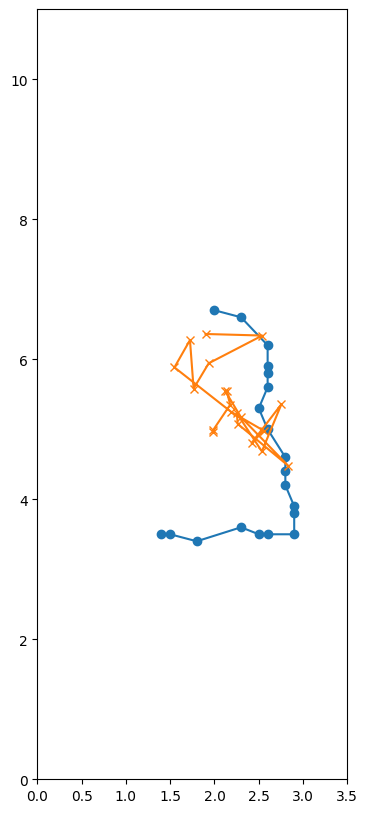

tensor([[0.0000, 0.0000, 0.0000,  ..., 8.3000, 0.4000, 8.0000],
        [0.0000, 0.0000, 0.0000,  ..., 7.1000, 2.9000, 7.0000],
        [0.0000, 0.0000, 0.0000,  ..., 5.9000, 2.6000, 6.2000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 9.4000, 0.1000, 9.4000],
        [0.0000, 0.0000, 0.0000,  ..., 2.2000, 0.0000, 2.6000],
        [0.0000, 0.0000, 0.0000,  ..., 9.0000, 0.0000, 9.1000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 9.4000, 0.9000, 9.1000, 1.0000,
         8.9000, 0.9000, 8.4000, 1.0000, 8.2000, 1.1000, 7.7000, 1.2000, 7.4000,
         1.2000, 7.3000, 1.3000, 7.1000, 1.2000, 6.6000, 1.1000, 6.4000, 0.7000,
         6.1000, 0.5000, 6.0000, 0.2000, 6.0000, 0.1000, 6.0000, 0.0000, 6.2000,
         0.1000, 6.6000, 0.2000, 6.9000]], device='cuda:0')
3
3 0.3095545768737793


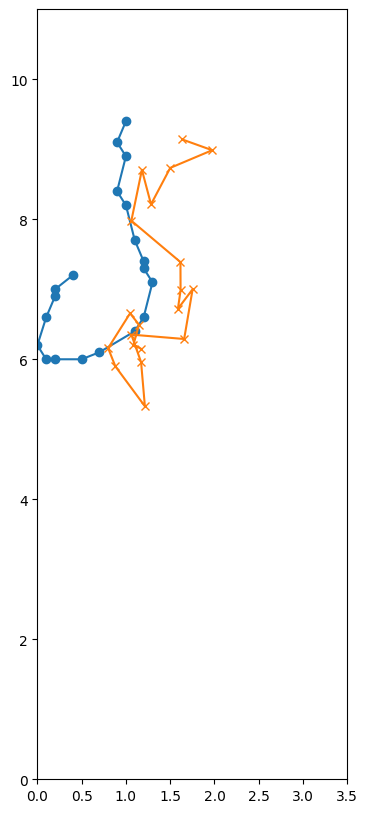

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 6.7000, 2.0000, 6.9000],
        [0.0000, 0.0000, 0.0000,  ..., 7.9000, 2.7000, 7.7000],
        [0.0000, 0.0000, 0.0000,  ..., 9.7000, 1.7000, 9.9000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 2.6000, 2.7000, 2.5000],
        [0.0000, 0.0000, 0.0000,  ..., 6.2000, 0.7000, 6.2000],
        [0.0000, 0.0000, 0.0000,  ..., 4.2000, 0.1000, 3.9000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.0000, 4.0000, 2.1000, 4.0000, 2.3000,
         4.2000, 2.5000, 4.2000, 2.7000, 4.0000, 2.8000, 4.0000, 2.9000, 4.3000,
         2.9000, 4.6000, 2.8000, 4.9000, 2.9000, 5.2000, 2.8000, 5.7000, 2.8000,
         5.9000, 2.7000, 6.0000, 2.6000, 6.1000, 2.5000, 6.2000, 2.2000, 6.6000,
         2.1000, 6.7000, 2.0000, 6.9000]], device='cuda:0')
0
0 0.9446555376052856


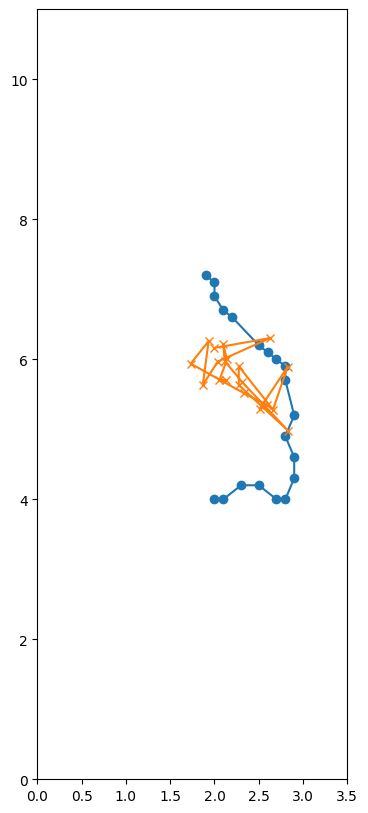

tensor([[0.0000, 0.0000, 0.0000,  ..., 6.7000, 2.0000, 6.9000],
        [0.0000, 0.0000, 0.0000,  ..., 7.9000, 2.7000, 7.7000],
        [0.0000, 0.0000, 0.0000,  ..., 9.7000, 1.7000, 9.9000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 2.6000, 2.7000, 2.5000],
        [0.0000, 0.0000, 0.0000,  ..., 6.2000, 0.7000, 6.2000],
        [0.0000, 0.0000, 0.0000,  ..., 4.2000, 0.1000, 3.9000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.5000, 6.6000, 0.3000, 7.0000, 0.2000,
         7.2000, 0.3000, 7.6000, 0.6000, 7.9000, 0.7000, 8.0000, 1.1000, 8.3000,
         1.4000, 8.3000, 1.7000, 8.5000, 1.8000, 8.7000, 1.9000, 8.7000, 2.3000,
         8.4000, 2.4000, 8.4000, 2.8000, 8.5000, 2.9000, 8.4000, 2.9000, 8.3000,
         2.9000, 7.9000, 2.7000, 7.7000]], device='cuda:0')
1
1 0.04831130802631378


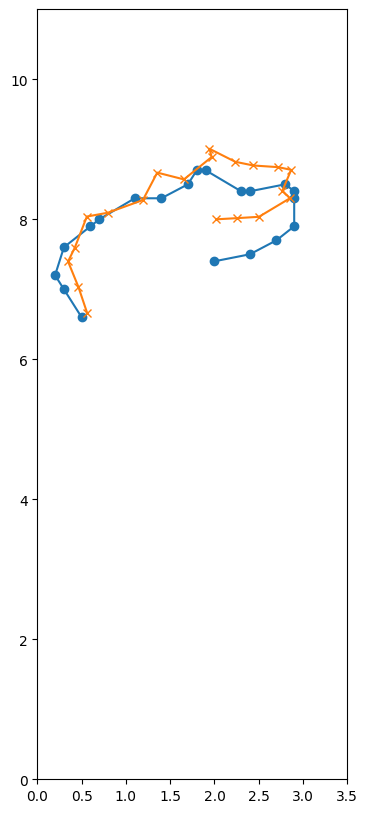

tensor([[0.0000, 0.0000, 0.0000,  ..., 6.7000, 2.0000, 6.9000],
        [0.0000, 0.0000, 0.0000,  ..., 7.9000, 2.7000, 7.7000],
        [0.0000, 0.0000, 0.0000,  ..., 9.7000, 1.7000, 9.9000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 2.6000, 2.7000, 2.5000],
        [0.0000, 0.0000, 0.0000,  ..., 6.2000, 0.7000, 6.2000],
        [0.0000, 0.0000, 0.0000,  ..., 4.2000, 0.1000, 3.9000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.4000, 6.5000, 0.5000, 7.0000, 0.8000,
         7.4000, 0.9000, 7.5000, 1.0000, 7.6000, 1.2000, 7.7000, 1.3000, 7.7000,
         1.8000, 7.8000, 2.1000, 7.7000, 2.6000, 7.8000, 2.9000, 7.8000, 2.9000,
         8.0000, 2.9000, 8.4000, 2.7000, 8.7000, 2.5000, 9.1000, 2.2000, 9.5000,
         1.9000, 9.7000, 1.7000, 9.9000]], device='cuda:0')
2
2 0.024647751823067665


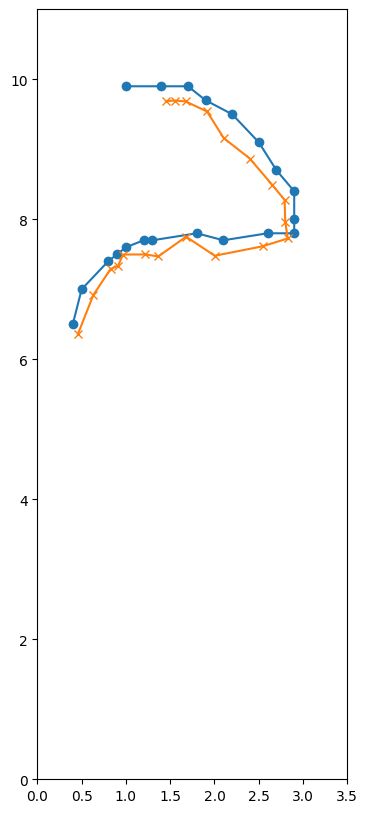

tensor([[0.0000, 0.0000, 0.0000,  ..., 6.7000, 2.0000, 6.9000],
        [0.0000, 0.0000, 0.0000,  ..., 7.9000, 2.7000, 7.7000],
        [0.0000, 0.0000, 0.0000,  ..., 9.7000, 1.7000, 9.9000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 2.6000, 2.7000, 2.5000],
        [0.0000, 0.0000, 0.0000,  ..., 6.2000, 0.7000, 6.2000],
        [0.0000, 0.0000, 0.0000,  ..., 4.2000, 0.1000, 3.9000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.2000, 5.5000, 1.2000, 5.4000, 1.2000,
         5.2000, 1.1000, 4.9000, 1.0000, 4.8000, 0.6000, 4.7000, 0.4000, 4.4000,
         0.1000, 4.1000, 0.0000, 4.0000, 0.0000, 3.9000, 0.1000, 3.4000, 0.1000,
         3.2000, 0.3000, 3.0000, 0.4000, 2.7000, 0.5000, 2.3000, 0.6000, 2.2000,
         0.8000, 2.0000, 1.0000, 1.9000]], device='cuda:0')
3
3 2.8249435424804688


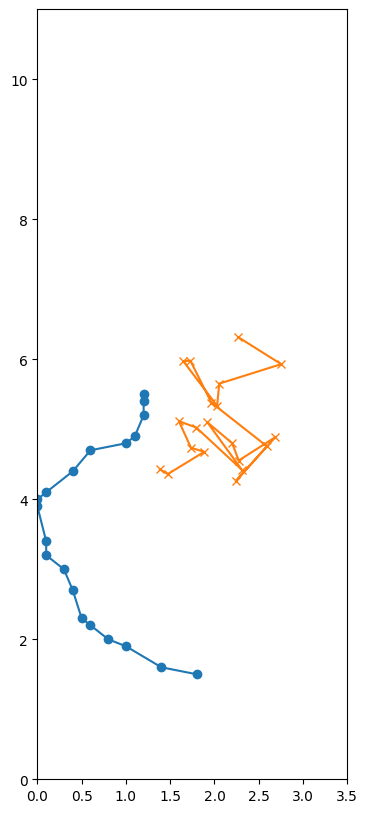

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.9000, 0.4000, 0.9000],
        [0.0000, 0.0000, 0.0000,  ..., 2.1000, 2.7000, 1.6000],
        [0.0000, 0.0000, 0.0000,  ..., 6.1000, 0.2000, 6.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.7000, 1.7000],
        [0.0000, 0.0000, 0.0000,  ..., 4.3000, 2.9000, 4.7000],
        [0.0000, 0.0000, 0.0000,  ..., 2.9000, 1.7000, 3.0000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.4000, 1.5000, 2.4000, 1.4000, 2.4000,
         1.3000, 2.4000, 1.2000, 2.2000, 0.7000, 2.1000, 0.3000, 2.2000, 0.0000,
         2.5000, 0.0000, 2.9000, 0.0000, 2.9000, 0.3000, 2.6000, 0.7000, 2.3000,
         0.9000, 2.0000, 0.9000, 1.7000, 1.0000, 1.6000, 1.0000, 1.1000, 0.8000,
         0.8000, 0.9000, 0.4000, 0.9000]], device='cuda:0')
0
0 9.379629135131836


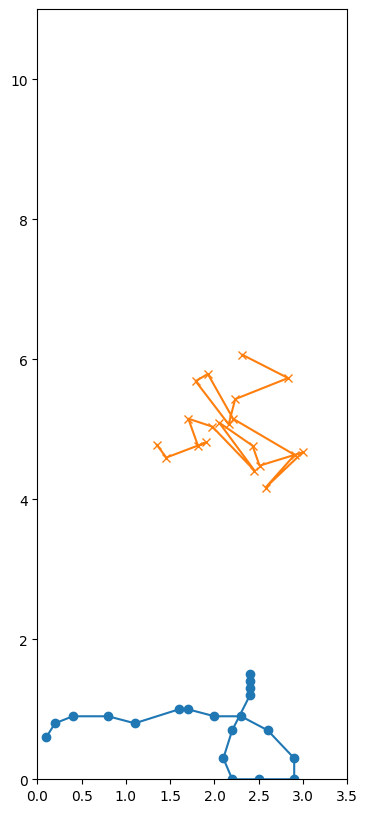

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.9000, 0.4000, 0.9000],
        [0.0000, 0.0000, 0.0000,  ..., 2.1000, 2.7000, 1.6000],
        [0.0000, 0.0000, 0.0000,  ..., 6.1000, 0.2000, 6.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.7000, 1.7000],
        [0.0000, 0.0000, 0.0000,  ..., 4.3000, 2.9000, 4.7000],
        [0.0000, 0.0000, 0.0000,  ..., 2.9000, 1.7000, 3.0000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.5000, 4.2000, 0.4000, 3.9000, 0.5000,
         3.7000, 0.9000, 3.5000, 1.0000, 3.5000, 1.2000, 3.6000, 1.7000, 3.5000,
         2.1000, 3.2000, 2.5000, 3.2000, 2.7000, 3.1000, 2.8000, 3.0000, 2.9000,
         3.0000, 2.9000, 2.9000, 2.8000, 2.6000, 2.9000, 2.3000, 2.9000, 2.2000,
         2.9000, 2.1000, 2.7000, 1.6000]], device='cuda:0')
1
1 2.9833486080169678


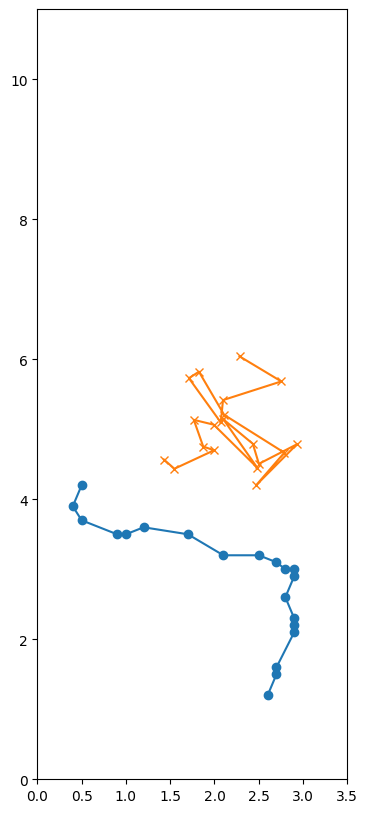

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.9000, 0.4000, 0.9000],
        [0.0000, 0.0000, 0.0000,  ..., 2.1000, 2.7000, 1.6000],
        [0.0000, 0.0000, 0.0000,  ..., 6.1000, 0.2000, 6.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.7000, 1.7000],
        [0.0000, 0.0000, 0.0000,  ..., 4.3000, 2.9000, 4.7000],
        [0.0000, 0.0000, 0.0000,  ..., 2.9000, 1.7000, 3.0000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.5000, 1.9000, 0.5000, 2.3000, 0.5000,
         2.4000, 0.5000, 2.9000, 0.5000, 3.0000, 0.5000, 3.1000, 0.4000, 3.3000,
         0.4000, 3.8000, 0.3000, 4.1000, 0.3000, 4.2000, 0.3000, 4.3000, 0.3000,
         4.4000, 0.3000, 4.9000, 0.3000, 5.0000, 0.3000, 5.5000, 0.2000, 5.8000,
         0.1000, 6.1000, 0.2000, 6.3000]], device='cuda:0')
2
2 3.6153972148895264


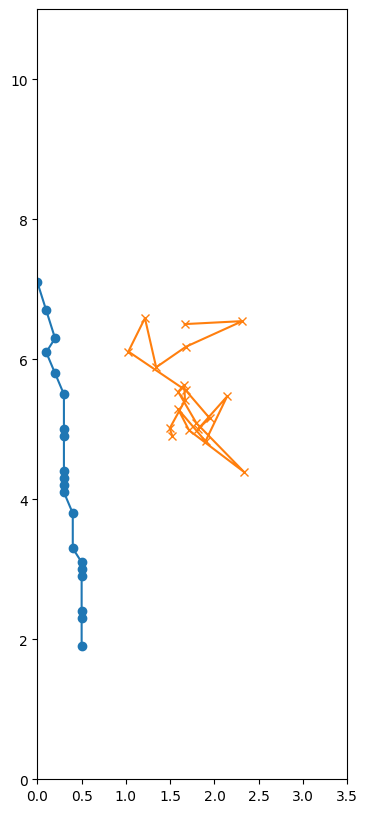

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.9000, 0.4000, 0.9000],
        [0.0000, 0.0000, 0.0000,  ..., 2.1000, 2.7000, 1.6000],
        [0.0000, 0.0000, 0.0000,  ..., 6.1000, 0.2000, 6.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.7000, 1.7000],
        [0.0000, 0.0000, 0.0000,  ..., 4.3000, 2.9000, 4.7000],
        [0.0000, 0.0000, 0.0000,  ..., 2.9000, 1.7000, 3.0000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.8000, 0.5000, 2.9000, 0.4000, 2.9000,
         0.0000, 2.8000, 0.0000, 2.5000, 0.0000, 2.4000, 0.1000, 2.2000, 0.5000,
         2.0000, 0.7000, 1.7000, 0.9000, 1.3000, 1.2000, 0.8000, 1.3000, 0.6000,
         1.5000, 0.5000, 1.6000, 0.2000, 1.8000, 0.0000, 1.8000, 0.0000, 2.0000,
         0.0000, 2.3000, 0.0000, 2.6000]], device='cuda:0')
3
3 9.036343574523926


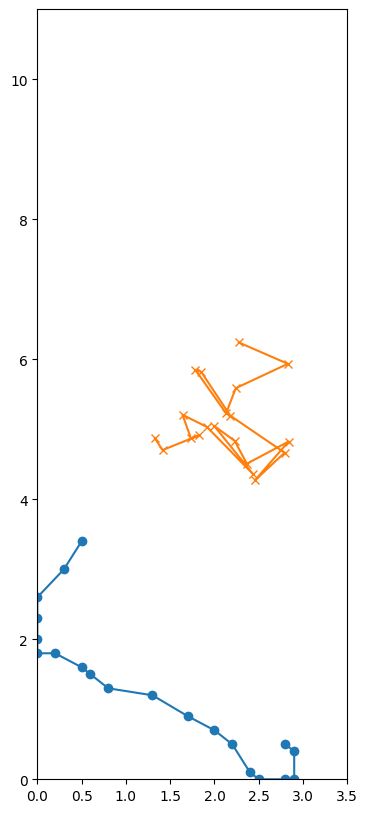

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 4.0000, 0.5000, 3.7000],
        [0.0000, 0.0000, 0.0000,  ..., 8.4000, 2.9000, 8.1000],
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 1.1000, 9.9000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 0.5000, 9.9000],
        [0.0000, 0.0000, 0.0000,  ..., 2.9000, 1.4000, 2.9000],
        [0.0000, 0.0000, 0.0000,  ..., 5.0000, 1.8000, 4.9000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.5000, 3.5000, 1.6000, 3.4000, 1.8000,
         3.4000, 2.1000, 3.4000, 2.5000, 3.2000, 2.7000, 3.1000, 2.9000, 3.0000,
         2.9000, 3.1000, 2.9000, 3.4000, 2.6000, 3.8000, 2.4000, 3.9000, 2.2000,
         3.9000, 1.7000, 4.1000, 1.5000, 4.2000, 1.4000, 4.2000, 1.1000, 4.2000,
         0.6000, 4.0000, 0.5000, 3.7000]], device='cuda:0')
0
0 1.5514477491378784


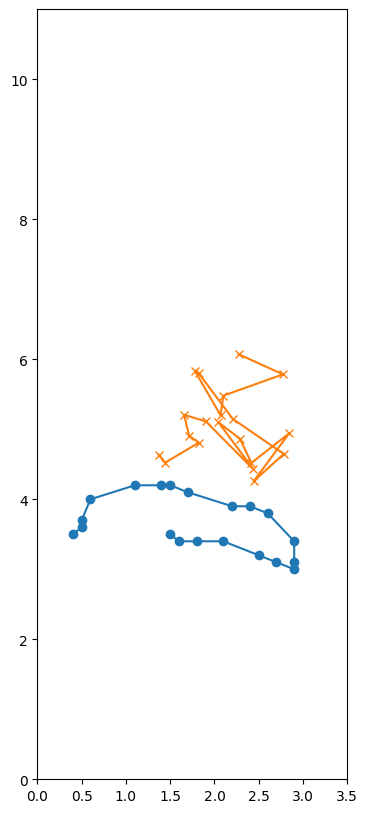

tensor([[0.0000, 0.0000, 0.0000,  ..., 4.0000, 0.5000, 3.7000],
        [0.0000, 0.0000, 0.0000,  ..., 8.4000, 2.9000, 8.1000],
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 1.1000, 9.9000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 0.5000, 9.9000],
        [0.0000, 0.0000, 0.0000,  ..., 2.9000, 1.4000, 2.9000],
        [0.0000, 0.0000, 0.0000,  ..., 5.0000, 1.8000, 4.9000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.6000, 9.5000, 0.9000, 9.5000, 1.0000,
         9.5000, 1.3000, 9.6000, 1.5000, 9.8000, 1.9000, 9.9000, 2.3000, 9.8000,
         2.6000, 9.9000, 2.7000, 9.9000, 2.8000, 9.9000, 2.9000, 9.9000, 2.9000,
         9.8000, 2.9000, 9.4000, 2.9000, 9.3000, 2.9000, 9.0000, 2.9000, 8.6000,
         2.9000, 8.4000, 2.9000, 8.1000]], device='cuda:0')
1
1 0.023281654343008995


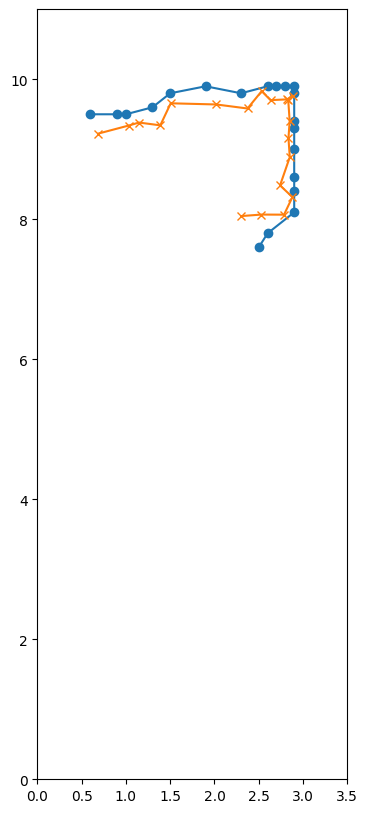

tensor([[0.0000, 0.0000, 0.0000,  ..., 4.0000, 0.5000, 3.7000],
        [0.0000, 0.0000, 0.0000,  ..., 8.4000, 2.9000, 8.1000],
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 1.1000, 9.9000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 0.5000, 9.9000],
        [0.0000, 0.0000, 0.0000,  ..., 2.9000, 1.4000, 2.9000],
        [0.0000, 0.0000, 0.0000,  ..., 5.0000, 1.8000, 4.9000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.6000, 5.3000, 1.4000, 5.7000, 1.3000,
         5.9000, 1.1000, 6.2000, 1.1000, 6.5000, 1.0000, 6.7000, 1.0000, 7.1000,
         1.1000, 7.5000, 1.0000, 7.7000, 1.1000, 8.2000, 1.2000, 8.5000, 1.2000,
         8.9000, 1.0000, 9.1000, 1.0000, 9.4000, 1.0000, 9.5000, 0.9000, 9.7000,
         1.0000, 9.9000, 1.1000, 9.9000]], device='cuda:0')
2
2 0.015759846195578575


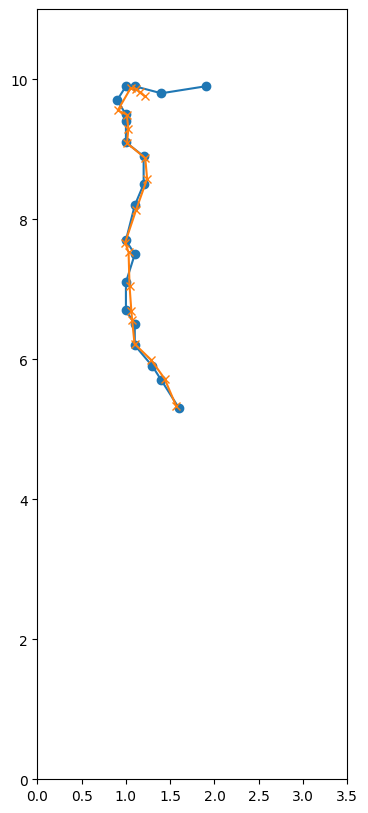

tensor([[0.0000, 0.0000, 0.0000,  ..., 4.0000, 0.5000, 3.7000],
        [0.0000, 0.0000, 0.0000,  ..., 8.4000, 2.9000, 8.1000],
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 1.1000, 9.9000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 0.5000, 9.9000],
        [0.0000, 0.0000, 0.0000,  ..., 2.9000, 1.4000, 2.9000],
        [0.0000, 0.0000, 0.0000,  ..., 5.0000, 1.8000, 4.9000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.2000, 7.1000, 2.4000, 6.9000, 2.6000,
         6.8000, 2.7000, 6.8000, 2.9000, 6.6000, 2.9000, 6.5000, 2.7000, 6.0000,
         2.6000, 5.8000, 2.2000, 5.6000, 2.0000, 5.5000, 1.9000, 5.2000, 1.6000,
         5.0000, 1.3000, 4.9000, 1.0000, 4.9000, 0.7000, 4.9000, 0.6000, 4.8000,
         0.3000, 4.6000, 0.2000, 4.3000]], device='cuda:0')
3
3 0.5174897909164429


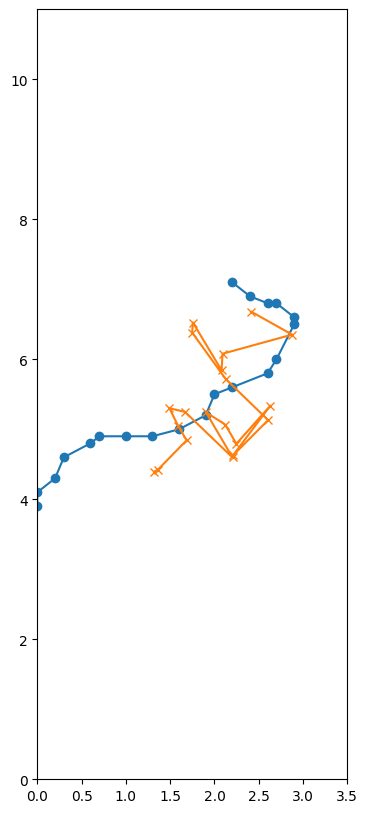

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 7.4000, 0.0000, 7.1000],
        [0.0000, 0.0000, 0.0000,  ..., 3.0000, 1.8000, 3.2000],
        [0.0000, 0.0000, 0.0000,  ..., 7.0000, 2.9000, 7.4000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 7.6000, 2.9000, 7.5000],
        [0.0000, 0.0000, 0.0000,  ..., 4.9000, 0.6000, 4.7000],
        [0.0000, 0.0000, 0.0000,  ..., 1.0000, 2.0000, 0.7000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.0000, 6.3000, 2.2000, 6.5000, 2.3000,
         6.9000, 2.2000, 7.3000, 2.1000, 7.7000, 2.0000, 8.0000, 1.8000, 8.1000,
         1.4000, 8.2000, 1.3000, 8.2000, 1.1000, 8.1000, 1.0000, 8.0000, 0.9000,
         7.9000, 0.5000, 7.9000, 0.1000, 8.0000, 0.0000, 8.0000, 0.0000, 7.7000,
         0.0000, 7.4000, 0.0000, 7.1000]], device='cuda:0')
0
0 0.20111511647701263


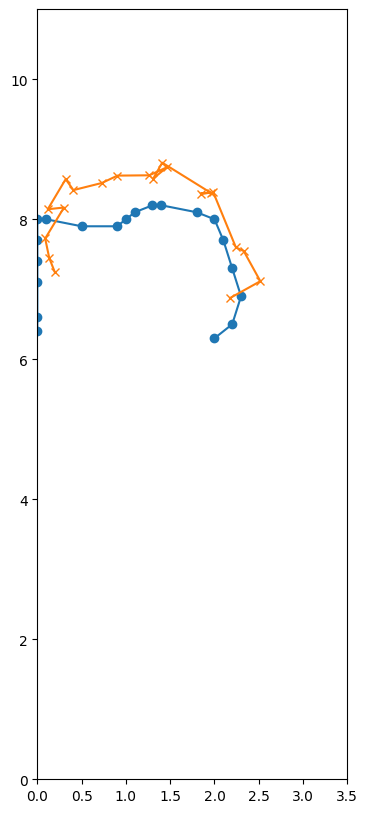

tensor([[0.0000, 0.0000, 0.0000,  ..., 7.4000, 0.0000, 7.1000],
        [0.0000, 0.0000, 0.0000,  ..., 3.0000, 1.8000, 3.2000],
        [0.0000, 0.0000, 0.0000,  ..., 7.0000, 2.9000, 7.4000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 7.6000, 2.9000, 7.5000],
        [0.0000, 0.0000, 0.0000,  ..., 4.9000, 0.6000, 4.7000],
        [0.0000, 0.0000, 0.0000,  ..., 1.0000, 2.0000, 0.7000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.3000, 5.6000, 1.7000, 5.7000, 2.0000,
         5.6000, 2.2000, 5.5000, 2.7000, 5.4000, 2.9000, 5.3000, 2.9000, 5.1000,
         2.9000, 4.9000, 2.9000, 4.4000, 2.9000, 4.2000, 2.9000, 3.8000, 2.9000,
         3.6000, 2.9000, 3.5000, 2.8000, 3.2000, 2.5000, 2.9000, 2.4000, 2.9000,
         2.0000, 3.0000, 1.8000, 3.2000]], device='cuda:0')
1
1 0.8126177191734314


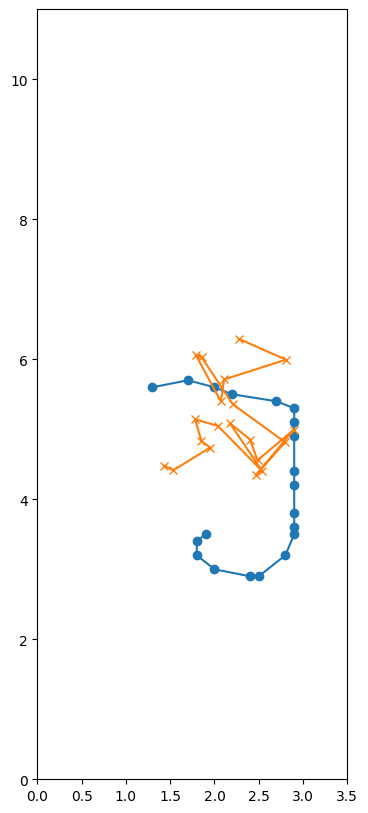

tensor([[0.0000, 0.0000, 0.0000,  ..., 7.4000, 0.0000, 7.1000],
        [0.0000, 0.0000, 0.0000,  ..., 3.0000, 1.8000, 3.2000],
        [0.0000, 0.0000, 0.0000,  ..., 7.0000, 2.9000, 7.4000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 7.6000, 2.9000, 7.5000],
        [0.0000, 0.0000, 0.0000,  ..., 4.9000, 0.6000, 4.7000],
        [0.0000, 0.0000, 0.0000,  ..., 1.0000, 2.0000, 0.7000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.7000, 2.0000, 2.4000, 2.4000, 2.4000,
         2.7000, 2.5000, 2.8000, 2.6000, 3.2000, 2.6000, 3.6000, 2.7000, 4.0000,
         2.7000, 4.2000, 2.8000, 4.4000, 2.9000, 4.7000, 2.9000, 5.1000, 2.9000,
         5.4000, 2.9000, 5.5000, 2.9000, 6.0000, 2.9000, 6.3000, 2.9000, 6.7000,
         2.9000, 7.0000, 2.9000, 7.4000]], device='cuda:0')
2
2 2.184065818786621


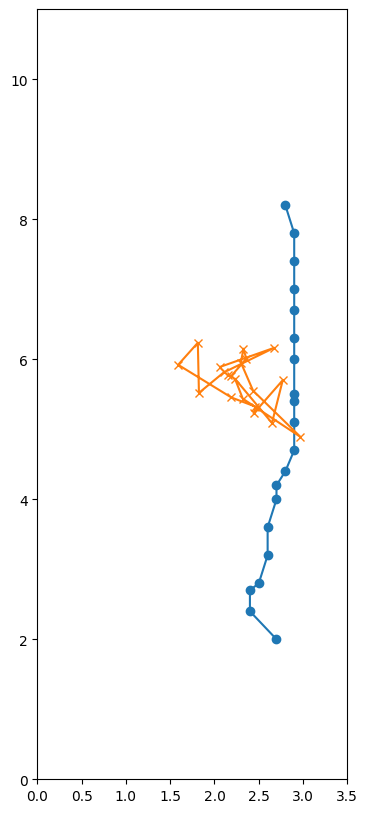

tensor([[0.0000, 0.0000, 0.0000,  ..., 7.4000, 0.0000, 7.1000],
        [0.0000, 0.0000, 0.0000,  ..., 3.0000, 1.8000, 3.2000],
        [0.0000, 0.0000, 0.0000,  ..., 7.0000, 2.9000, 7.4000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 7.6000, 2.9000, 7.5000],
        [0.0000, 0.0000, 0.0000,  ..., 4.9000, 0.6000, 4.7000],
        [0.0000, 0.0000, 0.0000,  ..., 1.0000, 2.0000, 0.7000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.2000, 7.7000, 2.1000, 8.2000, 2.1000,
         8.3000, 2.0000, 8.7000, 1.8000, 8.9000, 1.7000, 9.3000, 1.7000, 9.4000,
         1.5000, 9.6000, 1.4000, 9.6000, 1.0000, 9.3000, 0.9000, 8.8000, 0.9000,
         8.7000, 0.9000, 8.5000, 0.8000, 8.3000, 0.3000, 8.1000, 0.0000, 8.0000,
         0.0000, 7.8000, 0.0000, 7.4000]], device='cuda:0')
3
3 0.049664389342069626


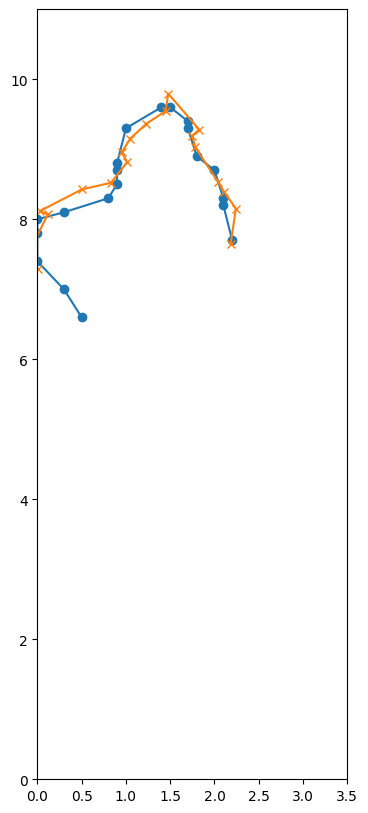

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 5.7000, 0.0000, 5.8000],
        [0.0000, 0.0000, 0.0000,  ..., 4.6000, 0.1000, 5.0000],
        [0.0000, 0.0000, 0.0000,  ..., 4.1000, 0.0000, 4.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 5.5000, 2.6000, 5.9000],
        [0.0000, 0.0000, 0.0000,  ..., 5.2000, 0.3000, 5.1000],
        [0.0000, 0.0000, 0.0000,  ..., 6.1000, 0.0000, 6.6000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.3000, 1.4000, 0.0000, 1.5000, 0.0000,
         1.7000, 0.2000, 1.9000, 0.4000, 2.3000, 0.4000, 2.4000, 0.3000, 2.6000,
         0.3000, 3.1000, 0.3000, 3.2000, 0.3000, 3.3000, 0.3000, 3.5000, 0.5000,
         3.7000, 0.8000, 4.1000, 0.9000, 4.6000, 0.8000, 4.9000, 0.8000, 5.3000,
         0.5000, 5.7000, 0.0000, 5.8000]], device='cuda:0')
0
0 4.766044616699219


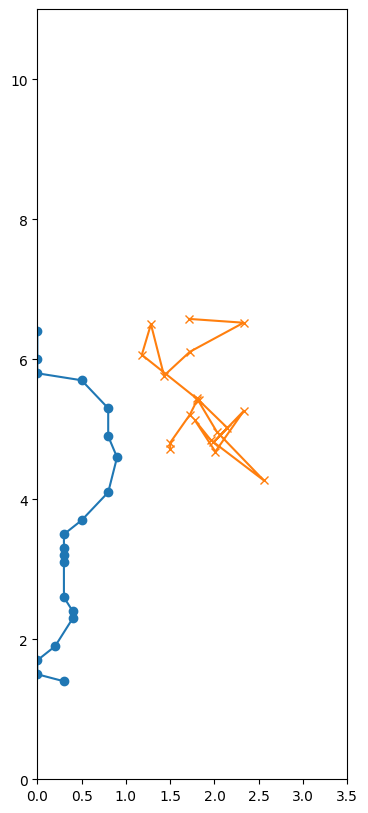

tensor([[0.0000, 0.0000, 0.0000,  ..., 5.7000, 0.0000, 5.8000],
        [0.0000, 0.0000, 0.0000,  ..., 4.6000, 0.1000, 5.0000],
        [0.0000, 0.0000, 0.0000,  ..., 4.1000, 0.0000, 4.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 5.5000, 2.6000, 5.9000],
        [0.0000, 0.0000, 0.0000,  ..., 5.2000, 0.3000, 5.1000],
        [0.0000, 0.0000, 0.0000,  ..., 6.1000, 0.0000, 6.6000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.8000, 1.8000, 2.8000, 2.0000, 2.6000,
         2.2000, 2.5000, 2.5000, 2.2000, 2.7000, 2.0000, 3.0000, 1.9000, 3.1000,
         1.6000, 3.5000, 1.1000, 3.7000, 1.0000, 3.7000, 0.9000, 3.7000, 0.6000,
         3.8000, 0.5000, 3.8000, 0.1000, 3.7000, 0.0000, 3.8000, 0.0000, 4.2000,
         0.0000, 4.6000, 0.1000, 5.0000]], device='cuda:0')
1
1 3.3732857704162598


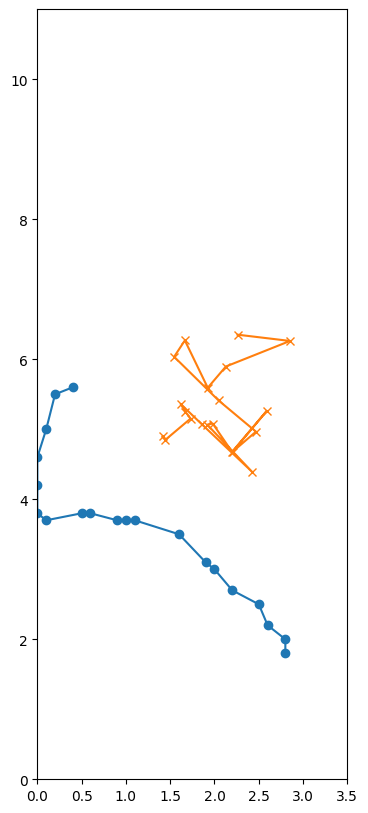

tensor([[0.0000, 0.0000, 0.0000,  ..., 5.7000, 0.0000, 5.8000],
        [0.0000, 0.0000, 0.0000,  ..., 4.6000, 0.1000, 5.0000],
        [0.0000, 0.0000, 0.0000,  ..., 4.1000, 0.0000, 4.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 5.5000, 2.6000, 5.9000],
        [0.0000, 0.0000, 0.0000,  ..., 5.2000, 0.3000, 5.1000],
        [0.0000, 0.0000, 0.0000,  ..., 6.1000, 0.0000, 6.6000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.5000, 1.3000, 1.3000, 1.2000, 1.0000,
         1.1000, 0.6000, 1.2000, 0.5000, 1.2000, 0.2000, 1.3000, 0.0000, 1.4000,
         0.0000, 1.7000, 0.0000, 1.8000, 0.0000, 2.2000, 0.3000, 2.6000, 0.3000,
         2.8000, 0.4000, 3.0000, 0.3000, 3.4000, 0.3000, 3.5000, 0.1000, 3.9000,
         0.0000, 4.1000, 0.0000, 4.3000]], device='cuda:0')
2
2 6.101495265960693


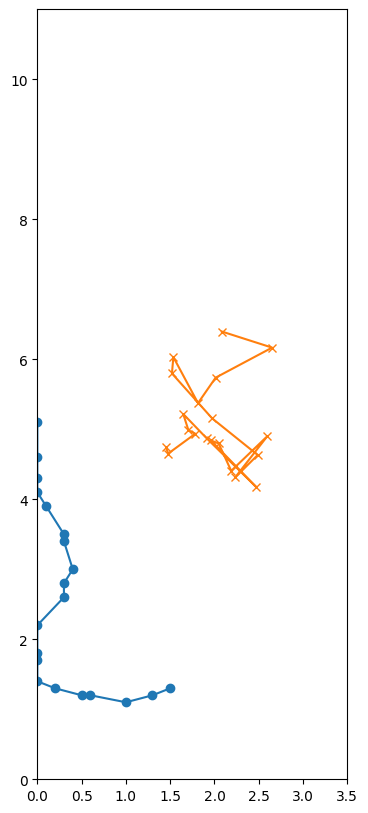

tensor([[0.0000, 0.0000, 0.0000,  ..., 5.7000, 0.0000, 5.8000],
        [0.0000, 0.0000, 0.0000,  ..., 4.6000, 0.1000, 5.0000],
        [0.0000, 0.0000, 0.0000,  ..., 4.1000, 0.0000, 4.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 5.5000, 2.6000, 5.9000],
        [0.0000, 0.0000, 0.0000,  ..., 5.2000, 0.3000, 5.1000],
        [0.0000, 0.0000, 0.0000,  ..., 6.1000, 0.0000, 6.6000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.4000, 5.3000, 1.1000, 5.2000, 1.0000,
         5.2000, 0.6000, 5.5000, 0.4000, 5.7000, 0.1000, 6.0000, 0.0000, 6.0000,
         0.0000, 5.9000, 0.1000, 5.7000, 0.1000, 5.5000, 0.0000, 5.4000, 0.0000,
         5.3000, 0.0000, 5.1000, 0.2000, 4.8000, 0.4000, 4.8000, 0.8000, 4.9000,
         1.2000, 5.0000, 1.4000, 5.2000]], device='cuda:0')
3
3 1.1635105609893799


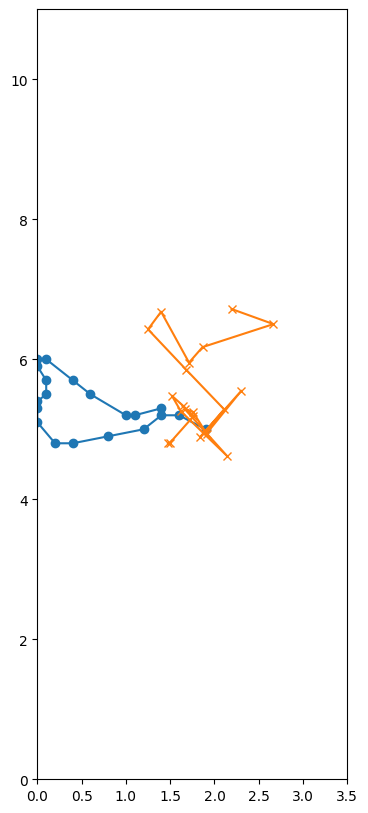

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 9.8000, 0.0000, 9.9000],
        [0.0000, 0.0000, 0.0000,  ..., 8.7000, 1.2000, 8.6000],
        [0.0000, 0.0000, 0.0000,  ..., 8.8000, 1.6000, 8.5000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 6.7000, 0.4000, 6.6000],
        [0.0000, 0.0000, 0.0000,  ..., 7.3000, 1.9000, 7.3000],
        [0.0000, 0.0000, 0.0000,  ..., 2.1000, 0.8000, 2.1000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.5000, 9.3000, 2.9000, 9.6000, 2.9000,
         9.8000, 2.9000, 9.9000, 2.8000, 9.9000, 2.5000, 9.9000, 2.4000, 9.9000,
         2.1000, 9.8000, 2.0000, 9.8000, 1.6000, 9.8000, 1.1000, 9.7000, 1.0000,
         9.7000, 0.9000, 9.8000, 0.7000, 9.9000, 0.5000, 9.9000, 0.4000, 9.9000,
         0.2000, 9.8000, 0.0000, 9.9000]], device='cuda:0')
0
0 0.00683058425784111


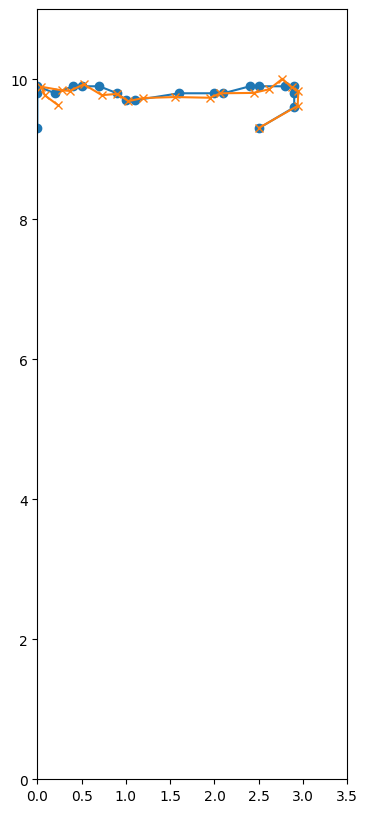

tensor([[0.0000, 0.0000, 0.0000,  ..., 9.8000, 0.0000, 9.9000],
        [0.0000, 0.0000, 0.0000,  ..., 8.7000, 1.2000, 8.6000],
        [0.0000, 0.0000, 0.0000,  ..., 8.8000, 1.6000, 8.5000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 6.7000, 0.4000, 6.6000],
        [0.0000, 0.0000, 0.0000,  ..., 7.3000, 1.9000, 7.3000],
        [0.0000, 0.0000, 0.0000,  ..., 2.1000, 0.8000, 2.1000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.5000, 7.9000, 2.3000, 8.1000, 2.1000,
         8.3000, 1.9000, 8.5000, 1.6000, 8.8000, 1.5000, 9.3000, 1.4000, 9.8000,
         1.2000, 9.9000, 1.0000, 9.9000, 0.7000, 9.7000, 0.4000, 9.5000, 0.3000,
         9.4000, 0.3000, 9.2000, 0.5000, 8.9000, 0.6000, 8.9000, 0.8000, 8.9000,
         1.1000, 8.7000, 1.2000, 8.6000]], device='cuda:0')
1
1 0.014314519241452217


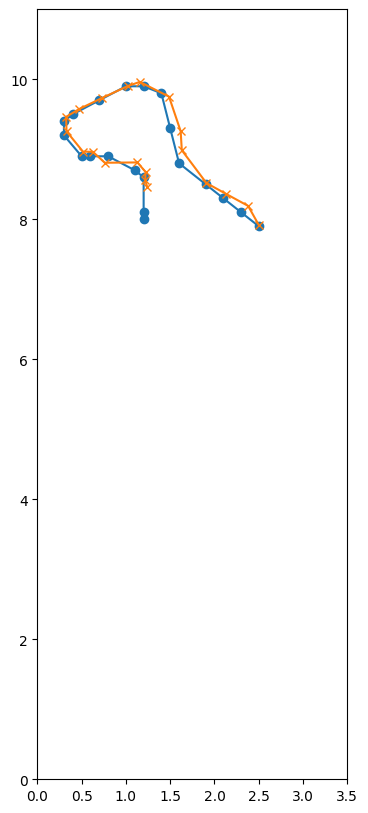

tensor([[0.0000, 0.0000, 0.0000,  ..., 9.8000, 0.0000, 9.9000],
        [0.0000, 0.0000, 0.0000,  ..., 8.7000, 1.2000, 8.6000],
        [0.0000, 0.0000, 0.0000,  ..., 8.8000, 1.6000, 8.5000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 6.7000, 0.4000, 6.6000],
        [0.0000, 0.0000, 0.0000,  ..., 7.3000, 1.9000, 7.3000],
        [0.0000, 0.0000, 0.0000,  ..., 2.1000, 0.8000, 2.1000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.0000, 7.9000, 2.0000, 8.0000, 1.9000,
         8.1000, 1.7000, 8.4000, 1.6000, 8.8000, 1.6000, 9.0000, 1.6000, 9.3000,
         1.6000, 9.4000, 1.3000, 9.7000, 1.3000, 9.9000, 1.5000, 9.9000, 1.6000,
         9.9000, 1.7000, 9.9000, 2.0000, 9.7000, 2.0000, 9.5000, 1.9000, 9.0000,
         1.8000, 8.8000, 1.6000, 8.5000]], device='cuda:0')
2
2 0.013784699141979218


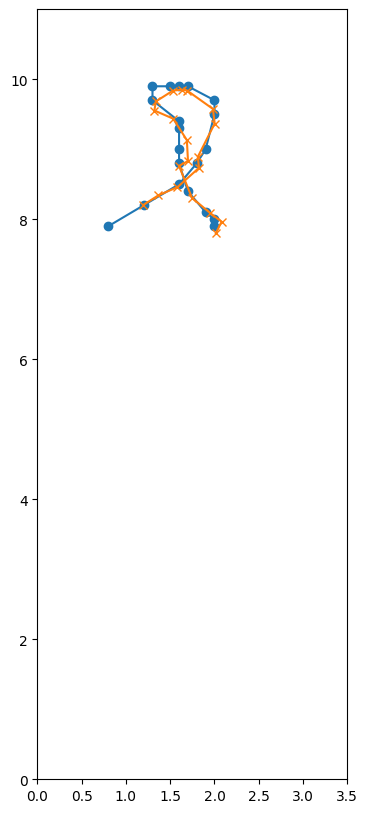

tensor([[0.0000, 0.0000, 0.0000,  ..., 9.8000, 0.0000, 9.9000],
        [0.0000, 0.0000, 0.0000,  ..., 8.7000, 1.2000, 8.6000],
        [0.0000, 0.0000, 0.0000,  ..., 8.8000, 1.6000, 8.5000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 6.7000, 0.4000, 6.6000],
        [0.0000, 0.0000, 0.0000,  ..., 7.3000, 1.9000, 7.3000],
        [0.0000, 0.0000, 0.0000,  ..., 2.1000, 0.8000, 2.1000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 3.3000, 0.7000, 3.4000, 0.3000,
         3.8000, 0.2000, 4.2000, 0.2000, 4.3000, 0.1000, 4.6000, 0.0000, 4.9000,
         0.1000, 5.4000, 0.1000, 5.5000, 0.1000, 5.9000, 0.0000, 6.2000, 0.0000,
         6.4000, 0.1000, 6.5000, 0.2000, 6.7000, 0.5000, 7.1000, 0.8000, 7.5000,
         1.2000, 7.6000, 1.6000, 7.9000]], device='cuda:0')
3
3 1.5780960321426392


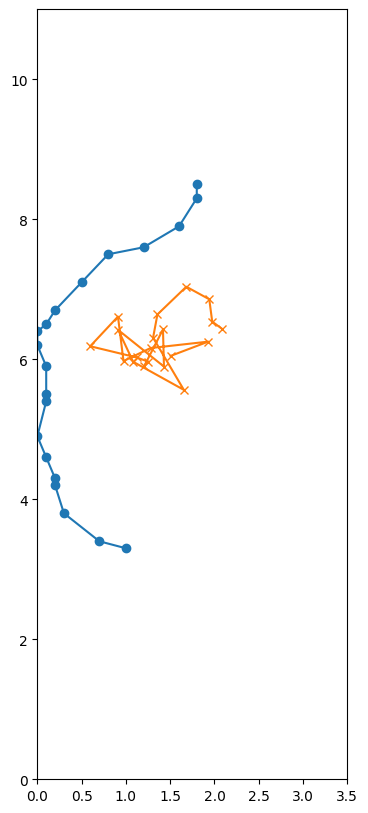

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 5.8000, 0.9000, 5.6000],
        [0.0000, 0.0000, 0.0000,  ..., 5.6000, 1.9000, 5.6000],
        [0.0000, 0.0000, 0.0000,  ..., 5.8000, 0.0000, 6.1000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 5.5000, 0.6000, 5.3000],
        [0.0000, 0.0000, 0.0000,  ..., 2.4000, 1.3000, 2.2000],
        [0.0000, 0.0000, 0.0000,  ..., 5.3000, 2.1000, 5.4000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.9000, 9.0000, 0.6000, 9.0000, 0.2000,
         8.7000, 0.1000, 8.7000, 0.0000, 8.5000, 0.0000, 8.4000, 0.0000, 8.3000,
         0.1000, 8.1000, 0.3000, 7.8000, 0.6000, 7.6000, 0.6000, 7.5000, 0.7000,
         7.0000, 0.9000, 6.7000, 0.9000, 6.2000, 1.0000, 6.1000, 1.1000, 5.9000,
         1.1000, 5.8000, 0.9000, 5.6000]], device='cuda:0')
0
0 0.6086457967758179


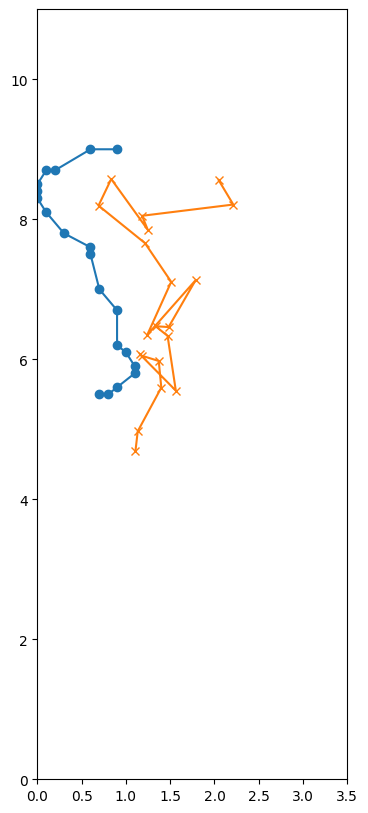

tensor([[0.0000, 0.0000, 0.0000,  ..., 5.8000, 0.9000, 5.6000],
        [0.0000, 0.0000, 0.0000,  ..., 5.6000, 1.9000, 5.6000],
        [0.0000, 0.0000, 0.0000,  ..., 5.8000, 0.0000, 6.1000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 5.5000, 0.6000, 5.3000],
        [0.0000, 0.0000, 0.0000,  ..., 2.4000, 1.3000, 2.2000],
        [0.0000, 0.0000, 0.0000,  ..., 5.3000, 2.1000, 5.4000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.4000, 3.2000, 0.1000, 3.3000, 0.0000,
         3.4000, 0.0000, 3.5000, 0.0000, 3.7000, 0.0000, 4.1000, 0.0000, 4.2000,
         0.0000, 4.5000, 0.0000, 4.7000, 0.1000, 5.0000, 0.1000, 5.1000, 0.1000,
         5.3000, 0.4000, 5.7000, 0.6000, 5.8000, 1.1000, 5.8000, 1.4000, 5.6000,
         1.6000, 5.6000, 1.9000, 5.6000]], device='cuda:0')
1
1 2.3574609756469727


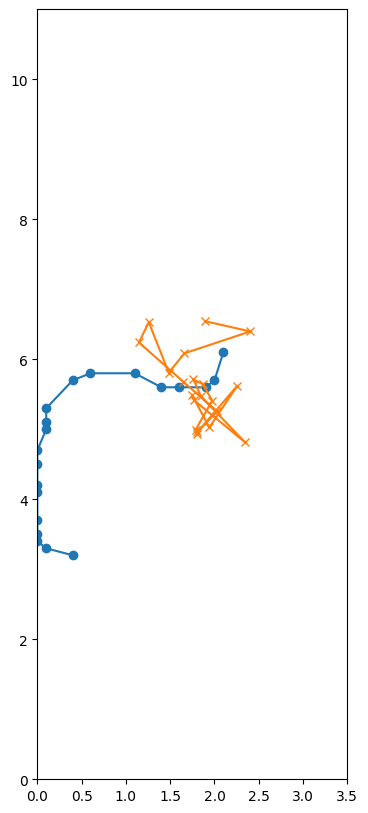

tensor([[0.0000, 0.0000, 0.0000,  ..., 5.8000, 0.9000, 5.6000],
        [0.0000, 0.0000, 0.0000,  ..., 5.6000, 1.9000, 5.6000],
        [0.0000, 0.0000, 0.0000,  ..., 5.8000, 0.0000, 6.1000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 5.5000, 0.6000, 5.3000],
        [0.0000, 0.0000, 0.0000,  ..., 2.4000, 1.3000, 2.2000],
        [0.0000, 0.0000, 0.0000,  ..., 5.3000, 2.1000, 5.4000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.3000, 5.6000, 2.8000, 5.4000, 2.9000,
         5.3000, 2.9000, 5.0000, 2.7000, 4.8000, 2.3000, 4.5000, 2.2000, 4.5000,
         1.8000, 4.2000, 1.4000, 4.0000, 1.3000, 4.0000, 1.0000, 4.1000, 0.8000,
         4.3000, 0.7000, 4.4000, 0.5000, 4.6000, 0.4000, 4.9000, 0.1000, 5.3000,
         0.0000, 5.8000, 0.0000, 6.1000]], device='cuda:0')
2
2 1.2193150520324707


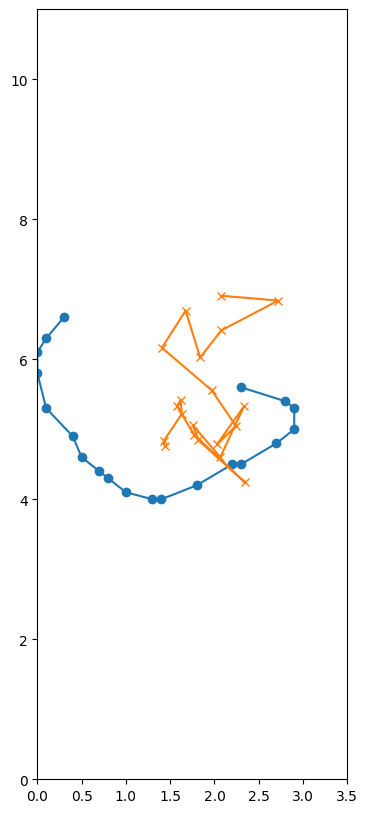

tensor([[0.0000, 0.0000, 0.0000,  ..., 5.8000, 0.9000, 5.6000],
        [0.0000, 0.0000, 0.0000,  ..., 5.6000, 1.9000, 5.6000],
        [0.0000, 0.0000, 0.0000,  ..., 5.8000, 0.0000, 6.1000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 5.5000, 0.6000, 5.3000],
        [0.0000, 0.0000, 0.0000,  ..., 2.4000, 1.3000, 2.2000],
        [0.0000, 0.0000, 0.0000,  ..., 5.3000, 2.1000, 5.4000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.9000, 5.1000, 2.9000, 5.5000, 2.9000,
         6.0000, 2.7000, 6.4000, 2.7000, 6.7000, 2.6000, 6.8000, 2.1000, 6.9000,
         1.8000, 6.8000, 1.6000, 6.5000, 1.4000, 6.3000, 1.3000, 6.0000, 1.3000,
         5.9000, 1.1000, 5.5000, 0.8000, 5.2000, 0.4000, 5.1000, 0.0000, 5.3000,
         0.0000, 5.4000, 0.0000, 5.7000]], device='cuda:0')
3
3 0.6110188364982605


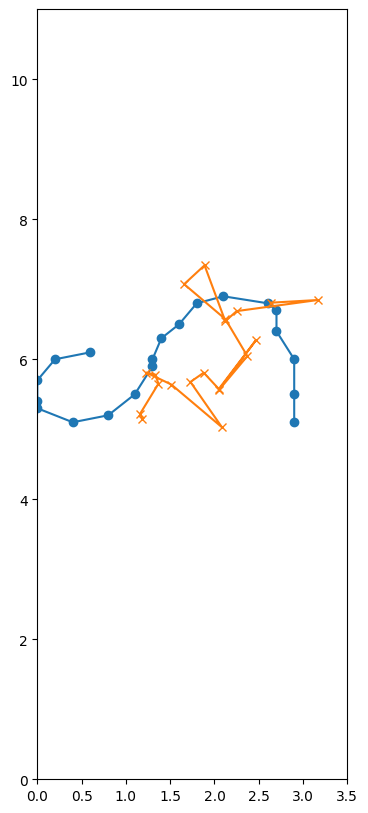

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 1.9000, 0.4000, 1.8000],
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 0.0000, 9.8000],
        [0.0000, 0.0000, 0.0000,  ..., 5.9000, 1.3000, 5.5000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.9000, 2.4000, 2.1000],
        [0.0000, 0.0000, 0.0000,  ..., 8.2000, 2.1000, 8.1000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.1000, 0.0000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.5000, 6.2000, 2.0000, 6.2000, 1.8000,
         6.1000, 1.6000, 5.9000, 1.1000, 5.8000, 0.8000, 5.6000, 0.5000, 5.2000,
         0.5000, 5.1000, 0.6000, 4.6000, 0.9000, 4.2000, 0.9000, 3.7000, 0.6000,
         3.3000, 0.4000, 2.9000, 0.4000, 2.8000, 0.4000, 2.6000, 0.5000, 2.1000,
         0.4000, 1.9000, 0.4000, 1.8000]], device='cuda:0')
0
0 2.2697842121124268


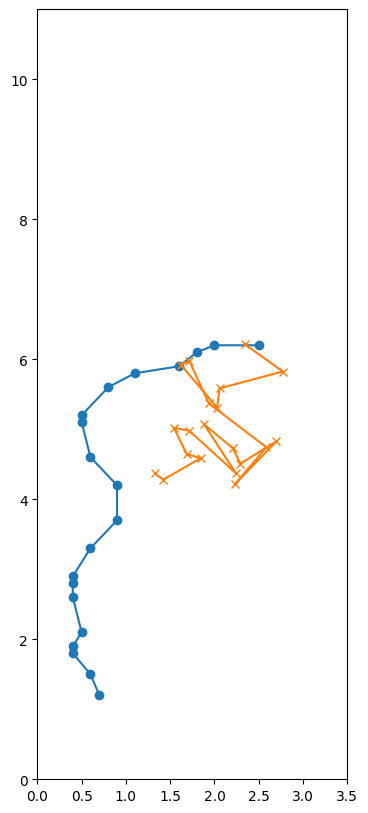

tensor([[0.0000, 0.0000, 0.0000,  ..., 1.9000, 0.4000, 1.8000],
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 0.0000, 9.8000],
        [0.0000, 0.0000, 0.0000,  ..., 5.9000, 1.3000, 5.5000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.9000, 2.4000, 2.1000],
        [0.0000, 0.0000, 0.0000,  ..., 8.2000, 2.1000, 8.1000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.1000, 0.0000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.2000, 8.4000, 2.1000, 8.3000, 1.9000,
         8.1000, 1.5000, 7.9000, 1.0000, 7.8000, 0.7000, 7.9000, 0.5000, 8.1000,
         0.4000, 8.4000, 0.4000, 8.5000, 0.4000, 8.6000, 0.5000, 8.7000, 0.5000,
         8.9000, 0.6000, 9.3000, 0.6000, 9.6000, 0.4000, 9.9000, 0.3000, 9.9000,
         0.0000, 9.9000, 0.0000, 9.8000]], device='cuda:0')
1
1 0.005617780145257711


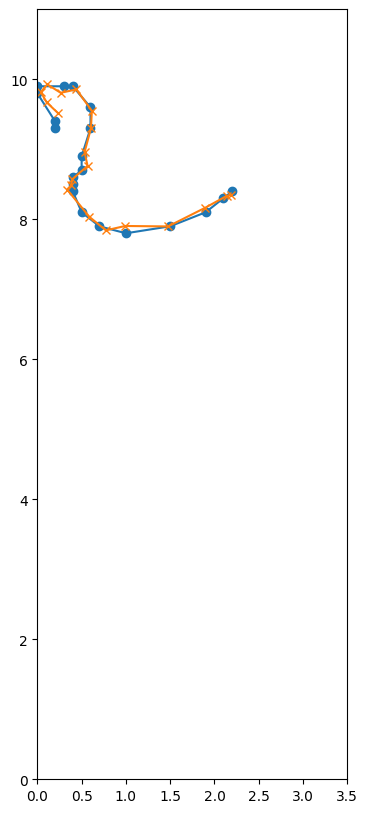

tensor([[0.0000, 0.0000, 0.0000,  ..., 1.9000, 0.4000, 1.8000],
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 0.0000, 9.8000],
        [0.0000, 0.0000, 0.0000,  ..., 5.9000, 1.3000, 5.5000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.9000, 2.4000, 2.1000],
        [0.0000, 0.0000, 0.0000,  ..., 8.2000, 2.1000, 8.1000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.1000, 0.0000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.6000, 4.4000, 1.3000, 4.2000, 1.1000,
         4.1000, 0.7000, 4.0000, 0.5000, 4.0000, 0.1000, 3.9000, 0.0000, 4.0000,
         0.0000, 4.1000, 0.1000, 4.6000, 0.1000, 4.7000, 0.0000, 5.2000, 0.0000,
         5.3000, 0.3000, 5.7000, 0.6000, 5.9000, 0.9000, 6.0000, 1.0000, 6.0000,
         1.1000, 5.9000, 1.3000, 5.5000]], device='cuda:0')
2
2 1.6427143812179565


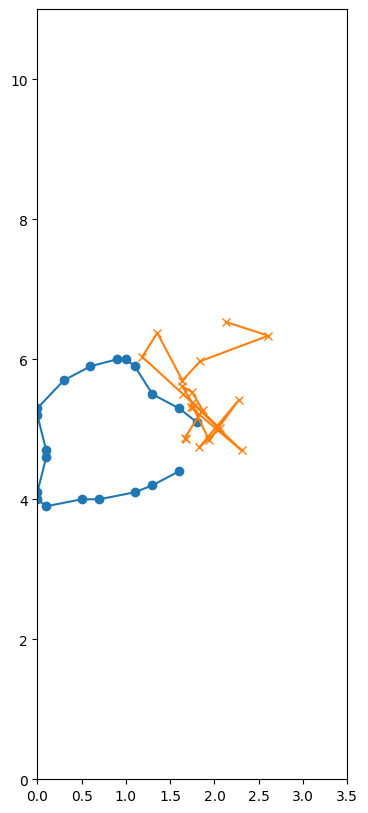

tensor([[0.0000, 0.0000, 0.0000,  ..., 1.9000, 0.4000, 1.8000],
        [0.0000, 0.0000, 0.0000,  ..., 9.9000, 0.0000, 9.8000],
        [0.0000, 0.0000, 0.0000,  ..., 5.9000, 1.3000, 5.5000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.9000, 2.4000, 2.1000],
        [0.0000, 0.0000, 0.0000,  ..., 8.2000, 2.1000, 8.1000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.1000, 0.0000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.3000, 7.4000, 1.0000, 7.2000, 0.9000,
         6.7000, 0.9000, 6.3000, 0.8000, 5.8000, 0.7000, 5.7000, 0.4000, 5.6000,
         0.0000, 5.6000, 0.0000, 5.4000, 0.1000, 5.2000, 0.5000, 4.9000, 0.8000,
         4.9000, 1.0000, 4.9000, 1.2000, 4.7000, 1.4000, 4.3000, 1.5000, 4.1000,
         1.5000, 3.8000, 1.5000, 3.7000]], device='cuda:0')
3
3 1.0638799667358398


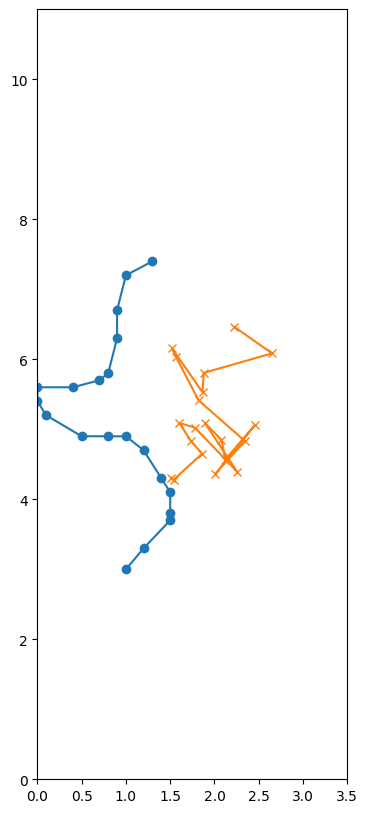

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 5.1000, 0.3000, 5.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.6000, 0.1000],
        [0.0000, 0.0000, 0.0000,  ..., 4.6000, 0.1000, 4.6000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.7000, 1.9000, 1.6000],
        [0.0000, 0.0000, 0.0000,  ..., 3.1000, 1.5000, 3.4000],
        [0.0000, 0.0000, 0.0000,  ..., 5.4000, 2.0000, 5.3000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.2000, 8.6000, 1.3000, 8.6000, 1.5000,
         8.4000, 1.9000, 8.1000, 1.9000, 8.0000, 1.9000, 7.9000, 1.8000, 7.4000,
         1.9000, 6.9000, 1.9000, 6.8000, 2.0000, 6.4000, 1.9000, 6.1000, 1.8000,
         5.9000, 1.4000, 5.7000, 0.9000, 5.7000, 0.6000, 5.4000, 0.3000, 5.2000,
         0.3000, 5.1000, 0.3000, 5.0000]], device='cuda:0')
0
0 0.6828554272651672


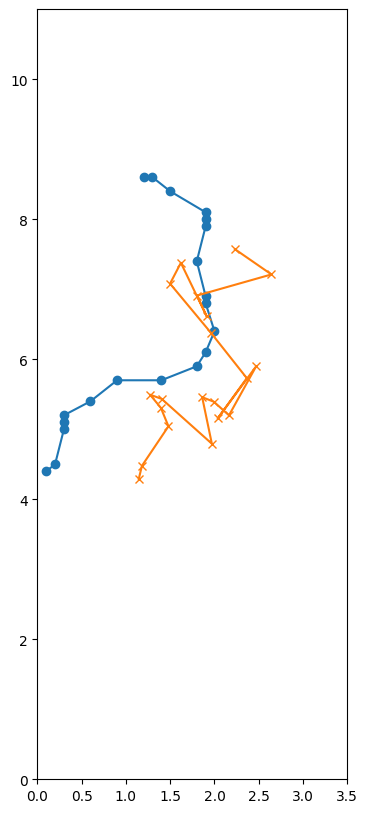

tensor([[0.0000, 0.0000, 0.0000,  ..., 5.1000, 0.3000, 5.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.6000, 0.1000],
        [0.0000, 0.0000, 0.0000,  ..., 4.6000, 0.1000, 4.6000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.7000, 1.9000, 1.6000],
        [0.0000, 0.0000, 0.0000,  ..., 3.1000, 1.5000, 3.4000],
        [0.0000, 0.0000, 0.0000,  ..., 5.4000, 2.0000, 5.3000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.1000, 4.0000, 0.2000, 3.5000, 0.3000,
         3.2000, 0.4000, 2.8000, 0.5000, 2.7000, 0.5000, 2.5000, 0.5000, 2.4000,
         0.4000, 2.1000, 0.4000, 1.8000, 0.3000, 1.4000, 0.2000, 0.9000, 0.1000,
         0.7000, 0.0000, 0.6000, 0.0000, 0.5000, 0.0000, 0.4000, 0.3000, 0.0000,
         0.4000, 0.0000, 0.6000, 0.1000]], device='cuda:0')
1
1 8.745327949523926


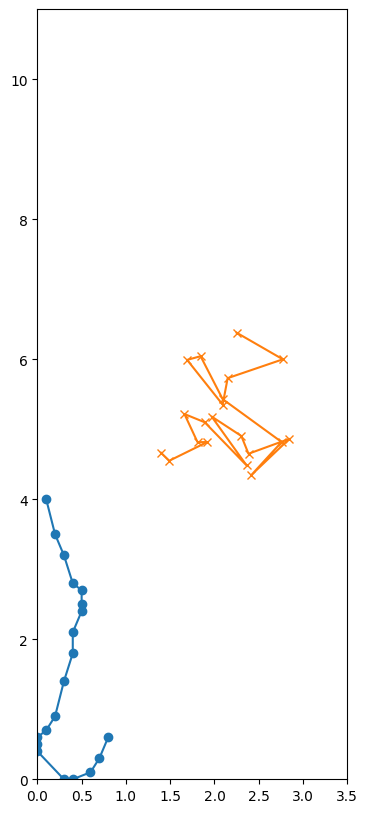

tensor([[0.0000, 0.0000, 0.0000,  ..., 5.1000, 0.3000, 5.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.6000, 0.1000],
        [0.0000, 0.0000, 0.0000,  ..., 4.6000, 0.1000, 4.6000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.7000, 1.9000, 1.6000],
        [0.0000, 0.0000, 0.0000,  ..., 3.1000, 1.5000, 3.4000],
        [0.0000, 0.0000, 0.0000,  ..., 5.4000, 2.0000, 5.3000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.9000, 5.8000, 2.3000, 5.8000, 2.7000,
         5.7000, 2.9000, 5.6000, 2.9000, 5.4000, 2.9000, 5.3000, 2.9000, 4.9000,
         2.9000, 4.5000, 2.7000, 4.2000, 2.5000, 4.0000, 2.2000, 3.9000, 1.8000,
         4.1000, 1.7000, 4.2000, 1.6000, 4.3000, 1.5000, 4.3000, 1.1000, 4.4000,
         0.6000, 4.6000, 0.1000, 4.6000]], device='cuda:0')
2
2 0.5954869389533997


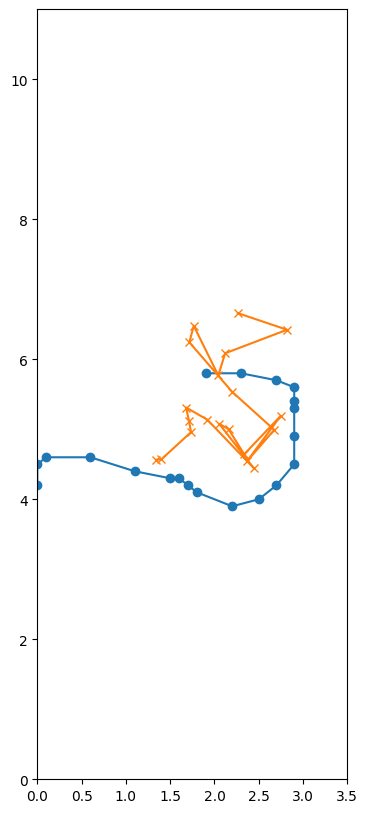

tensor([[0.0000, 0.0000, 0.0000,  ..., 5.1000, 0.3000, 5.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.6000, 0.1000],
        [0.0000, 0.0000, 0.0000,  ..., 4.6000, 0.1000, 4.6000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.7000, 1.9000, 1.6000],
        [0.0000, 0.0000, 0.0000,  ..., 3.1000, 1.5000, 3.4000],
        [0.0000, 0.0000, 0.0000,  ..., 5.4000, 2.0000, 5.3000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.3000, 4.8000, 2.5000, 4.8000, 2.8000,
         5.1000, 2.8000, 5.6000, 2.9000, 5.9000, 2.9000, 6.3000, 2.9000, 6.5000,
         2.8000, 6.8000, 2.7000, 7.2000, 2.6000, 7.4000, 2.6000, 7.6000, 2.7000,
         8.0000, 2.7000, 8.1000, 2.9000, 8.5000, 2.9000, 8.6000, 2.9000, 8.8000,
         2.7000, 9.1000, 2.7000, 9.3000]], device='cuda:0')
3
3 0.05317080020904541


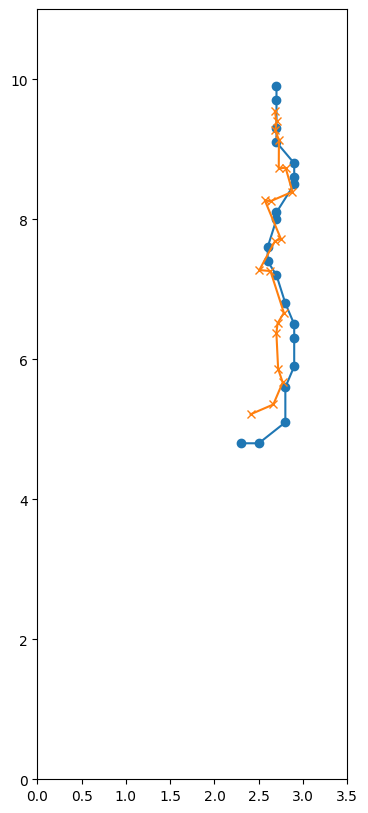

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 1.8000, 2.6000, 1.6000],
        [0.0000, 0.0000, 0.0000,  ..., 7.1000, 0.0000, 7.4000],
        [0.0000, 0.0000, 0.0000,  ..., 6.6000, 0.0000, 6.5000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.9000, 1.4000],
        [0.0000, 0.0000, 0.0000,  ..., 3.3000, 0.0000, 3.2000],
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.5000, 1.6000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.2000, 6.4000, 2.4000, 6.1000, 2.5000,
         5.8000, 2.7000, 5.3000, 2.9000, 5.1000, 2.9000, 5.0000, 2.9000, 4.8000,
         2.9000, 4.5000, 2.9000, 4.2000, 2.7000, 3.7000, 2.7000, 3.3000, 2.7000,
         3.2000, 2.8000, 3.1000, 2.9000, 2.9000, 2.9000, 2.5000, 2.7000, 2.2000,
         2.6000, 1.8000, 2.6000, 1.6000]], device='cuda:0')
0
0 1.956316351890564


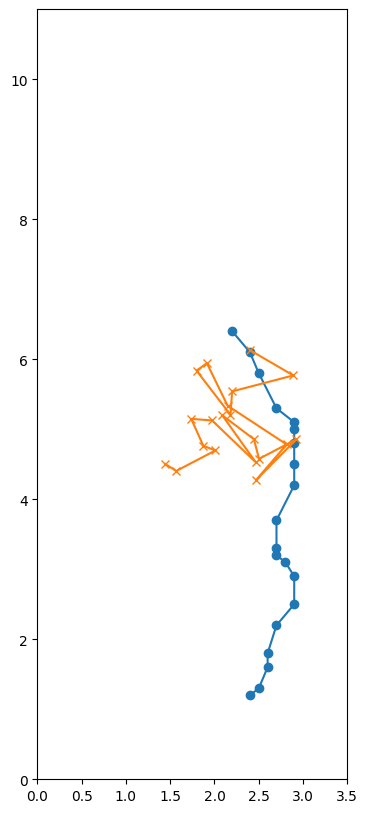

tensor([[0.0000, 0.0000, 0.0000,  ..., 1.8000, 2.6000, 1.6000],
        [0.0000, 0.0000, 0.0000,  ..., 7.1000, 0.0000, 7.4000],
        [0.0000, 0.0000, 0.0000,  ..., 6.6000, 0.0000, 6.5000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.9000, 1.4000],
        [0.0000, 0.0000, 0.0000,  ..., 3.3000, 0.0000, 3.2000],
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.5000, 1.6000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.1000, 9.9000, 0.1000, 9.7000, 0.0000,
         9.5000, 0.0000, 9.3000, 0.2000, 9.1000, 0.4000, 9.0000, 0.7000, 8.7000,
         0.8000, 8.5000, 0.8000, 8.4000, 0.8000, 8.2000, 0.9000, 8.1000, 1.0000,
         7.9000, 1.0000, 7.7000, 0.7000, 7.4000, 0.4000, 7.1000, 0.2000, 7.0000,
         0.0000, 7.1000, 0.0000, 7.4000]], device='cuda:0')
1
1 0.06093946844339371


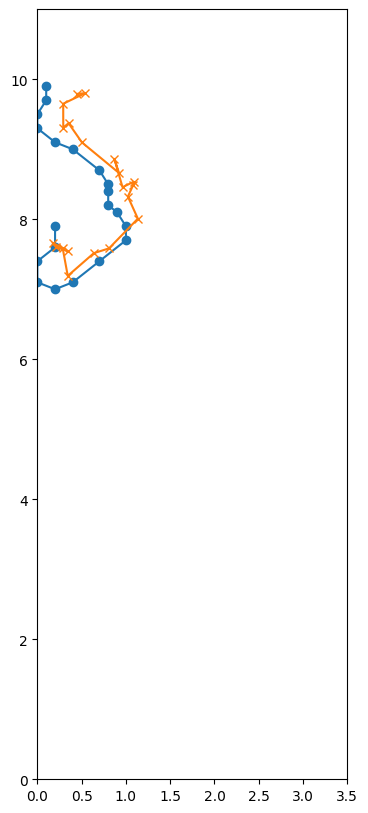

tensor([[0.0000, 0.0000, 0.0000,  ..., 1.8000, 2.6000, 1.6000],
        [0.0000, 0.0000, 0.0000,  ..., 7.1000, 0.0000, 7.4000],
        [0.0000, 0.0000, 0.0000,  ..., 6.6000, 0.0000, 6.5000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.9000, 1.4000],
        [0.0000, 0.0000, 0.0000,  ..., 3.3000, 0.0000, 3.2000],
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.5000, 1.6000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.1000, 9.7000, 1.0000, 9.2000, 1.1000,
         9.0000, 1.4000, 8.8000, 1.6000, 8.7000, 1.9000, 8.5000, 2.0000, 8.3000,
         2.0000, 7.8000, 1.7000, 7.5000, 1.6000, 7.3000, 1.5000, 7.1000, 1.3000,
         6.8000, 1.2000, 6.8000, 0.7000, 6.6000, 0.6000, 6.6000, 0.2000, 6.6000,
         0.0000, 6.6000, 0.0000, 6.5000]], device='cuda:0')
2
2 0.19064801931381226


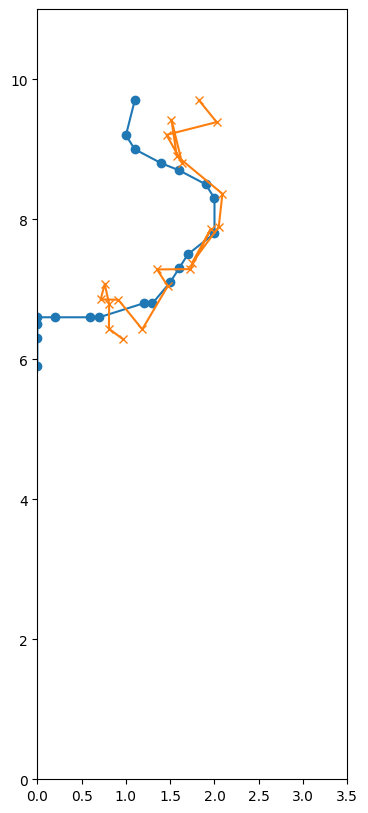

tensor([[0.0000, 0.0000, 0.0000,  ..., 1.8000, 2.6000, 1.6000],
        [0.0000, 0.0000, 0.0000,  ..., 7.1000, 0.0000, 7.4000],
        [0.0000, 0.0000, 0.0000,  ..., 6.6000, 0.0000, 6.5000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.9000, 1.4000],
        [0.0000, 0.0000, 0.0000,  ..., 3.3000, 0.0000, 3.2000],
        [0.0000, 0.0000, 0.0000,  ..., 1.6000, 2.5000, 1.6000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.3000, 0.9000, 0.7000, 1.0000, 0.8000,
         1.0000, 1.0000, 1.1000, 1.1000, 1.4000, 1.2000, 1.6000, 1.2000, 2.1000,
         1.3000, 2.3000, 1.5000, 2.4000, 1.8000, 2.4000, 2.1000, 2.4000, 2.3000,
         2.4000, 2.6000, 2.6000, 2.9000, 2.7000, 2.9000, 3.1000, 2.7000, 3.3000,
         2.5000, 3.6000, 2.5000, 3.7000]], device='cuda:0')
3
3 5.293870449066162


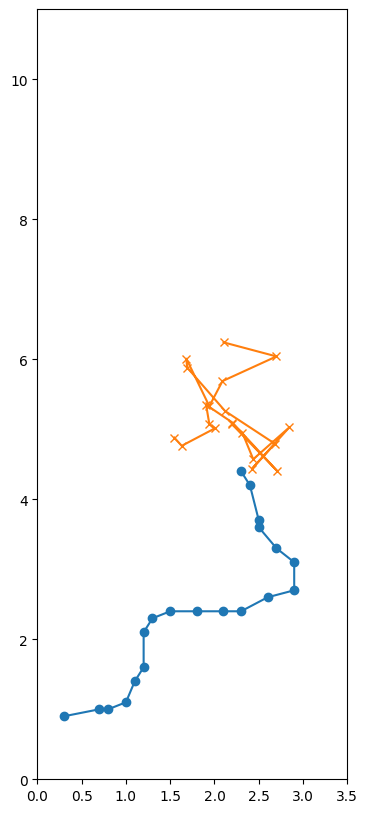

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 8.6000, 0.7000, 8.2000],
        [0.0000, 0.0000, 0.0000,  ..., 9.7000, 2.3000, 9.8000],
        [0.0000, 0.0000, 0.0000,  ..., 9.6000, 0.0000, 9.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 6.4000, 2.6000, 6.2000],
        [0.0000, 0.0000, 0.0000,  ..., 5.2000, 1.6000, 5.4000],
        [0.0000, 0.0000, 0.0000,  ..., 1.5000, 1.3000, 1.2000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.7000, 8.0000, 0.5000, 7.9000, 0.1000,
         8.0000, 0.0000, 8.3000, 0.0000, 8.5000, 0.0000, 8.7000, 0.0000, 9.2000,
         0.1000, 9.4000, 0.0000, 9.9000, 0.2000, 9.9000, 0.4000, 9.8000, 0.6000,
         9.7000, 0.7000, 9.6000, 0.8000, 9.3000, 1.0000, 8.8000, 1.0000, 8.7000,
         1.0000, 8.6000, 0.7000, 8.2000]], device='cuda:0')
0
0 0.01755235344171524


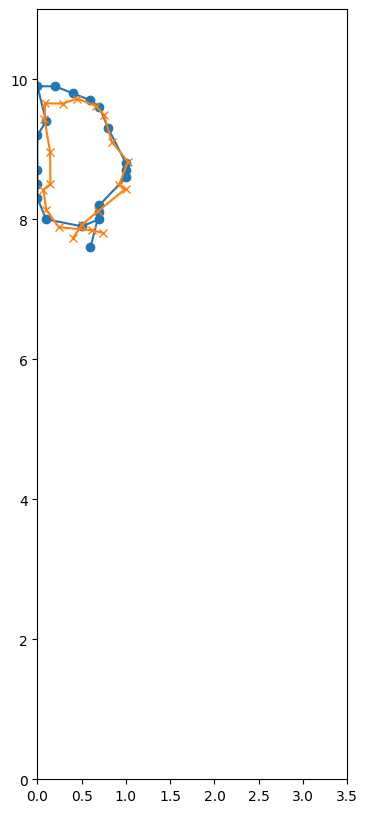

tensor([[0.0000, 0.0000, 0.0000,  ..., 8.6000, 0.7000, 8.2000],
        [0.0000, 0.0000, 0.0000,  ..., 9.7000, 2.3000, 9.8000],
        [0.0000, 0.0000, 0.0000,  ..., 9.6000, 0.0000, 9.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 6.4000, 2.6000, 6.2000],
        [0.0000, 0.0000, 0.0000,  ..., 5.2000, 1.6000, 5.4000],
        [0.0000, 0.0000, 0.0000,  ..., 1.5000, 1.3000, 1.2000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.2000, 7.9000, 1.0000, 7.8000, 0.8000,
         7.8000, 0.5000, 8.0000, 0.3000, 8.3000, 0.3000, 8.5000, 0.2000, 8.7000,
         0.0000, 9.1000, 0.0000, 9.3000, 0.0000, 9.5000, 0.0000, 9.8000, 0.2000,
         9.9000, 0.6000, 9.9000, 0.8000, 9.9000, 1.0000, 9.9000, 1.5000, 9.9000,
         2.0000, 9.7000, 2.3000, 9.8000]], device='cuda:0')
1
1 0.0036210266407579184


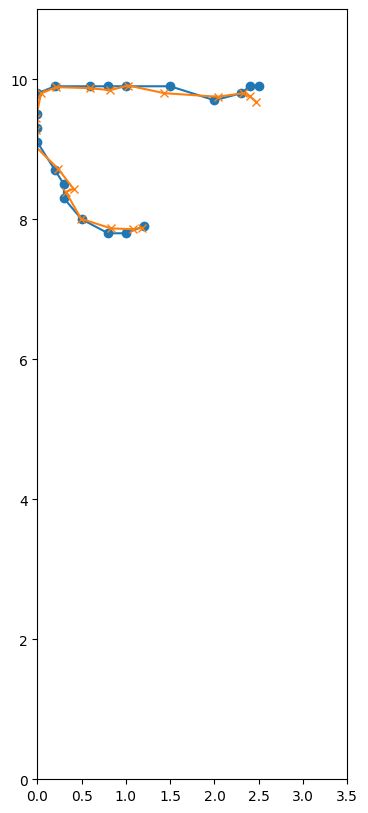

tensor([[0.0000, 0.0000, 0.0000,  ..., 8.6000, 0.7000, 8.2000],
        [0.0000, 0.0000, 0.0000,  ..., 9.7000, 2.3000, 9.8000],
        [0.0000, 0.0000, 0.0000,  ..., 9.6000, 0.0000, 9.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 6.4000, 2.6000, 6.2000],
        [0.0000, 0.0000, 0.0000,  ..., 5.2000, 1.6000, 5.4000],
        [0.0000, 0.0000, 0.0000,  ..., 1.5000, 1.3000, 1.2000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 2.0000, 7.3000, 2.2000, 7.8000, 2.2000,
         8.0000, 2.3000, 8.1000, 2.7000, 8.4000, 2.9000, 8.5000, 2.9000, 8.6000,
         2.7000, 8.9000, 2.2000, 9.0000, 2.1000, 9.0000, 1.6000, 9.2000, 1.4000,
         9.3000, 1.2000, 9.4000, 0.9000, 9.7000, 0.5000, 9.7000, 0.2000, 9.7000,
         0.0000, 9.6000, 0.0000, 9.3000]], device='cuda:0')
2
2 0.02220943011343479


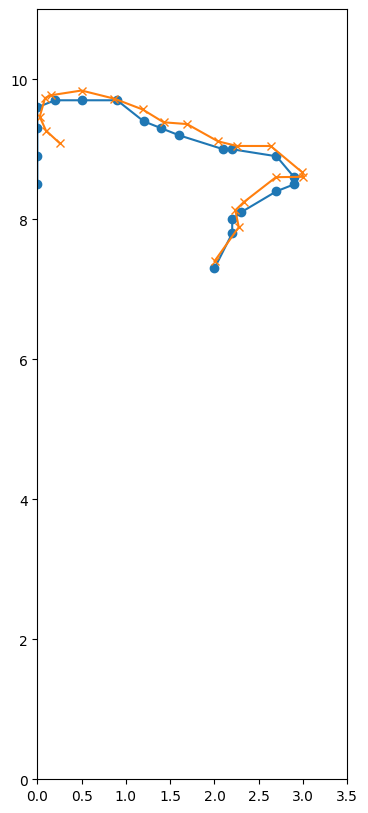

tensor([[0.0000, 0.0000, 0.0000,  ..., 8.6000, 0.7000, 8.2000],
        [0.0000, 0.0000, 0.0000,  ..., 9.7000, 2.3000, 9.8000],
        [0.0000, 0.0000, 0.0000,  ..., 9.6000, 0.0000, 9.3000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 6.4000, 2.6000, 6.2000],
        [0.0000, 0.0000, 0.0000,  ..., 5.2000, 1.6000, 5.4000],
        [0.0000, 0.0000, 0.0000,  ..., 1.5000, 1.3000, 1.2000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.1000, 1.8000, 1.1000, 2.2000, 0.8000,
         2.5000, 0.5000, 2.6000, 0.2000, 2.7000, 0.0000, 2.9000, 0.0000, 3.0000,
         0.1000, 3.2000, 0.4000, 3.6000, 0.7000, 3.8000, 0.8000, 4.0000, 1.0000,
         4.2000, 1.2000, 4.2000, 1.4000, 4.0000, 1.4000, 3.7000, 1.7000, 3.4000,
         1.8000, 3.2000, 1.9000, 3.0000]], device='cuda:0')
3
3 3.0265913009643555


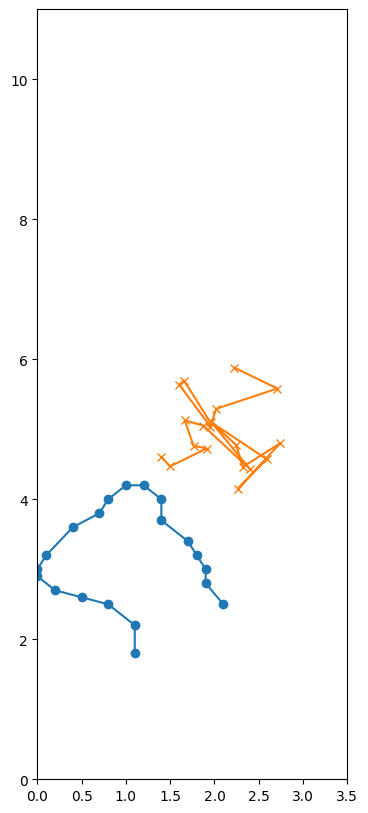

torch.Size([64, 20, 4]) torch.Size([64, 20, 2])
tensor([[0.0000, 0.0000, 0.0000,  ..., 9.3000, 2.3000, 9.0000],
        [0.0000, 0.0000, 0.0000,  ..., 5.9000, 1.9000, 5.8000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.2000, 0.1000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.5000, 2.8000, 0.3000],
        [0.0000, 0.0000, 0.0000,  ..., 5.2000, 2.5000, 5.3000],
        [0.0000, 0.0000, 0.0000,  ..., 1.3000, 2.9000, 0.9000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.5000, 7.8000, 1.5000, 8.1000, 1.4000,
         8.5000, 1.4000, 8.8000, 1.5000, 9.2000, 1.5000, 9.4000, 1.6000, 9.9000,
         1.8000, 9.9000, 2.0000, 9.9000, 2.1000, 9.9000, 2.3000, 9.9000, 2.6000,
         9.9000, 2.8000, 9.9000, 2.9000, 9.9000, 2.9000, 9.8000, 2.9000, 9.5000,
         2.7000, 9.3000, 2.3000, 9.0000]], device='cuda:0')
0
0 0.015545888803899288


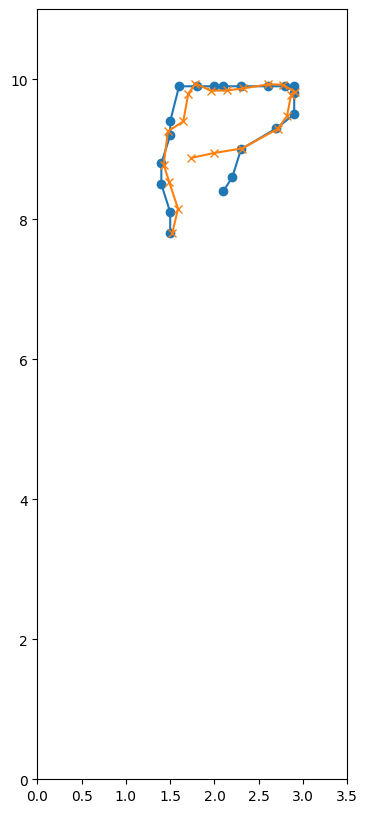

tensor([[0.0000, 0.0000, 0.0000,  ..., 9.3000, 2.3000, 9.0000],
        [0.0000, 0.0000, 0.0000,  ..., 5.9000, 1.9000, 5.8000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.2000, 0.1000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.5000, 2.8000, 0.3000],
        [0.0000, 0.0000, 0.0000,  ..., 5.2000, 2.5000, 5.3000],
        [0.0000, 0.0000, 0.0000,  ..., 1.3000, 2.9000, 0.9000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.6000, 4.9000, 0.6000, 5.0000, 0.7000,
         5.2000, 0.9000, 5.3000, 1.1000, 5.3000, 1.4000, 5.4000, 1.9000, 5.2000,
         2.1000, 4.9000, 2.3000, 4.8000, 2.7000, 4.8000, 2.9000, 4.9000, 2.9000,
         5.2000, 2.9000, 5.5000, 2.8000, 5.6000, 2.5000, 5.9000, 2.2000, 5.9000,
         2.1000, 5.9000, 1.9000, 5.8000]], device='cuda:0')
1
1 0.5342320799827576


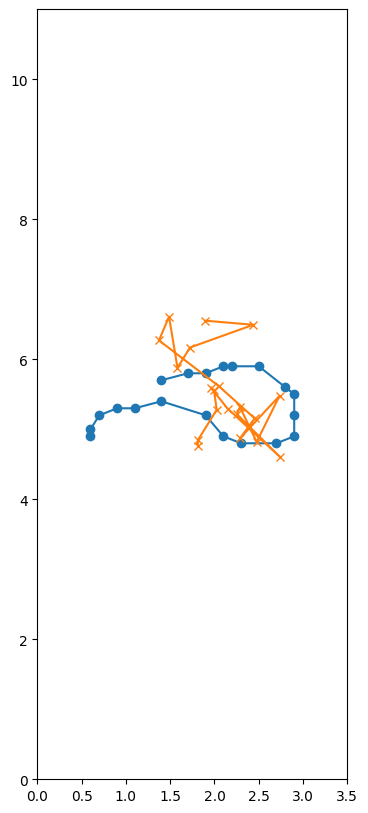

tensor([[0.0000, 0.0000, 0.0000,  ..., 9.3000, 2.3000, 9.0000],
        [0.0000, 0.0000, 0.0000,  ..., 5.9000, 1.9000, 5.8000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.2000, 0.1000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.5000, 2.8000, 0.3000],
        [0.0000, 0.0000, 0.0000,  ..., 5.2000, 2.5000, 5.3000],
        [0.0000, 0.0000, 0.0000,  ..., 1.3000, 2.9000, 0.9000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.9000, 4.1000, 1.0000, 3.8000, 0.9000,
         3.4000, 0.8000, 2.9000, 1.0000, 2.4000, 0.9000, 2.1000, 0.9000, 2.0000,
         0.8000, 1.5000, 0.8000, 1.1000, 0.8000, 0.8000, 0.9000, 0.6000, 1.2000,
         0.3000, 1.4000, 0.0000, 1.3000, 0.0000, 0.9000, 0.0000, 0.7000, 0.0000,
         0.5000, 0.0000, 0.2000, 0.1000]], device='cuda:0')
2
2 8.645730018615723


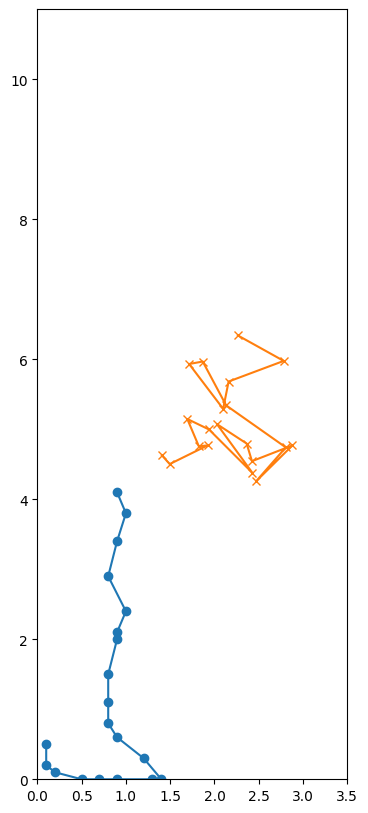

tensor([[0.0000, 0.0000, 0.0000,  ..., 9.3000, 2.3000, 9.0000],
        [0.0000, 0.0000, 0.0000,  ..., 5.9000, 1.9000, 5.8000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.2000, 0.1000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.5000, 2.8000, 0.3000],
        [0.0000, 0.0000, 0.0000,  ..., 5.2000, 2.5000, 5.3000],
        [0.0000, 0.0000, 0.0000,  ..., 1.3000, 2.9000, 0.9000]],
       device='cuda:0')
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.1000, 5.3000, 1.3000, 5.2000, 1.8000,
         5.2000, 2.1000, 5.0000, 2.2000, 4.9000, 2.3000, 4.7000, 2.7000, 4.4000,
         2.9000, 3.9000, 2.9000, 3.6000, 2.9000, 3.4000, 2.8000, 3.3000, 2.7000,
         3.0000, 2.7000, 2.8000, 2.4000, 2.5000, 2.3000, 2.0000, 2.4000, 1.9000,
         2.5000, 1.8000, 2.6000, 1.6000]], device='cuda:0')
3
3 2.3347244262695312


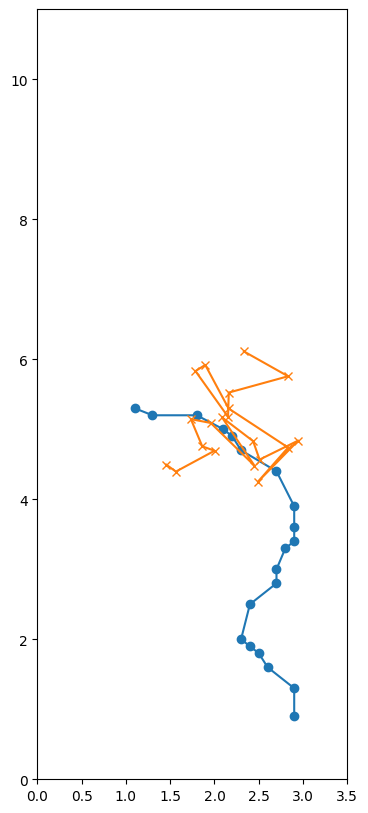

torch.Size([16, 20, 4]) torch.Size([16, 20, 2])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.6000, 9.9000, 0.7000, 9.9000, 0.8000,
         9.8000, 1.1000, 9.5000, 1.2000, 9.4000, 1.2000, 9.3000, 1.4000, 9.0000,
         1.5000, 8.9000, 1.9000, 8.6000, 2.3000, 8.3000, 2.7000, 8.1000, 2.9000,
         8.1000, 2.9000, 8.0000, 2.9000, 7.5000, 2.9000, 7.2000, 2.8000, 7.1000,
         2.6000, 6.6000, 2.5000, 6.3000],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.9000, 8.2000, 1.8000, 8.5000, 1.7000,
         8.6000, 1.6000, 8.7000, 1.6000, 9.1000, 1.6000, 9.2000, 1.6000, 9.6000,
         1.8000, 9.9000, 2.0000, 9.9000, 2.2000, 9.8000, 2.3000, 9.7000, 2.4000,
         9.5000, 2.7000, 9.3000, 2.8000, 9.0000, 2.7000, 8.6000, 2.7000, 8.2000,
         2.9000, 7.9000, 2.9000, 7.8000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.6000, 4.8000, 0.3000, 4.4000, 0.1000,
         4.2000, 0.0000, 4.0000, 0.0000, 3.7000, 0.1000, 3.4000, 0.2000, 3.1000,
         0.2000, 3.0000, 0.3000, 2.7000, 0.7000, 2.4000, 0

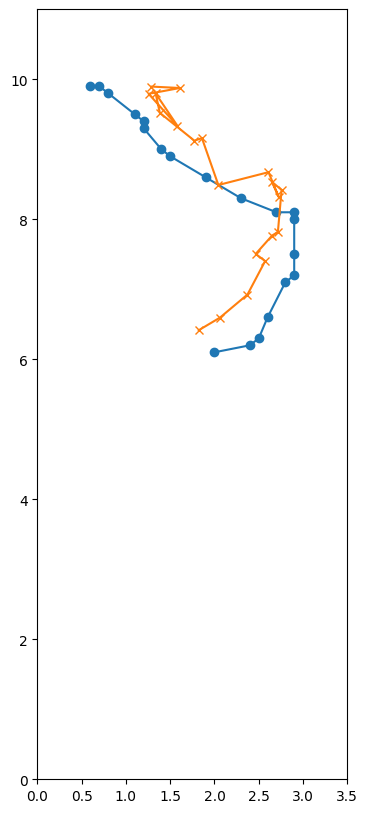

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.6000, 9.9000, 0.7000, 9.9000, 0.8000,
         9.8000, 1.1000, 9.5000, 1.2000, 9.4000, 1.2000, 9.3000, 1.4000, 9.0000,
         1.5000, 8.9000, 1.9000, 8.6000, 2.3000, 8.3000, 2.7000, 8.1000, 2.9000,
         8.1000, 2.9000, 8.0000, 2.9000, 7.5000, 2.9000, 7.2000, 2.8000, 7.1000,
         2.6000, 6.6000, 2.5000, 6.3000],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.9000, 8.2000, 1.8000, 8.5000, 1.7000,
         8.6000, 1.6000, 8.7000, 1.6000, 9.1000, 1.6000, 9.2000, 1.6000, 9.6000,
         1.8000, 9.9000, 2.0000, 9.9000, 2.2000, 9.8000, 2.3000, 9.7000, 2.4000,
         9.5000, 2.7000, 9.3000, 2.8000, 9.0000, 2.7000, 8.6000, 2.7000, 8.2000,
         2.9000, 7.9000, 2.9000, 7.8000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.6000, 4.8000, 0.3000, 4.4000, 0.1000,
         4.2000, 0.0000, 4.0000, 0.0000, 3.7000, 0.1000, 3.4000, 0.2000, 3.1000,
         0.2000, 3.0000, 0.3000, 2.7000, 0.7000, 2.4000, 0.8000, 2.3000, 0.8000,
         2.2000, 0.8000, 

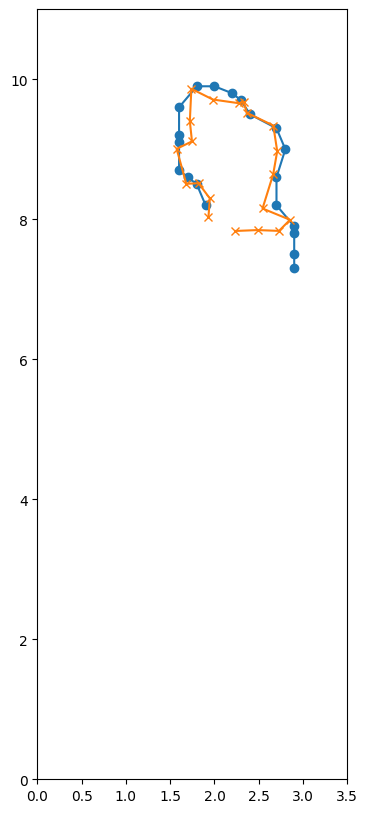

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.6000, 9.9000, 0.7000, 9.9000, 0.8000,
         9.8000, 1.1000, 9.5000, 1.2000, 9.4000, 1.2000, 9.3000, 1.4000, 9.0000,
         1.5000, 8.9000, 1.9000, 8.6000, 2.3000, 8.3000, 2.7000, 8.1000, 2.9000,
         8.1000, 2.9000, 8.0000, 2.9000, 7.5000, 2.9000, 7.2000, 2.8000, 7.1000,
         2.6000, 6.6000, 2.5000, 6.3000],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.9000, 8.2000, 1.8000, 8.5000, 1.7000,
         8.6000, 1.6000, 8.7000, 1.6000, 9.1000, 1.6000, 9.2000, 1.6000, 9.6000,
         1.8000, 9.9000, 2.0000, 9.9000, 2.2000, 9.8000, 2.3000, 9.7000, 2.4000,
         9.5000, 2.7000, 9.3000, 2.8000, 9.0000, 2.7000, 8.6000, 2.7000, 8.2000,
         2.9000, 7.9000, 2.9000, 7.8000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.6000, 4.8000, 0.3000, 4.4000, 0.1000,
         4.2000, 0.0000, 4.0000, 0.0000, 3.7000, 0.1000, 3.4000, 0.2000, 3.1000,
         0.2000, 3.0000, 0.3000, 2.7000, 0.7000, 2.4000, 0.8000, 2.3000, 0.8000,
         2.2000, 0.8000, 

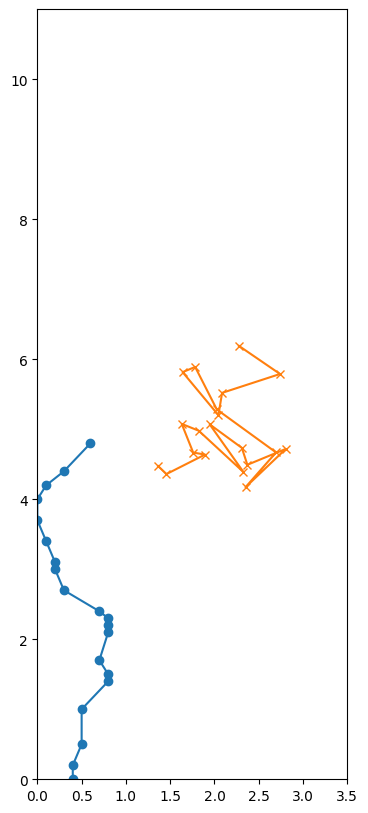

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.6000, 9.9000, 0.7000, 9.9000, 0.8000,
         9.8000, 1.1000, 9.5000, 1.2000, 9.4000, 1.2000, 9.3000, 1.4000, 9.0000,
         1.5000, 8.9000, 1.9000, 8.6000, 2.3000, 8.3000, 2.7000, 8.1000, 2.9000,
         8.1000, 2.9000, 8.0000, 2.9000, 7.5000, 2.9000, 7.2000, 2.8000, 7.1000,
         2.6000, 6.6000, 2.5000, 6.3000],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.9000, 8.2000, 1.8000, 8.5000, 1.7000,
         8.6000, 1.6000, 8.7000, 1.6000, 9.1000, 1.6000, 9.2000, 1.6000, 9.6000,
         1.8000, 9.9000, 2.0000, 9.9000, 2.2000, 9.8000, 2.3000, 9.7000, 2.4000,
         9.5000, 2.7000, 9.3000, 2.8000, 9.0000, 2.7000, 8.6000, 2.7000, 8.2000,
         2.9000, 7.9000, 2.9000, 7.8000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.6000, 4.8000, 0.3000, 4.4000, 0.1000,
         4.2000, 0.0000, 4.0000, 0.0000, 3.7000, 0.1000, 3.4000, 0.2000, 3.1000,
         0.2000, 3.0000, 0.3000, 2.7000, 0.7000, 2.4000, 0.8000, 2.3000, 0.8000,
         2.2000, 0.8000, 

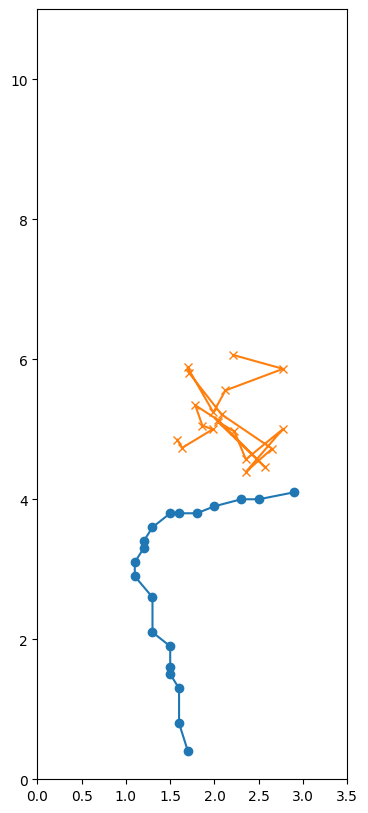

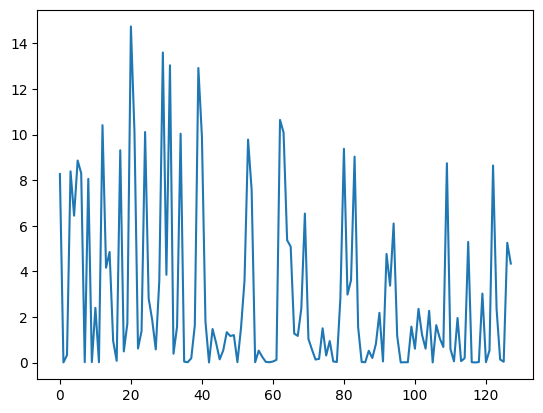

2.948592371207269


In [24]:


model.eval()


loss_list = []
# dist_list = []
print(len(dm.test_dataloader()))
for i, batch in enumerate(dm.test_dataloader()):
    x, y = batch
    x, y = x.cuda(), y.cuda()
    print(x.shape, y.shape)
    
    mean = 0.0  # 平均
    std = 0.381  # 標準偏差
    # print(x)
    # x[:, :, 0] += get_random_noise(mean, std, (x.shape[0], x.shape[1])).cuda()
    # x[:, :, 1] += get_random_noise(mean, std, (x.shape[0], x.shape[1])).cuda()
    # print(x)
   
    x, y = x.view(-1, 80), y.view(-1, 40)
    shifted_y = torch.zeros_like(y)
    shifted_y[:, 4:] = y[:, :-4]

    # mean = 0.0  # 平均
    # std = 0.381  # 標準偏差
    # x[:, :, 0] += get_random_noise(mean, std, (x.shape[0], x.shape[1])).cuda()
    # x[:, :, 1] += get_random_noise(mean, std, (x.shape[0], x.shape[1])).cuda()
    # x[:, :, 2] += get_random_noise(mean, std, (x.shape[0], x.shape[1])).cuda()

    for j in range(4):
        # print(x)
        # print(x[j])
        print(shifted_y)
        print(shifted_y[j].unsqueeze(0))
        print(j)
        y_hat = model(x[j].unsqueeze(0), shifted_y[j].unsqueeze(0))
        loss = nn.functional.mse_loss(y_hat, y[j])
        print(j, loss.item())
        loss_list.append(loss.item())

        y_j = y[j].view(20, 2)
        y_hat = y_hat.view(20, 2)

        y_j = y_j.cpu().detach().numpy()
        y_hat = y_hat.cpu().detach().numpy()

        plot_route(y_j, y_hat)


    

plt.plot(loss_list)
plt.show()

# plt.plot(dist_list)
# plt.show()

avg = sum(loss_list) / len(loss_list)
print(avg)
